In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.multiclass import OutputCodeClassifier,OneVsRestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import plot_tree
from sklearn.datasets import make_classification

In [2]:
dataset,meta = arff.loadarff('PhishingData.arff')
meta

Dataset: 'Phishing-weka.filters.supervised.attribute.AttributeSelection-Eweka.attributeSelection.InfoGainAttributeEval-Sweka.attributeSelection.Ranker
	SFH's type is nominal, range is ('1', '-1', '0')
	popUpWidnow's type is nominal, range is ('-1', '0', '1')
	SSLfinal_State's type is nominal, range is ('1', '-1', '0')
	Request_URL's type is nominal, range is ('-1', '0', '1')
	URL_of_Anchor's type is nominal, range is ('-1', '0', '1')
	web_traffic's type is nominal, range is ('1', '0', '-1')
	URL_Length's type is nominal, range is ('1', '-1', '0')
	age_of_domain's type is nominal, range is ('1', '-1')
	having_IP_Address's type is nominal, range is ('0', '1')
	Result's type is nominal, range is ('0', '1', '-1')

The data set collects information about websites.




SFH
SFHs that contain an empty string or “about:blank” are considered doubtful because an action should be taken upon the submitted information. In addition, if the domain name in SFHs is different from the domain name of the webpage, this reveals that the webpage is suspicious because the submitted information is rarely handled by external domains.
            Rule: IF
            {SFH is ""about: blank\"" Or Is Empty → Phishing(-1)}
            {SFH "Refers To " A Different Domain→ Suspicious(0)}
            {Otherwise → Legitimate(1)}
            
            
popUpWidnow 
It is unusual to find a legitimate website asking users to submit their personal information through a pop-up window. On the other hand, this feature has been used in some legitimate websites and its main goal is to warn users about fraudulent activities or broadcast a welcome announcement, though no personal information was asked to be filled in through these pop-up windows.
                        
SSLfinal_State
Hyper Text Transfer Protocol with Secure Sockets Layer.


Request_URL
Request URL examines whether the external objects contained within a webpage such as images, videos and sounds are loaded from another domain. In legitimate webpages, the webpage address and most of objects embedded within the webpage are sharing the same domain.
             Rule: IF
             {% of Request URL <22% → Legitimate(1)
             {%of Request URL≥22% and 61%→ Suspicious(0)
             {Otherwise→ feature=Phishing(-1)
             
             
URL_of_Anchor
An anchor is an element defined by the <a> tag. This feature is treated exactly as “Request URL”. However, for this feature we examine: If the <a> tags and the website have different domain names. This is similar to request URL feature. If the anchor does not link to any webpage, e.g.: <a href=“#”>,<a href=“#content”>, <a href=“#skip”>,<a href=“JavaScript ::void(0)”>.
         Rule: IF
            {% of URL Of Anchor <31% → Legitimate(1)
            {% of URL Of Anchor ≥31% and ≤67% → Suspicious(0)
            {Otherwise→ Phishing(-1)
                                     
age_of_domain
This feature can be extracted from WHOIS database (Whois 2005). Most phishing websites live for a short period of time. By reviewing our dataset, we find that the minimum age of the legitimate domain is 6 months.
         Rule: IF
              {Age Of Domain≥6 months → Legitimate(1)
              {Otherwise → Phishing(-1)
                                     
                                     
having_IP_Address
If an IP address is used as an alternative of the domain name in the URL, i.e “http://125.98.3.123/fake.html”-someone is trying to steal their personal information or “http://127.0.0.1/fake.html”- user open html in local host. 
            RULE: IF 
                {If The Domain Part has an IP Address → Suspicious(0)
                {Otherwise→ Legitimate(1)
                                     
Result
      RULE: IF 
          {If 0 → Suspicious website
          {If 1→ Legitimate website
          {If -1→ Phishing website
          

In [3]:
df = pd.DataFrame(dataset)
df

SFH popUpWidnow SSLfinal_State Request_URL URL_of_Anchor web_traffic  \
0      b'1'       b'-1'           b'1'       b'-1'         b'-1'        b'1'   
1     b'-1'       b'-1'          b'-1'       b'-1'         b'-1'        b'0'   
2      b'1'       b'-1'           b'0'        b'0'         b'-1'        b'0'   
3      b'1'        b'0'           b'1'       b'-1'         b'-1'        b'0'   
4     b'-1'       b'-1'           b'1'       b'-1'          b'0'        b'0'   
...     ...         ...            ...         ...           ...         ...   
1348  b'-1'       b'-1'          b'-1'       b'-1'         b'-1'       b'-1'   
1349  b'-1'        b'0'           b'1'        b'0'         b'-1'        b'0'   
1350  b'-1'        b'0'          b'-1'       b'-1'         b'-1'        b'0'   
1351   b'0'        b'0'           b'1'        b'0'          b'0'        b'0'   
1352   b'1'        b'0'           b'1'        b'1'          b'1'        b'0'   

     URL_Length age_of_domain having_IP_Address Result  
0          b'1'          b'1'              b'0'   b'0'  
1          b'1'          b'1'              b'1'   b'1'  
2         b'-1'          b'1'              b'0'   b'1'  
3          b'1'          b'1'              b'0'   b'0'  
4         b'-1'          b'1'              b'0'   b'1'  
...         ...           ...               ...    ...  
1348       b'0'          b'1'              b'0'   b'1'  
1349       b'0'          b'1'              b'0'  b'-1'  
1350      b'-1'         b'-1'              b'0'   b'1'  
1351      b'-1'          b'1'              b'0'   b'1'  
1352      b'-1'         b'-1'              b'0'  b'-1'  

[1353 rows x 10 columns]

In [4]:
df = df.astype(int)
df

SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  \
0       1           -1               1           -1             -1   
1      -1           -1              -1           -1             -1   
2       1           -1               0            0             -1   
3       1            0               1           -1             -1   
4      -1           -1               1           -1              0   
...   ...          ...             ...          ...            ...   
1348   -1           -1              -1           -1             -1   
1349   -1            0               1            0             -1   
1350   -1            0              -1           -1             -1   
1351    0            0               1            0              0   
1352    1            0               1            1              1   

      web_traffic  URL_Length  age_of_domain  having_IP_Address  Result  
0               1           1              1                  0       0  
1               0           1              1                  1       1  
2               0          -1              1                  0       1  
3               0           1              1                  0       0  
4               0          -1              1                  0       1  
...           ...         ...            ...                ...     ...  
1348           -1           0              1                  0       1  
1349            0           0              1                  0      -1  
1350            0          -1             -1                  0       1  
1351            0          -1              1                  0       1  
1352            0          -1             -1                  0      -1  

[1353 rows x 10 columns]

In [5]:
df.isnull().any()

SFH                  False
popUpWidnow          False
SSLfinal_State       False
Request_URL          False
URL_of_Anchor        False
web_traffic          False
URL_Length           False
age_of_domain        False
having_IP_Address    False
Result               False
dtype: bool

The dataset does not have missing values 

SFH
count    1353.000000
mean        0.237990
std         0.916389
min        -1.000000
25%        -1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: SFH, dtype: float64


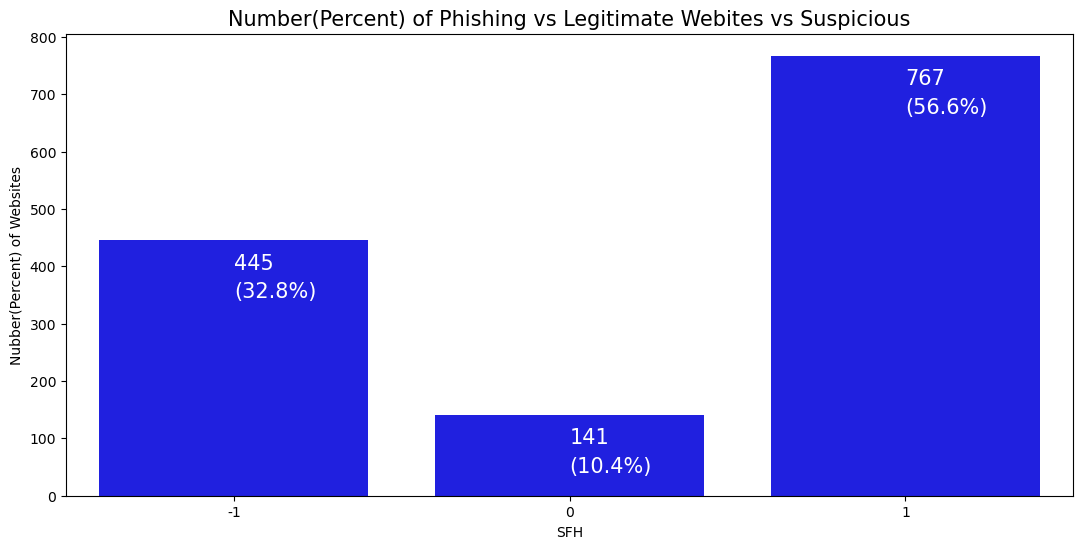

popUpWidnow
count    1353.000000
mean       -0.258684
std         0.679072
min        -1.000000
25%        -1.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: popUpWidnow, dtype: float64


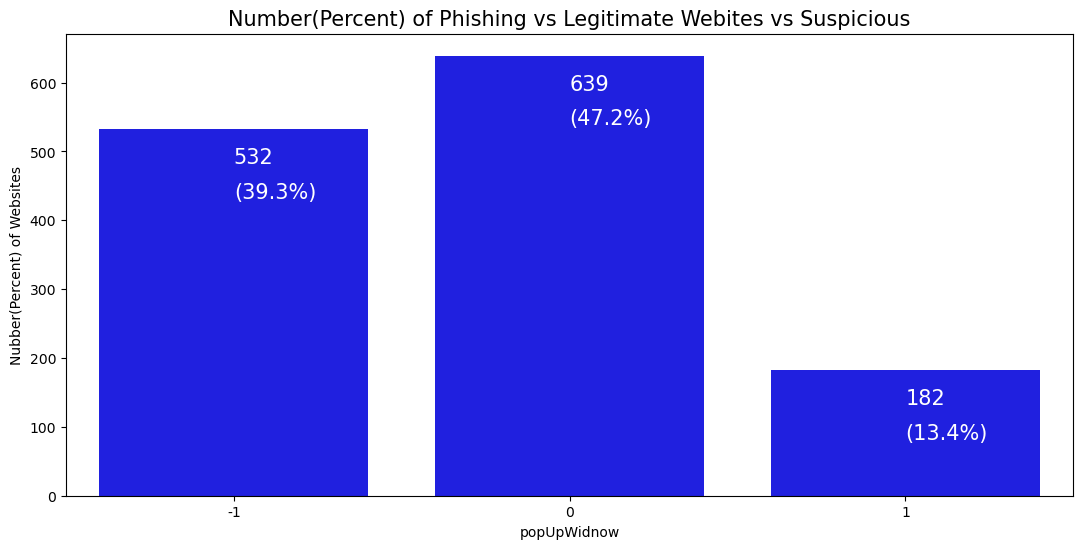

SSLfinal_State
count    1353.000000
mean        0.327421
std         0.822193
min        -1.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: SSLfinal_State, dtype: float64


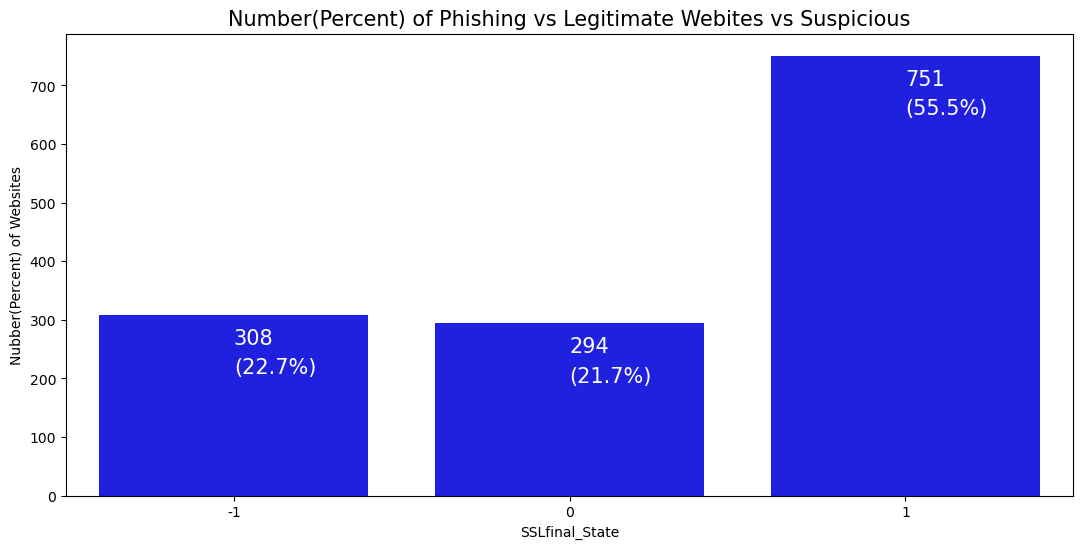

Request_URL
count    1353.000000
mean       -0.223208
std         0.799682
min        -1.000000
25%        -1.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Request_URL, dtype: float64


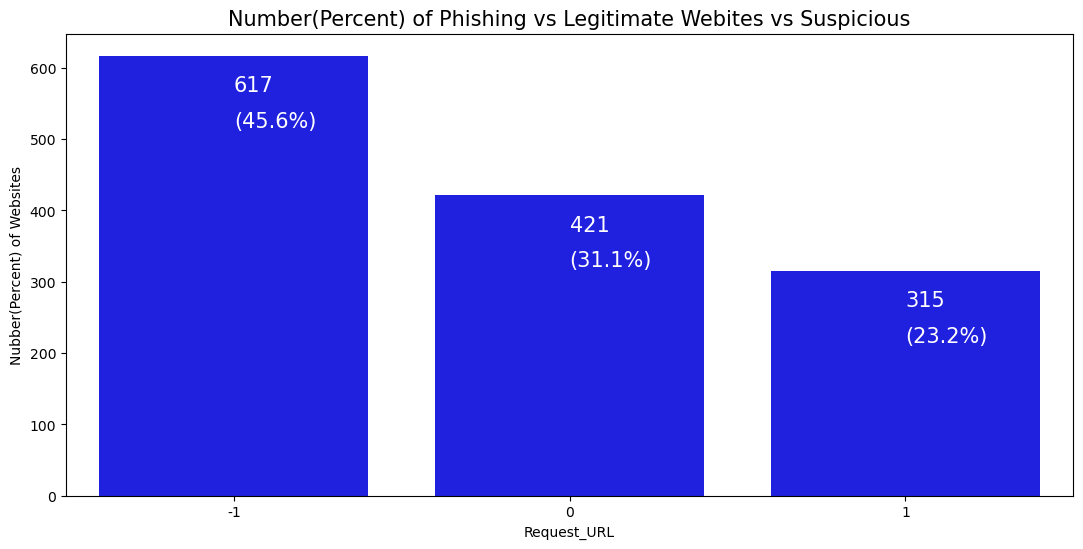

URL_of_Anchor
count    1353.000000
mean       -0.025129
std         0.936262
min        -1.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: URL_of_Anchor, dtype: float64


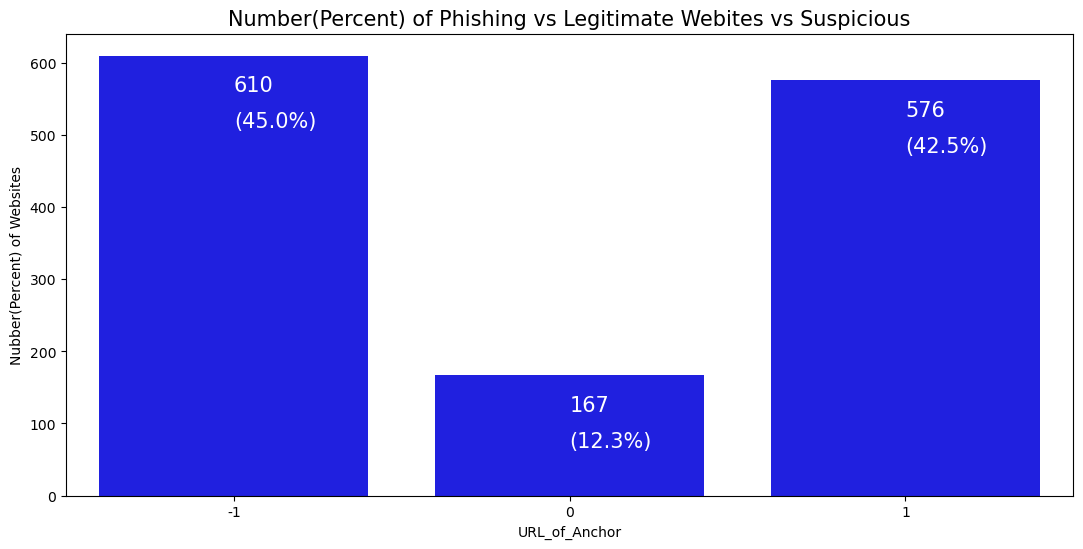

web_traffic
count    1353.000000
mean        0.000000
std         0.806776
min        -1.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: web_traffic, dtype: float64


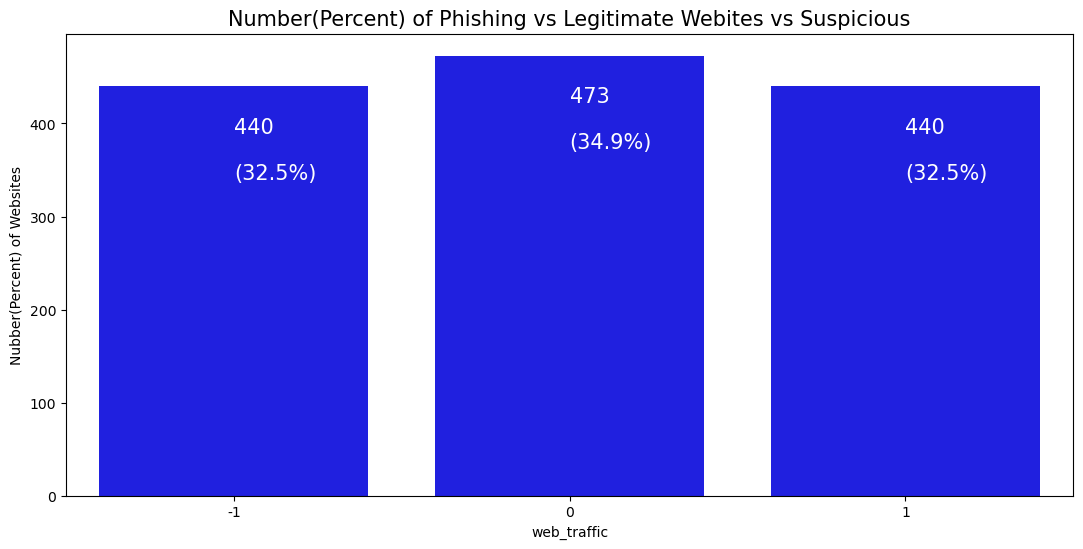

URL_Length
count    1353.000000
mean       -0.053215
std         0.762552
min        -1.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: URL_Length, dtype: float64


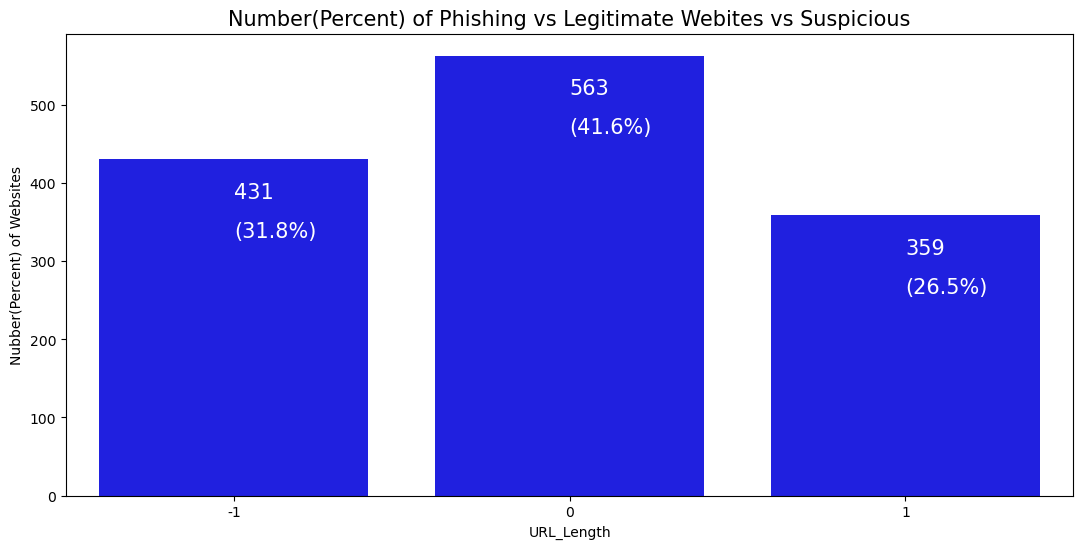

age_of_domain
count    1353.000000
mean        0.219512
std         0.975970
min        -1.000000
25%        -1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: age_of_domain, dtype: float64


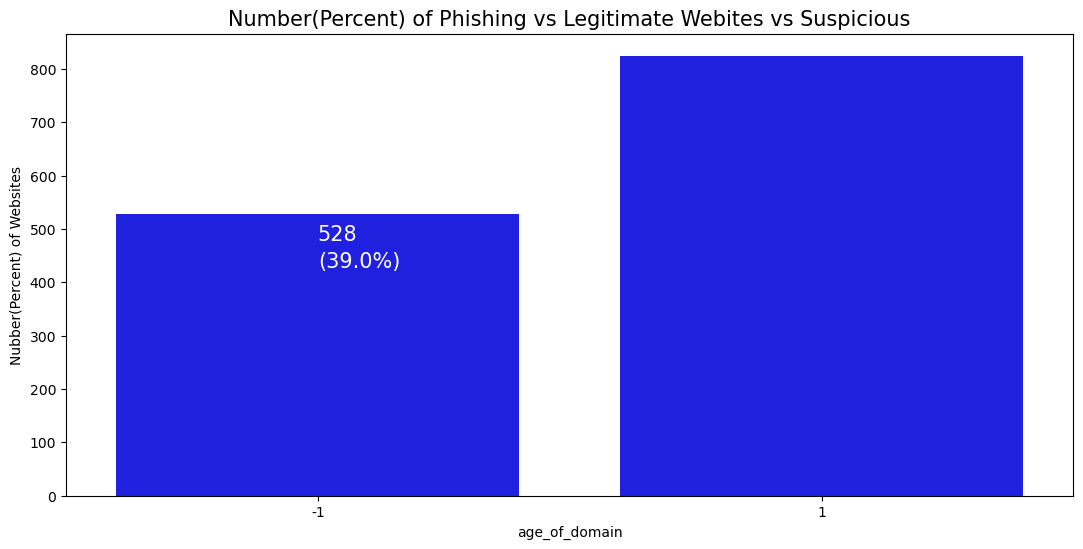

having_IP_Address
count    1353.000000
mean        0.114560
std         0.318608
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: having_IP_Address, dtype: float64


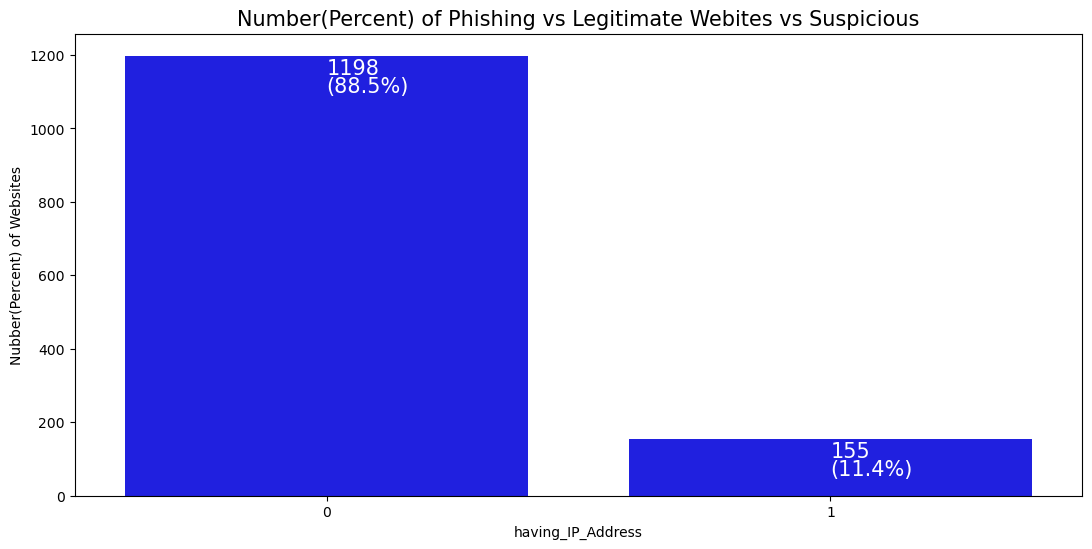

Result
count    1353.000000
mean       -0.113821
std         0.954773
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         1.000000
max         1.000000
Name: Result, dtype: float64


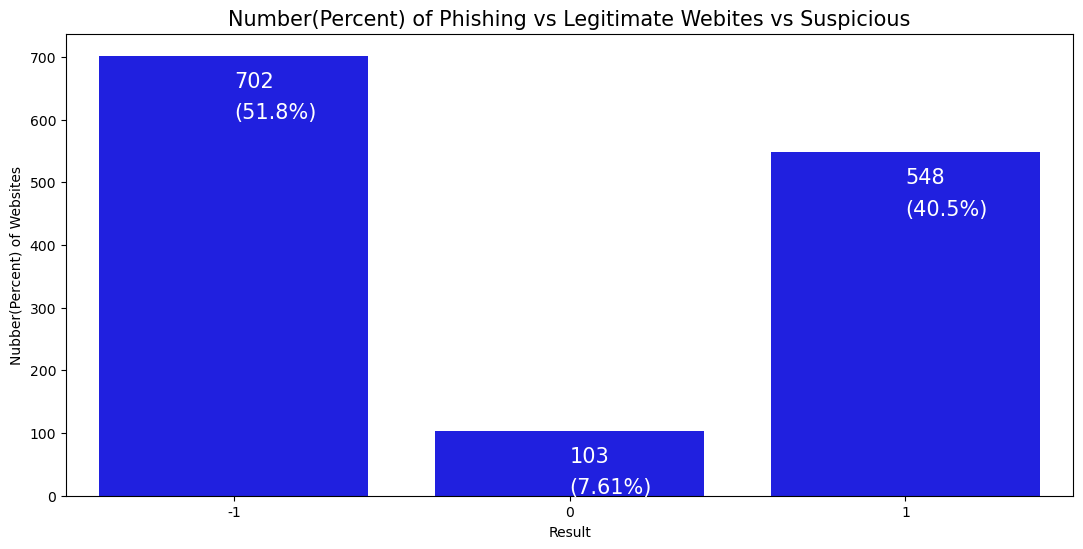

In [6]:

for column in df.columns:
    print(column)
    Result = df[column].value_counts().index
    Count = df[column].value_counts().values
    Count_p = Count / len(df) * 100
    print(df[column].describe())
    plt.figure(figsize=(13, 6))
    ax = sns.barplot(x=column, y=column, estimator=lambda x: len(x), data=df, color = 'Blue')
    ax.set(ylabel="Nubber(Percent) of Websites");
    ax.set_title('Number(Percent) of Phishing vs Legitimate Webites vs Suspicious', size = 15);
    for i in range(len(Result)): 
        plt.annotate(Count[i], xy=(Result[i]-min(Result), Count[i]-50), color='white', size=15)
        plt.annotate('('+str(Count_p[i])[0:4]+'%)', xy=(Result[i]-min(Result), Count[i]-100), color='white', size=15)
        
    
    plt.show()

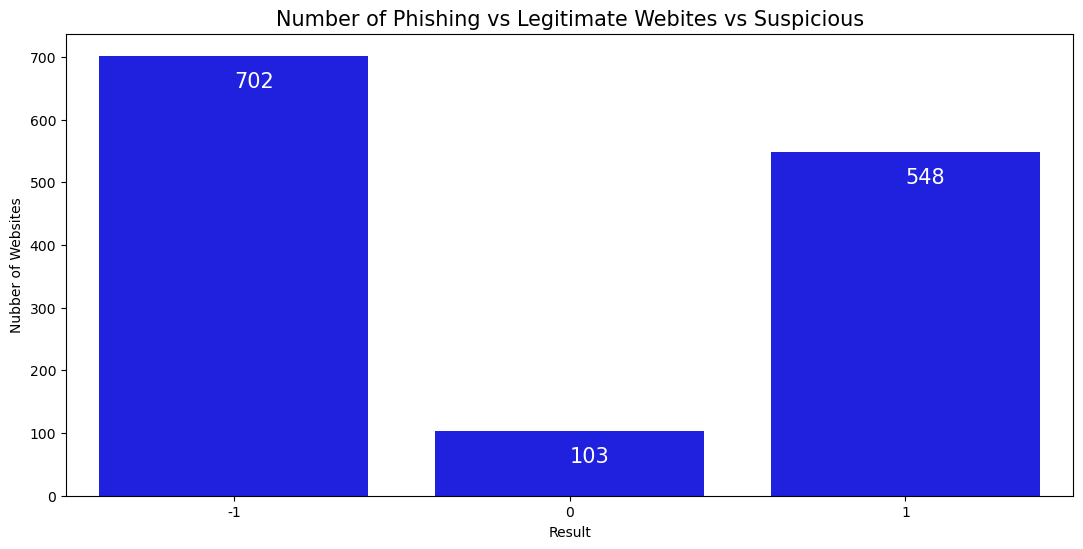

In [7]:
Result = df['Result'].value_counts().index
Count = df['Result'].value_counts().values
plt.figure(figsize=(13, 6))
ax = sns.barplot(x="Result", y="Result", estimator=lambda x: len(x), data=df, color = 'Blue')
ax.set(ylabel="Nubber of Websites");
ax.set_title('Number of Phishing vs Legitimate Webites vs Suspicious', size = 15);
for i in range(3): 
    plt.annotate(Count[i], xy=(Result[i]+1, Count[i]-50), color='white', size=15)
plt.show()

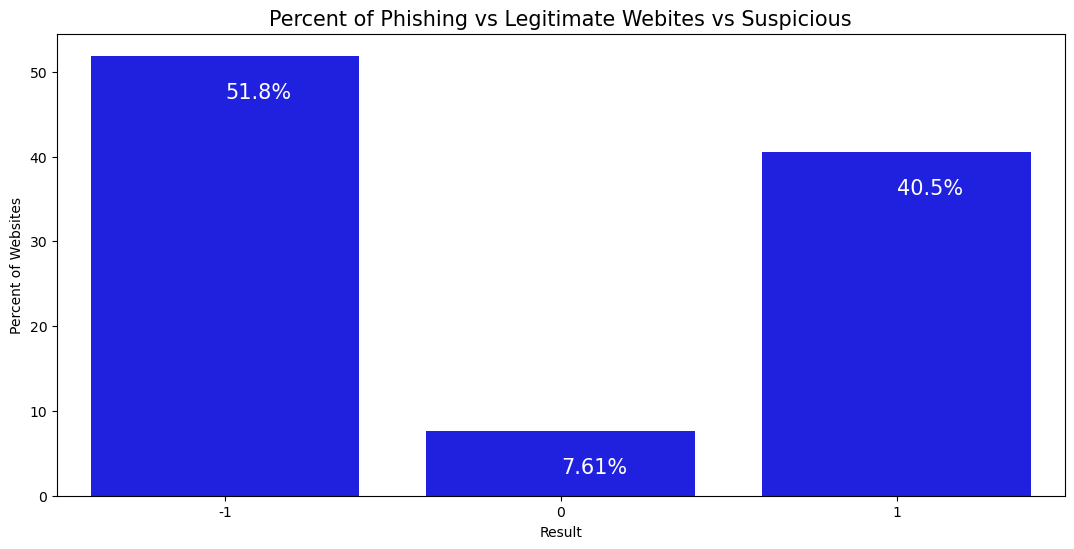

In [8]:
Result_p = df['Result'].value_counts().index
Count_p = df['Result'].value_counts().values / len(df) * 100
plt.figure(figsize=(13, 6))
ax = sns.barplot(x="Result", y="Result", estimator=lambda x: len(x) / len(df) * 100, data=df, color = 'Blue')
ax.set(ylabel="Percent of Websites");
ax.set_title('Percent of Phishing vs Legitimate Webites vs Suspicious', size = 15);
for i in range(3): 
    plt.annotate(str(Count_p[i])[0:4]+'%', xy=(Result_p[i]+1, Count_p[i]-5), color='white', size=15)
plt.show()

In [9]:
df_for_corr = df

Get rid of strongly correlated features

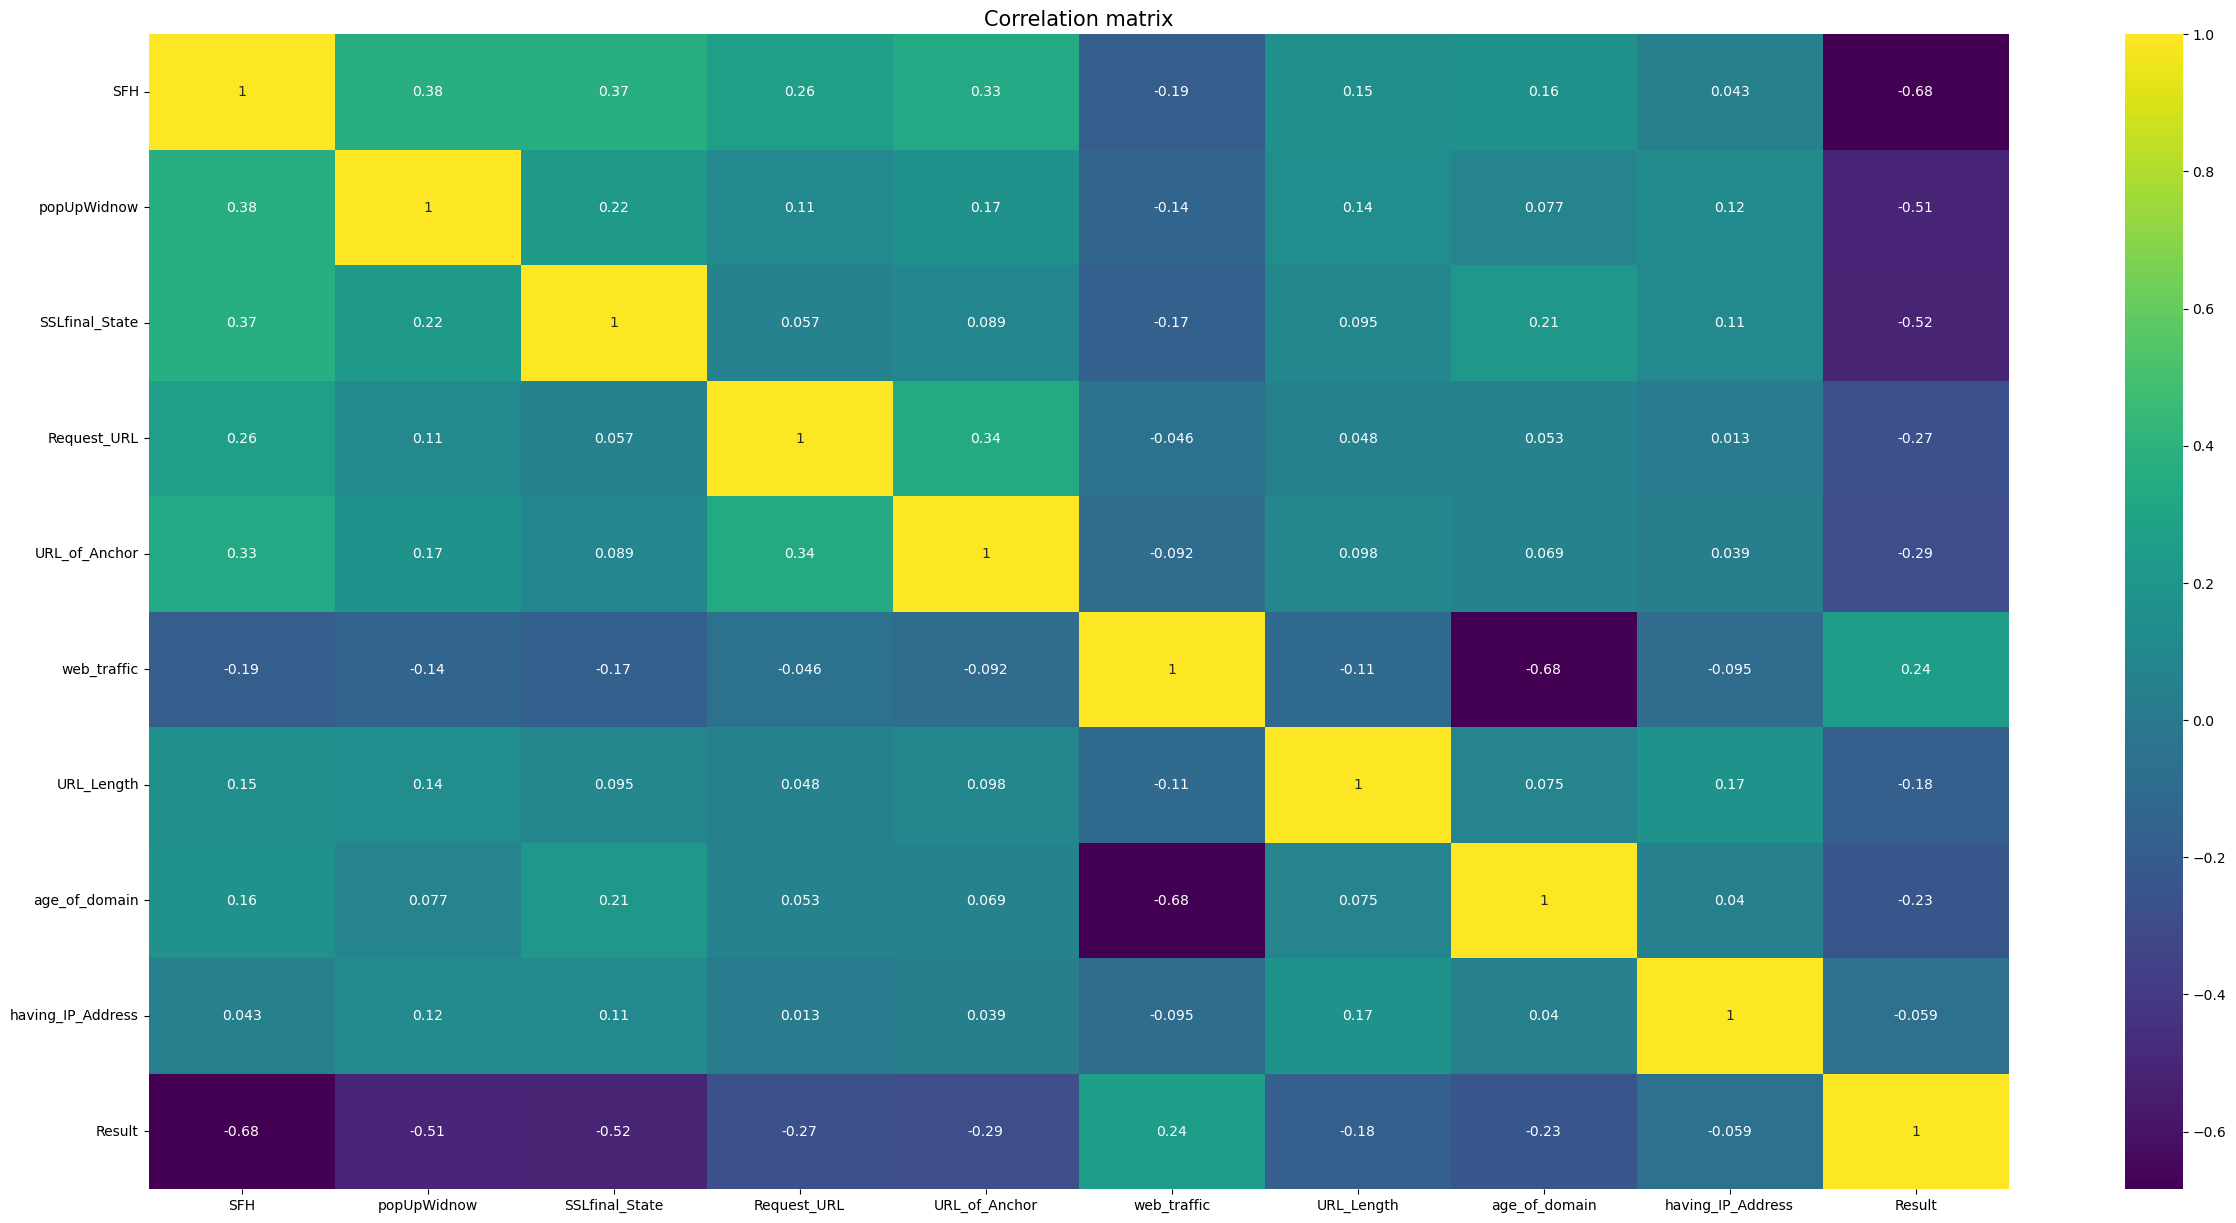

In [10]:
plt.figure(figsize=(30, 15))
df_corr = df_for_corr.corr()
sns.heatmap(df_corr, annot=True, cmap='viridis')
plt.title("Correlation matrix", size=15)
plt.show()

In [11]:
#Get rid of strongly correlated features features(corr>0.7). Indeed age_of_domain and web_traffic are particularly strongly correlated(-0.68), but we'll ignore it
df_no_strong_corr = df.drop(columns=['age_of_domain']) # get rid of age_of_domain, becaose of "particularly strong" correlation with web_trafic. Web_traffic has higher correlation with the result, so we leave it
df_no_strong_corr

SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  \
0       1           -1               1           -1             -1   
1      -1           -1              -1           -1             -1   
2       1           -1               0            0             -1   
3       1            0               1           -1             -1   
4      -1           -1               1           -1              0   
...   ...          ...             ...          ...            ...   
1348   -1           -1              -1           -1             -1   
1349   -1            0               1            0             -1   
1350   -1            0              -1           -1             -1   
1351    0            0               1            0              0   
1352    1            0               1            1              1   

      web_traffic  URL_Length  having_IP_Address  Result  
0               1           1                  0       0  
1               0           1                  1       1  
2               0          -1                  0       1  
3               0           1                  0       0  
4               0          -1                  0       1  
...           ...         ...                ...     ...  
1348           -1           0                  0       1  
1349            0           0                  0      -1  
1350            0          -1                  0       1  
1351            0          -1                  0       1  
1352            0          -1                  0      -1  

[1353 rows x 9 columns]

Implementing Principal Component Analysis

In [12]:
df_no_result = df.drop(columns=['Result'])
df_no_result

SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  \
0       1           -1               1           -1             -1   
1      -1           -1              -1           -1             -1   
2       1           -1               0            0             -1   
3       1            0               1           -1             -1   
4      -1           -1               1           -1              0   
...   ...          ...             ...          ...            ...   
1348   -1           -1              -1           -1             -1   
1349   -1            0               1            0             -1   
1350   -1            0              -1           -1             -1   
1351    0            0               1            0              0   
1352    1            0               1            1              1   

      web_traffic  URL_Length  age_of_domain  having_IP_Address  
0               1           1              1                  0  
1               0           1              1                  1  
2               0          -1              1                  0  
3               0           1              1                  0  
4               0          -1              1                  0  
...           ...         ...            ...                ...  
1348           -1           0              1                  0  
1349            0           0              1                  0  
1350            0          -1             -1                  0  
1351            0          -1              1                  0  
1352            0          -1             -1                  0  

[1353 rows x 9 columns]

[0.29929647 0.1986702  0.12886546 0.09691096 0.08278882 0.07634277
 0.05978149 0.04086279 0.01648105]
1.0


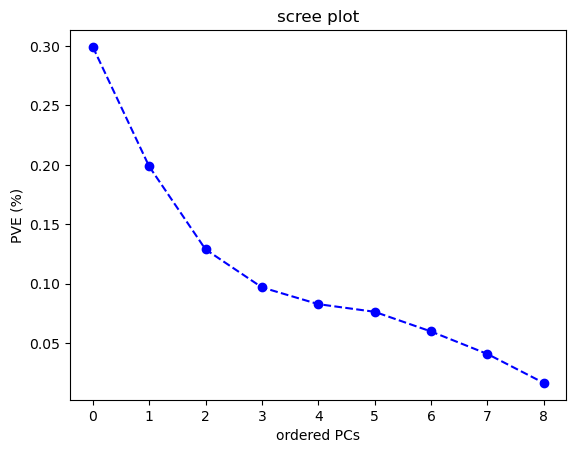

In [13]:
pca_model = PCA(n_components=9)
pca_coordinates = pca_model.fit_transform(df_no_result)
plt.plot(pca_model.explained_variance_ratio_, linestyle='--', marker='o', color='b')
plt.title('scree plot')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
print(pca_model.explained_variance_ratio_)
print(np.sum(pca_model.explained_variance_ratio_[:]))

[0.29929647 0.1986702  0.12886546 0.09691096 0.08278882]
0.806531902461201


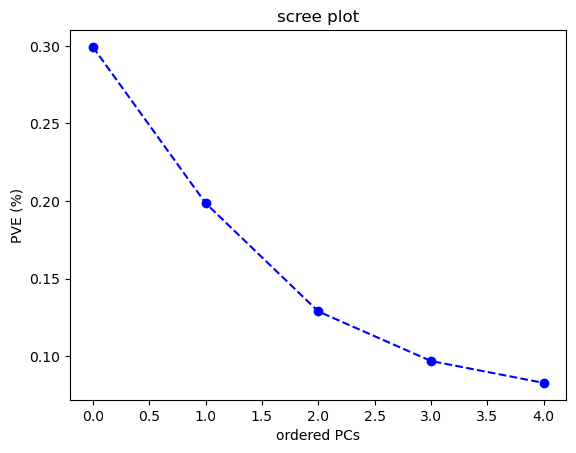

In [14]:
#Choose 5
pca_model = PCA(n_components=5)
pca_coordinates = pca_model.fit_transform(df_no_result)
plt.plot(pca_model.explained_variance_ratio_, linestyle='--', marker='o', color='b')
plt.title('scree plot')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
print(pca_model.explained_variance_ratio_)
print(np.sum(pca_model.explained_variance_ratio_[:]))

In [15]:
df_pca = pd.DataFrame(pca_coordinates)
df_pca.rename({0:'component1', 1:'component2', 2:'component3', 3:'component4', 4:'component5'}, axis=1, inplace=True)
df_pca['Result'] = df['Result']
df_pca

component1  component2  component3  component4  component5  Result
0      -0.040007   -0.534025    1.396626    0.657558    0.070759       0
1       1.126874   -1.694566   -0.602241    1.499749    0.151729       1
2      -0.048551   -0.771857    0.049534   -1.083485    0.707807       1
3      -0.655722   -0.809362    1.487724    0.779619    0.072811       0
4       0.462426   -1.250212   -0.285455   -0.897072   -0.932769       1
...          ...         ...         ...         ...         ...     ...
1348    0.905655   -2.166125   -0.919633    0.536760    0.005961       1
1349    0.235984   -1.225064    0.273278   -0.081086    0.583231      -1
1350    2.251159   -0.489224   -0.259562   -0.268173   -0.147528       1
1351   -0.459381   -0.448993   -0.025971   -1.091761   -0.045614       1
1352   -0.522904    1.874558   -0.114320   -1.208302    0.217738      -1

[1353 rows x 6 columns]

In [16]:
#Selecting the Best important features using SelectFromModel
X = df.drop(columns=['Result'])
y = df['Result']
sfm_selector = SelectFromModel(estimator=DecisionTreeClassifier())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

Index(['SFH'], dtype='object')

Tty without SFH

In [17]:
X = df.drop(columns=['Result','SFH'])
y = df['Result']
sfm_selector = SelectFromModel(estimator=DecisionTreeClassifier())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

Index(['popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor'], dtype='object')

In [18]:
df_SFM = df[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'Result']]
df_SFM

SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  Result
0       1           -1               1           -1             -1       0
1      -1           -1              -1           -1             -1       1
2       1           -1               0            0             -1       1
3       1            0               1           -1             -1       0
4      -1           -1               1           -1              0       1
...   ...          ...             ...          ...            ...     ...
1348   -1           -1              -1           -1             -1       1
1349   -1            0               1            0             -1      -1
1350   -1            0              -1           -1             -1       1
1351    0            0               1            0              0       1
1352    1            0               1            1              1      -1

[1353 rows x 6 columns]

In [19]:
np.random.seed(42)
X_for_corr = df_for_corr.drop('Result', axis = 1)
y_for_corr = df_for_corr['Result']
X_train_for_corr, X_test_for_corr, y_train_for_corr, y_test_for_corr = train_test_split(X_for_corr, y_for_corr, test_size=0.33)
  

In [20]:
X_no_strong_corr = df_no_strong_corr.drop('Result', axis = 1)
y_no_strong_corr = df_no_strong_corr['Result']
X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr = train_test_split(X_no_strong_corr, y_no_strong_corr, test_size=0.33)
  

In [21]:
X_pca = df_pca.drop('Result', axis = 1)
y_pca = df_pca['Result']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.33)
   


In [22]:
X_SFM = df_SFM.drop('Result', axis = 1)
y_SFM = df_SFM['Result']
X_train_SFM, X_test_SFM, y_train_SFM, y_test_SFM = train_test_split(X_SFM, y_SFM, test_size=0.33)
 

# Decision Tree

## Include all features
Use the methods  𝙳𝚎𝚌𝚒𝚜𝚒𝚘𝚗𝚃𝚛𝚎𝚎𝙲𝚕𝚊𝚜𝚜𝚒𝚏𝚒𝚎𝚛() and  𝚙𝚕𝚘𝚝⎯𝚝𝚛𝚎𝚎() of  𝚜𝚌𝚒𝚔𝚒𝚝⎯𝚕𝚎𝚊𝚛𝚗 to train, test and depict a 3 class classification tree

In [23]:
data = df.drop(columns=['Result'])
target = df['Result']
feat_names = df.columns
targ_names = 'Result'
print(data.shape)


X_train, X_test, y_train, y_test = X_train_for_corr, X_test_for_corr, y_train_for_corr, y_test_for_corr 
print(X_train.shape)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')

(1353, 9)
(906, 9)
training accuracy 0.9690949227373068
 testing accuracy 0.8903803131991052


In [24]:
print('Depth is',tree_model.tree_.max_depth + 1)
print('Number of leafes ', tree_model.tree_.n_leaves)

Depth is 15
Number of leafes  134


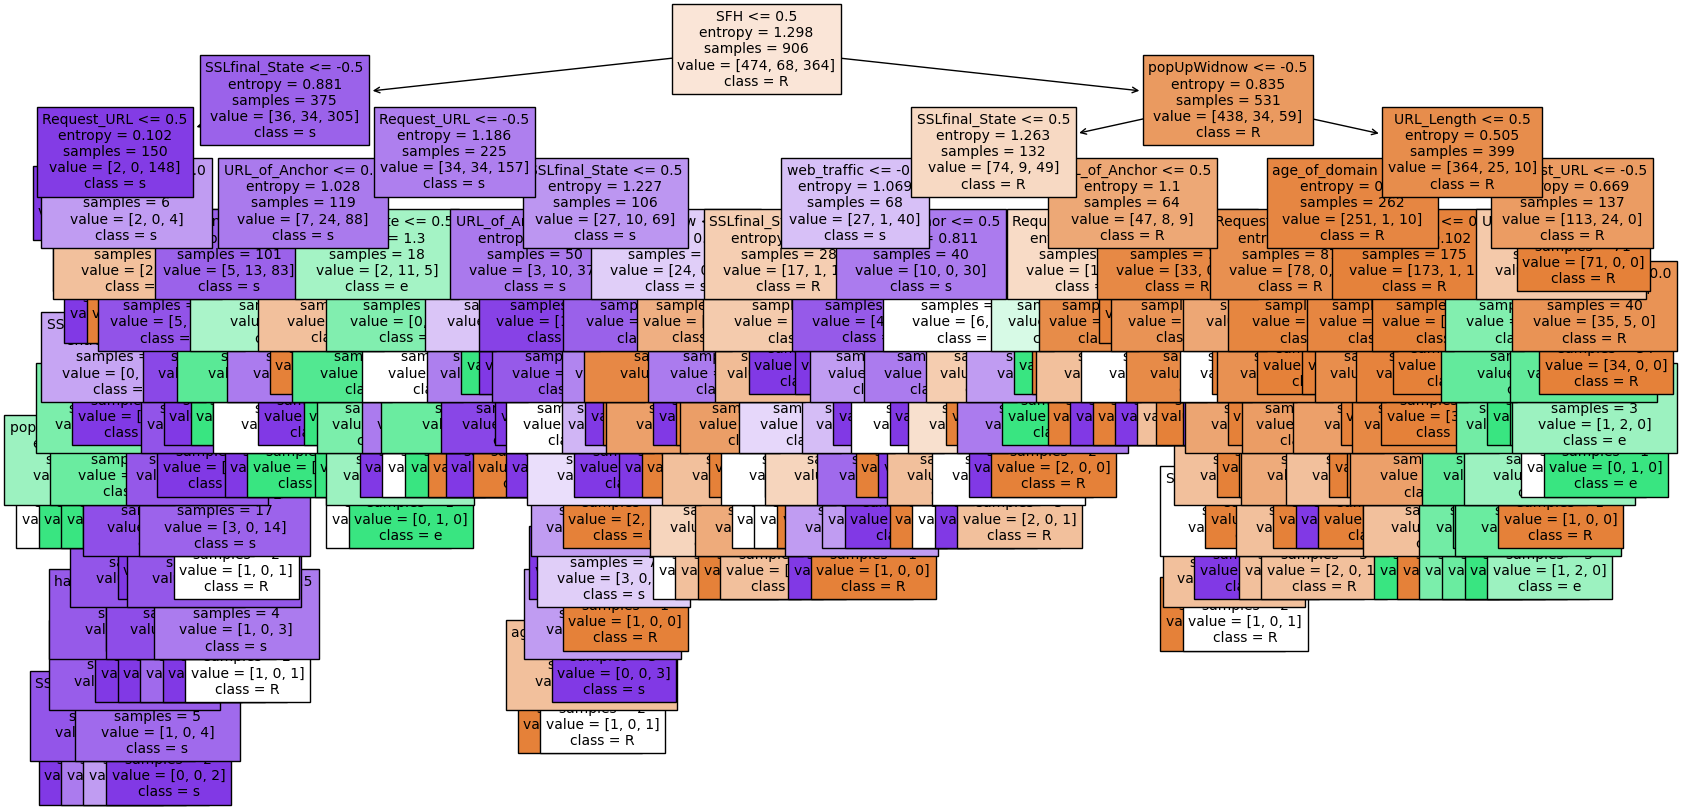

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

Apply the pruning by penalizing the tree complexity with the optional parameter $\texttt{ccp}$_$\texttt{alpha}$ according to the penalized function $\sum\limits_{p=1}^{|T|} \Big(-\sum\limits_{k=1,K}f_k \log(f_k) \Big)+ \alpha |T|$ and observe the difference with respect to the non-penalized one

Train a classification tree with pruning with grid-search cross-validation on the complexity parameter

best alpha 0.003
training accuracy 0.9448123620309051
 testing accuracy 0.9172259507829977


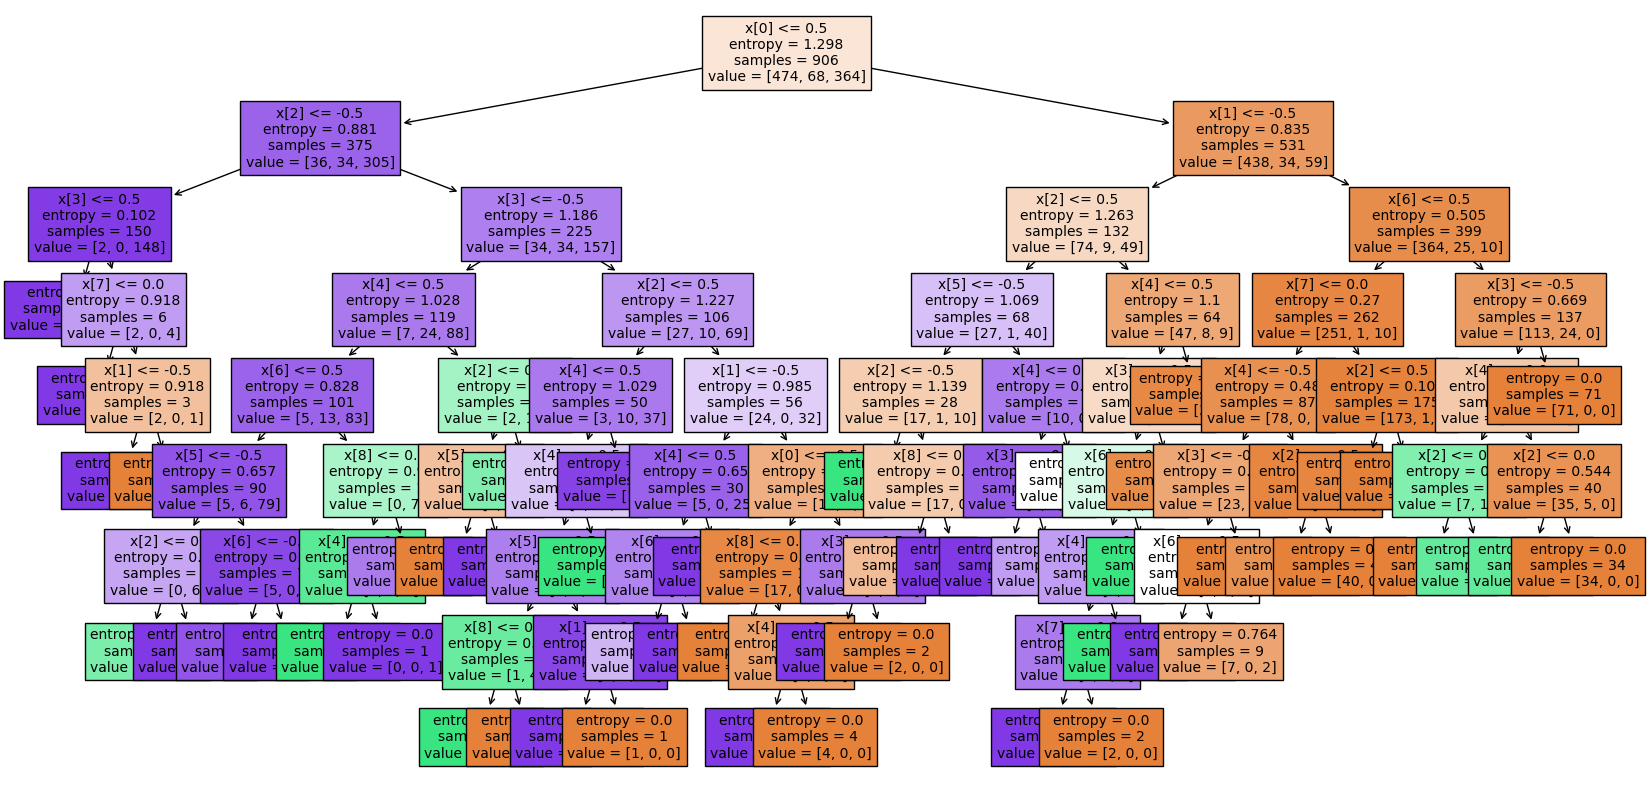

Depth is 9
Number of leafes  52


In [26]:
grid_of_values ={'ccp_alpha':[1, 0.5, 0.05, 0.003, 0]}
grid_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_of_values, cv=5)
grid_model.fit(X_train,y_train)
best_alpha_df = grid_model.best_params_['ccp_alpha']
best_dt_df = grid_model.best_estimator_

print(f'best alpha {best_alpha_df}')

tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=best_alpha_df)
tree_model.fit(X_train, y_train)

y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, filled=True)
plt.show()

print('Depth is',tree_model.tree_.max_depth + 1)
print('Number of leafes ', tree_model.tree_.n_leaves)

## Without strongly correlated features
Use the methods  𝙳𝚎𝚌𝚒𝚜𝚒𝚘𝚗𝚃𝚛𝚎𝚎𝙲𝚕𝚊𝚜𝚜𝚒𝚏𝚒𝚎𝚛() and  𝚙𝚕𝚘𝚝⎯𝚝𝚛𝚎𝚎() of  𝚜𝚌𝚒𝚔𝚒𝚝⎯𝚕𝚎𝚊𝚛𝚗 to train, test and depict a 3 class classification tree

(1353, 8)
(906, 8)
training accuracy 0.9536423841059603
 testing accuracy 0.883668903803132


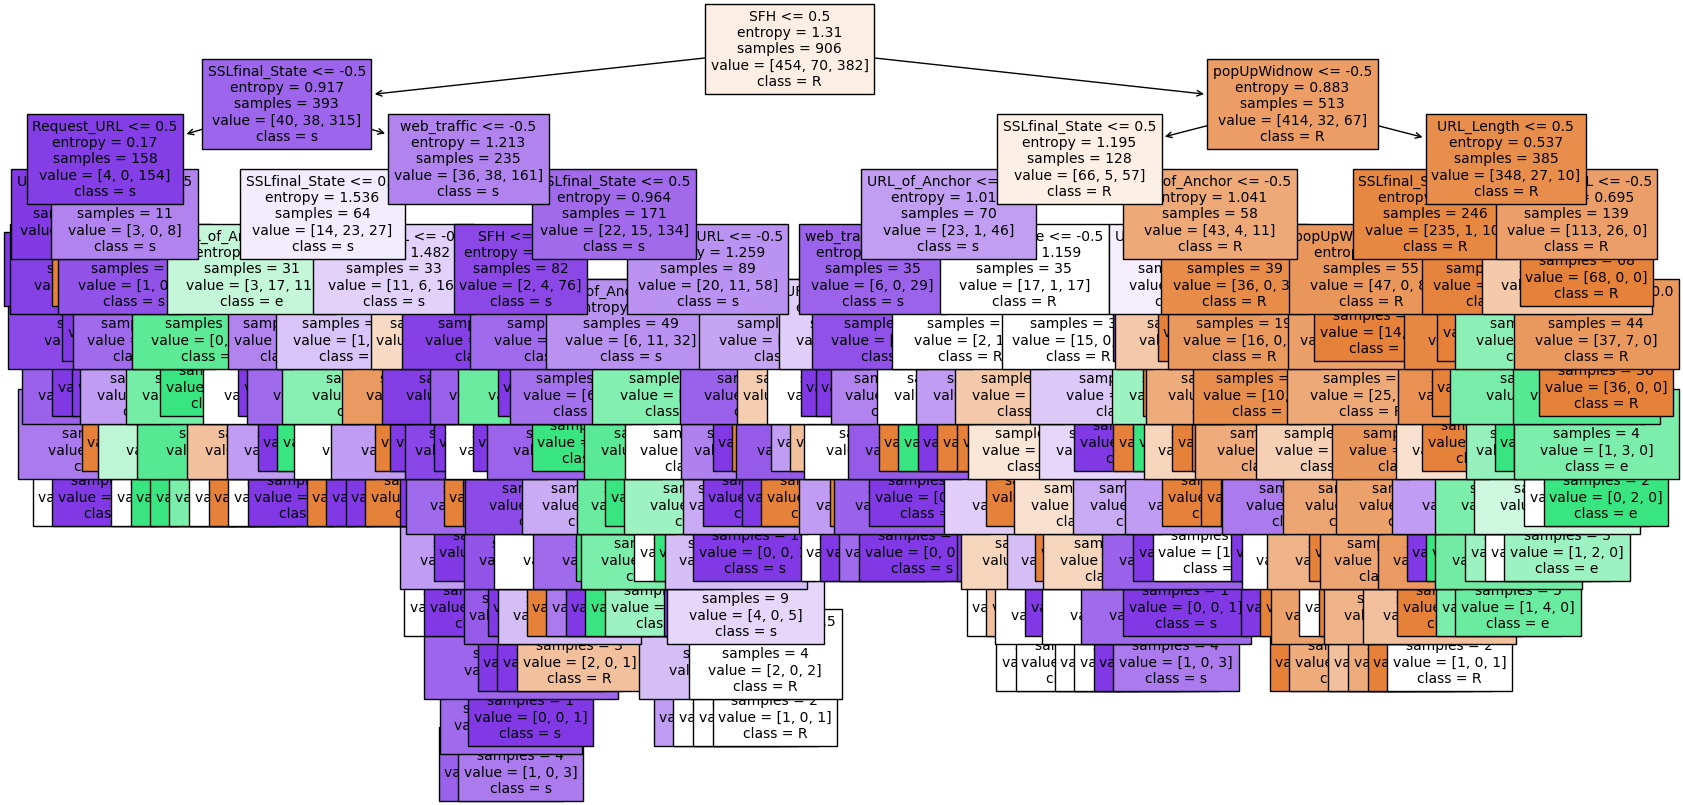

Depth is 14
Number of leafes  147


In [27]:
data = df_no_strong_corr.drop(columns=['Result'])
target = df_no_strong_corr['Result']
feat_names = df_no_strong_corr.columns
targ_names = 'Result'
print(data.shape)


X_train, X_test, y_train, y_test = X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr 
print(X_train.shape)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()
print('Depth is',tree_model.tree_.max_depth + 1)
print('Number of leafes ', tree_model.tree_.n_leaves)

Apply the pruning by penalizing the tree complexity with the optional parameter $\texttt{ccp}$_$\texttt{alpha}$ according to the penalized function $\sum\limits_{p=1}^{|T|} \Big(-\sum\limits_{k=1,K}f_k \log(f_k) \Big)+ \alpha |T|$ and observe the difference with respect to the non-penalized one

Train a classification tree with pruning with grid-search cross-validation on the complexity parameter

best alpha 0.003
training accuracy 0.9293598233995585
 testing accuracy 0.9082774049217002


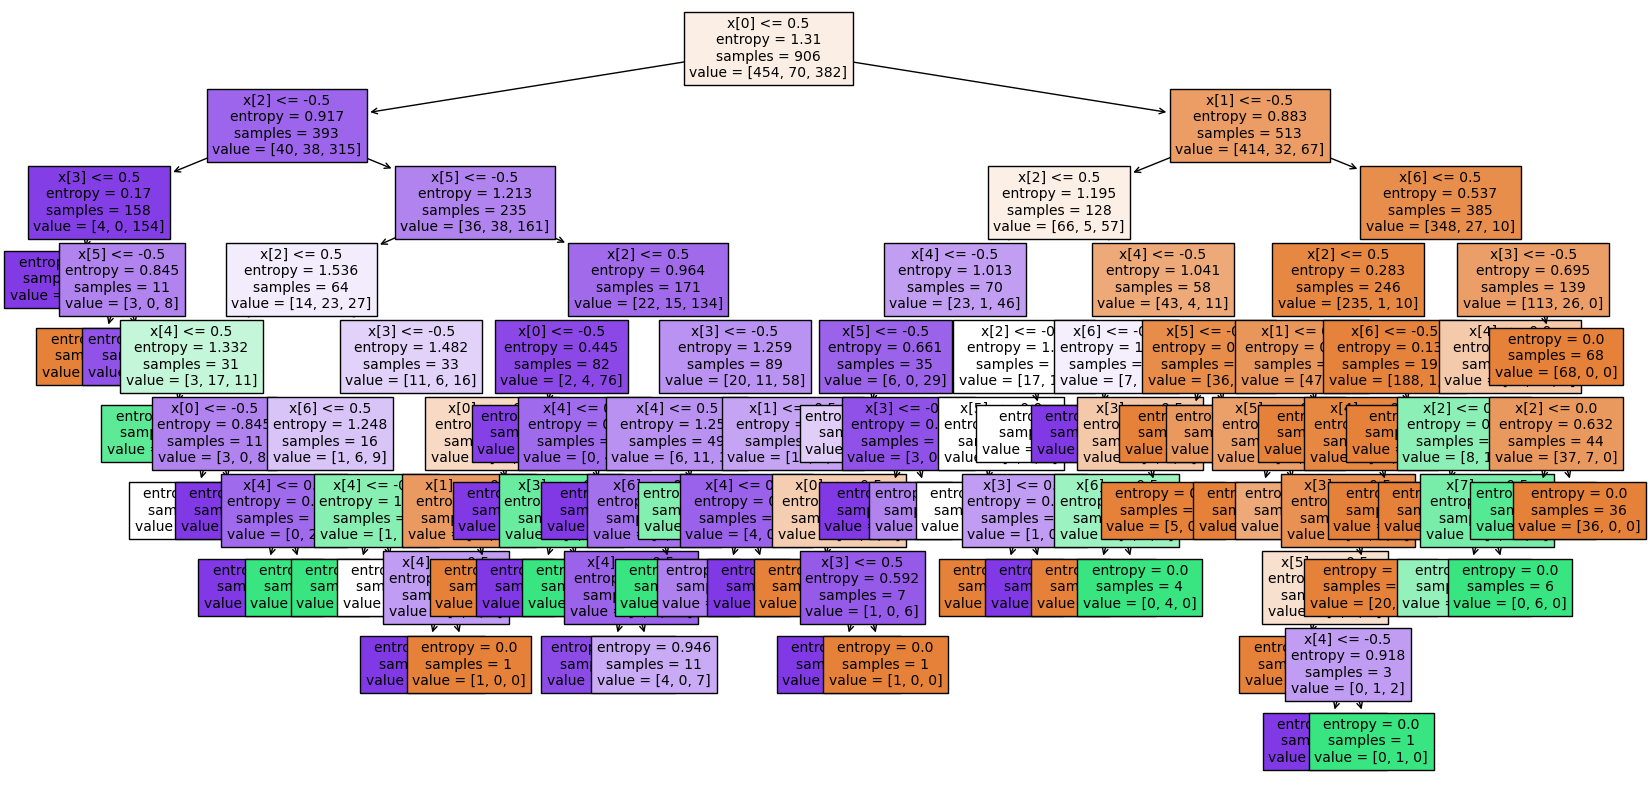

Depth is 10
Number of leafes  55


In [28]:
grid_of_values ={'ccp_alpha':[1, 0.5, 0.05, 0.003, 0]}
grid_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_of_values, cv=5)
grid_model.fit(X_train,y_train)
best_alpha_c = grid_model.best_params_['ccp_alpha']
best_dt_c = grid_model.best_estimator_

print(f'best alpha {best_alpha_c}')

tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=best_alpha_c)
tree_model.fit(X_train, y_train)

y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, filled=True)
plt.show()

print('Depth is',tree_model.tree_.max_depth + 1)
print('Number of leafes ', tree_model.tree_.n_leaves)

## After PCA
Use the methods  𝙳𝚎𝚌𝚒𝚜𝚒𝚘𝚗𝚃𝚛𝚎𝚎𝙲𝚕𝚊𝚜𝚜𝚒𝚏𝚒𝚎𝚛() and  𝚙𝚕𝚘𝚝⎯𝚝𝚛𝚎𝚎() of  𝚜𝚌𝚒𝚔𝚒𝚝⎯𝚕𝚎𝚊𝚛𝚗 to train, test and depict a 3 class classification tree

(1353, 5)
(906, 5)
training accuracy 0.9635761589403974
 testing accuracy 0.8612975391498882


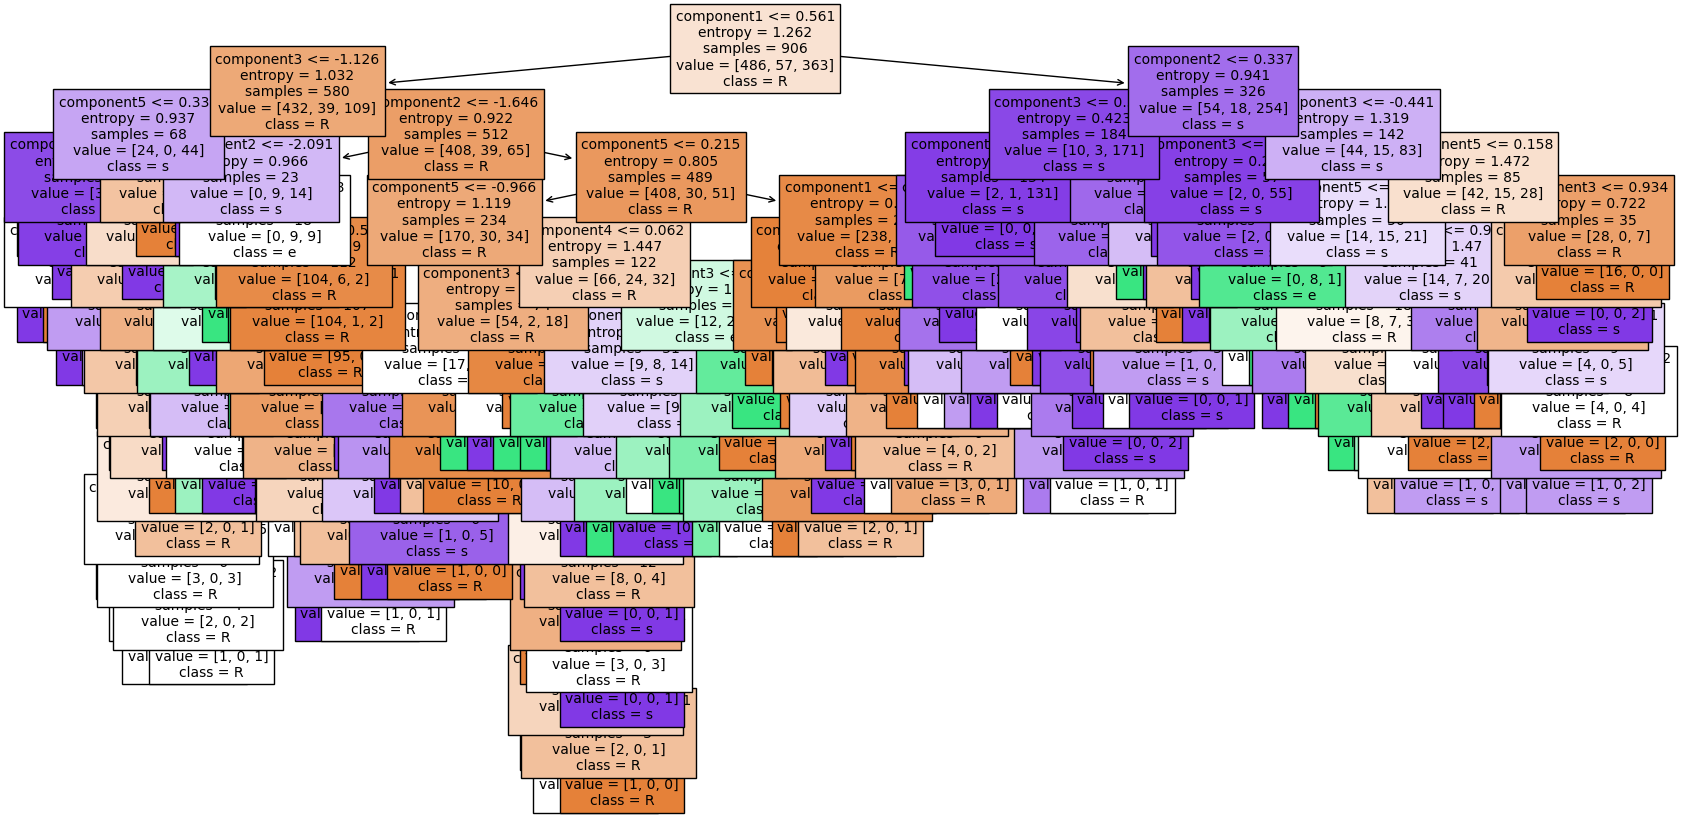

Depth is 18
Number of leafes  123


In [29]:
data = df_pca.drop(columns=['Result'])
target = df_pca['Result']
feat_names = df_pca.columns
targ_names = 'Result'
print(data.shape)


X_train, X_test, y_train, y_test = X_train_pca, X_test_pca, y_train_pca, y_test_pca 
print(X_train.shape)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

print('Depth is',tree_model.tree_.max_depth + 1)
print('Number of leafes ', tree_model.tree_.n_leaves)

Apply the pruning by penalizing the tree complexity with the optional parameter $\texttt{ccp}$_$\texttt{alpha}$ according to the penalized function $\sum\limits_{p=1}^{|T|} \Big(-\sum\limits_{k=1,K}f_k \log(f_k) \Big)+ \alpha |T|$ and observe the difference with respect to the non-penalized one

Train a classification tree with pruning with grid-search cross-validation on the complexity parameter

best alpha 0.003
training accuracy 0.9426048565121413
 testing accuracy 0.8791946308724832


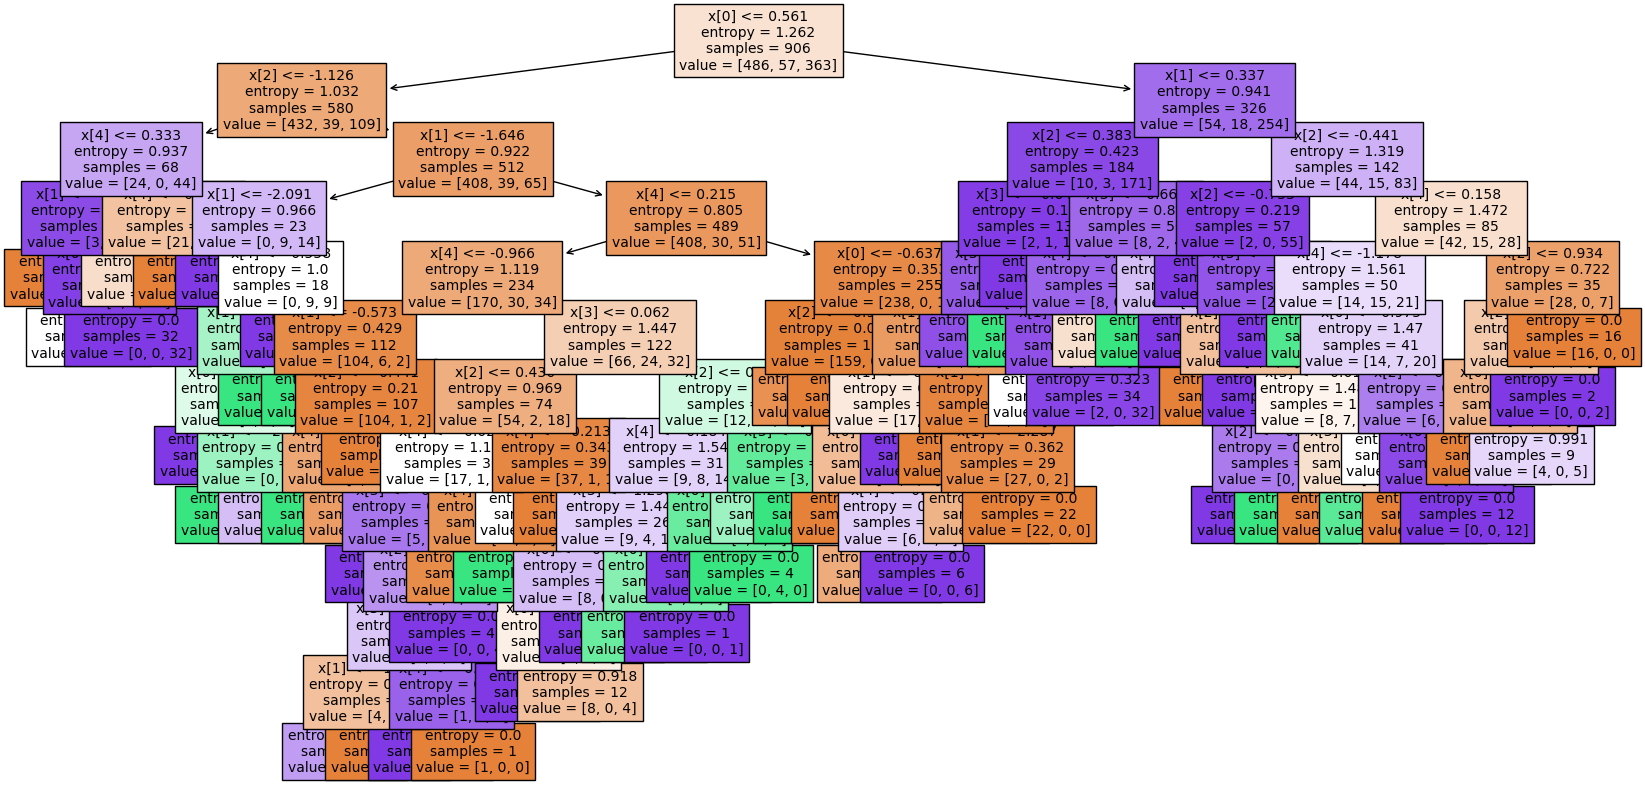

Depth is 13
Number of leafes  67


In [30]:
grid_of_values ={'ccp_alpha':[1, 0.5, 0.05, 0.003, 0]}
grid_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_of_values, cv=5)
grid_model.fit(X_train,y_train)
best_alpha_pca = grid_model.best_params_['ccp_alpha']
best_dt_pca = grid_model.best_estimator_

print(f'best alpha {best_alpha_pca}')

tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=best_alpha_pca)
tree_model.fit(X_train, y_train)

y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, filled=True)
plt.show()

print('Depth is',tree_model.tree_.max_depth + 1)
print('Number of leafes ', tree_model.tree_.n_leaves)

## Using feachers chosen with SelectFromModel
Use the methods  𝙳𝚎𝚌𝚒𝚜𝚒𝚘𝚗𝚃𝚛𝚎𝚎𝙲𝚕𝚊𝚜𝚜𝚒𝚏𝚒𝚎𝚛() and  𝚙𝚕𝚘𝚝⎯𝚝𝚛𝚎𝚎() of  𝚜𝚌𝚒𝚔𝚒𝚝⎯𝚕𝚎𝚊𝚛𝚗 to train, test and depict a 3 class classification tree

(1353, 5)
(906, 5)
training accuracy 0.9017660044150111
 testing accuracy 0.8657718120805369


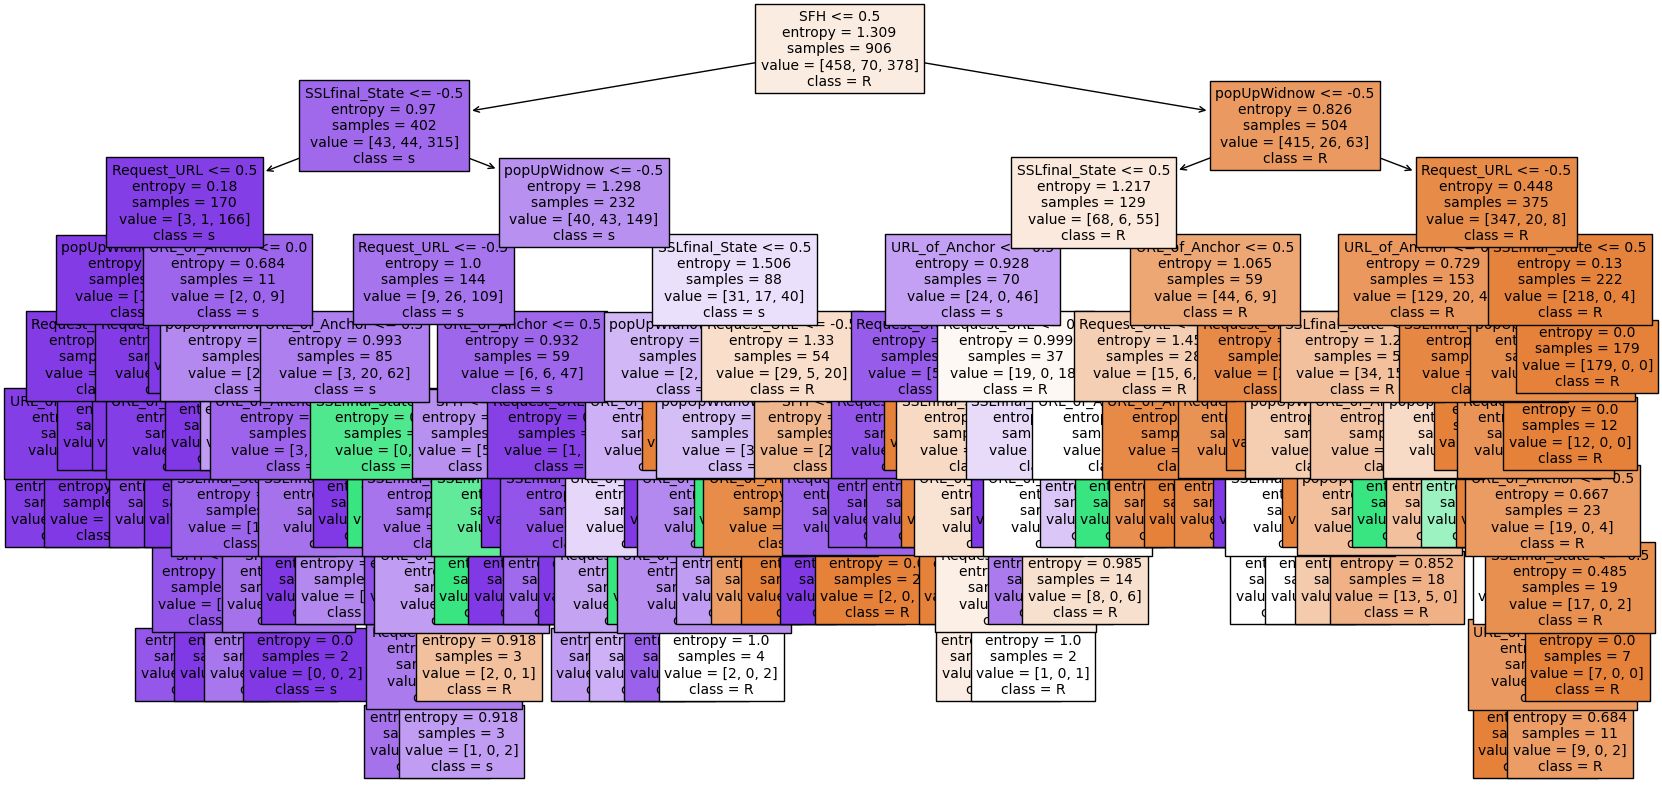

Depth is 10
Number of leafes  72


In [31]:
data = df_SFM.drop(columns=['Result'])
target = df_SFM['Result']
feat_names = df_SFM.columns
targ_names = 'Result'
print(data.shape)


X_train, X_test, y_train, y_test = X_train_SFM, X_test_SFM, y_train_SFM, y_test_SFM 
print(X_train.shape)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()
print('Depth is',tree_model.tree_.max_depth + 1)
print('Number of leafes ', tree_model.tree_.n_leaves)

Apply the pruning by penalizing the tree complexity with the optional parameter $\texttt{ccp}$_$\texttt{alpha}$ according to the penalized function $\sum\limits_{p=1}^{|T|} \Big(-\sum\limits_{k=1,K}f_k \log(f_k) \Big)+ \alpha |T|$ and observe the difference with respect to the non-penalized one

Train a classification tree with pruning with grid-search cross-validation on the complexity parameter

best alpha 0
training accuracy 0.9017660044150111
 testing accuracy 0.8657718120805369


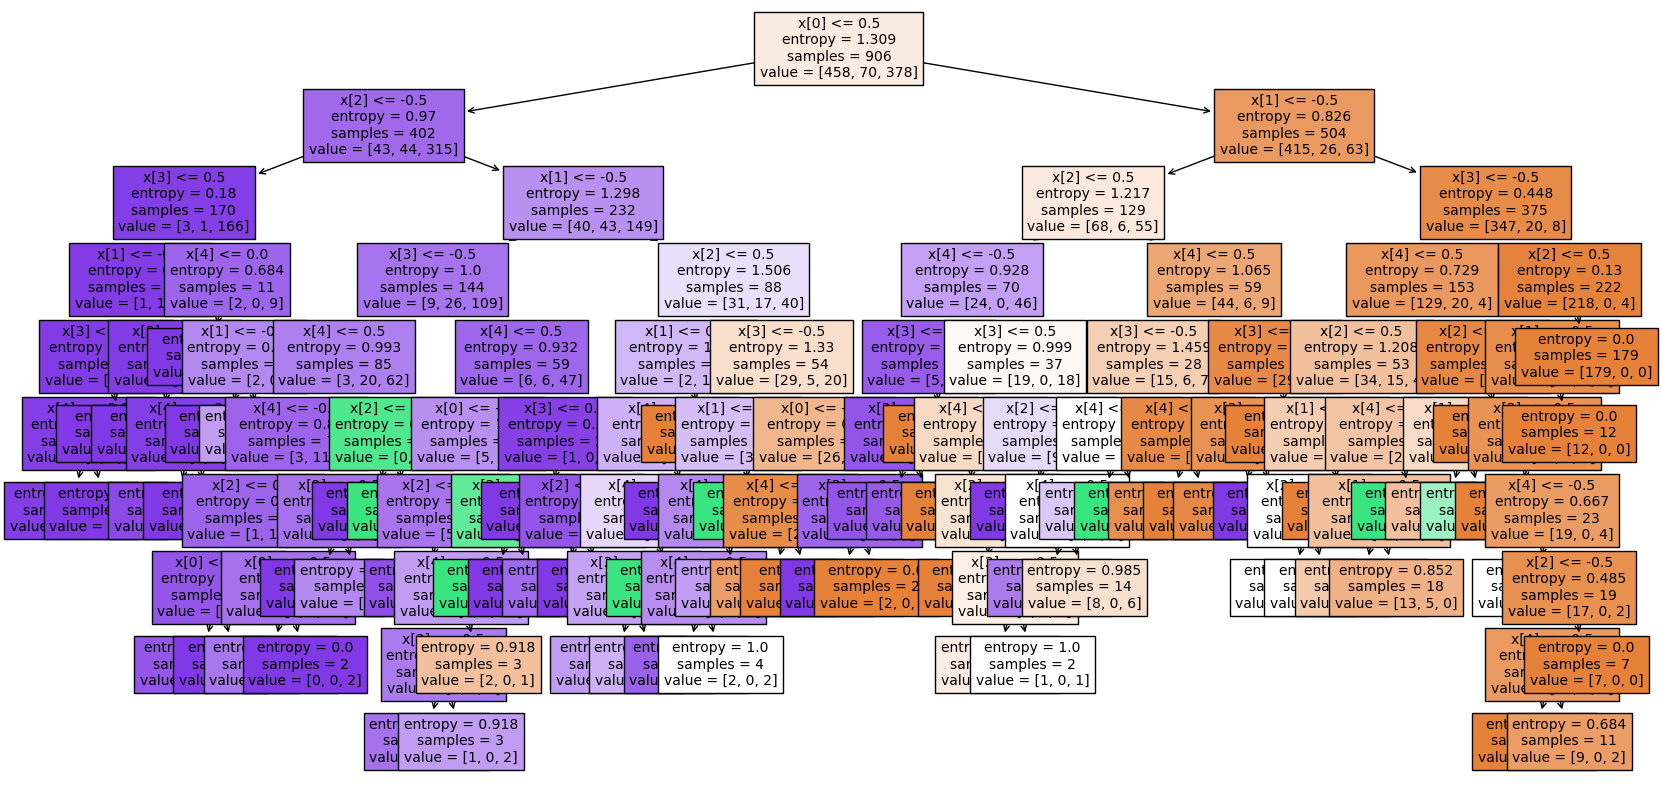

Depth is 10
Number of leafes  72


In [32]:
grid_of_values ={'ccp_alpha':[1, 0.5, 0.05, 0.003, 0]}
grid_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_of_values, cv=5)
grid_model.fit(X_train,y_train)
best_alpha_SFM = grid_model.best_params_['ccp_alpha']
best_dt_SFM = grid_model.best_estimator_

print(f'best alpha {best_alpha_SFM}')

tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=best_alpha_SFM)
tree_model.fit(X_train, y_train)

y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, filled=True)
plt.show()

print('Depth is',tree_model.tree_.max_depth + 1)
print('Number of leafes ', tree_model.tree_.n_leaves)

SVM


In [33]:
#np.random.seed(42)
kfold = StratifiedKFold(n_splits=10)

In [34]:
classifiers = {"SVC":SVC(),
               #"SVC1_k":OutputCodeClassifier(SVC(),code_size=3),
               "SVC1_r":OneVsRestClassifier(SVC()),
               "DecisionTree":DecisionTreeClassifier(),
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1),
                "RandomForest":RandomForestClassifier(),
               "GradientBoosting":GradientBoostingClassifier(),
               "LogisticRegressionCV":LogisticRegressionCV(),
               "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis()}


def fun(X_train, X_test, y_train, y_test,classifiers):
    cv_results = []
    for classifier in classifiers.values() :
        cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":classifiers.keys()})
    
    cv1=cv_res.sort_values(by = 'CrossValMeans', ascending = False)
    return cv1

In [35]:
fun(X_train_for_corr, X_test_for_corr, y_train_for_corr, y_test_for_corr,classifiers)

CrossValMeans  CrossValerrors                   Algorithm
5       0.902857        0.034543            GradientBoosting
4       0.890684        0.031636                RandomForest
2       0.876325        0.037263                DecisionTree
3       0.873016        0.030707                    AdaBoost
1       0.864286        0.028135                      SVC1_r
0       0.864261        0.021392                         SVC
6       0.831148        0.029064        LogisticRegressionCV
7       0.827888        0.028792  LinearDiscriminantAnalysis

In [36]:
fun(X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr,classifiers)

CrossValMeans  CrossValerrors                   Algorithm
5       0.881905        0.027150            GradientBoosting
4       0.870891        0.031465                RandomForest
0       0.866386        0.032848                         SVC
1       0.857546        0.033263                      SVC1_r
2       0.856520        0.033405                DecisionTree
3       0.848803        0.032950                    AdaBoost
6       0.817778        0.036004        LogisticRegressionCV
7       0.812259        0.034507  LinearDiscriminantAnalysis

In [37]:
fun(X_train_pca, X_test_pca, y_train_pca, y_test_pca,classifiers)

CrossValMeans  CrossValerrors                   Algorithm
5       0.863040        0.023311            GradientBoosting
4       0.863028        0.027702                RandomForest
0       0.853175        0.019933                         SVC
1       0.846520        0.021014                      SVC1_r
2       0.839792        0.040526                DecisionTree
3       0.832161        0.033654                    AdaBoost
6       0.815568        0.041552        LogisticRegressionCV
7       0.814457        0.035066  LinearDiscriminantAnalysis

In [38]:
## Search grid for optimal parameters
SVC_param_grid = {
              "kernel": [ 'linear','sigmoid', 'rbf'],
              "gamma" :['scale', 'auto',0.01,0.1,1],
              #"degree" :[2,3],
              "coef0" :[-2,-1,-0.5 ,0,1],
              "C": [0.1, 1.0, 10.0, 100]}

SVC1_r_param_grid = {
              "estimator__kernel": [ 'rbf','sigmoid','linear'],
              "estimator__gamma" :[0.01,'scale', 'auto',0.1,1],
              #"degree" :[2,3],
              "estimator__coef0" :[-2,-1,-0.5 ,0,1],
              "estimator__C": [0.1, 1.0, 10.0, 100]}

dt_param_grid = {
              'criterion' :[ 'gini','entropy'],
              #'splitter' :   ["best", "random"],
              'ccp_alpha' : [0.0001, 0.001, 0.01, 0.1, 0,1]
             }

ada_param_grid = {"estimator__criterion" : ["gini", "entropy"],
              "estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[10, 50, 100, 150],
              "learning_rate":  [ 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
GBC_param_grid = {
              "n_estimators" :[10, 50, 100, 150, 200],
              "learning_rate":  [ 0.001, 0.01, 0.1, 0.2, 1 ,1.5]}
rf_param_grid ={
                #'bootstrap': [True, False],
                 #'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 #'max_features': [ 2,3,'sqrt'],
                 #'min_samples_leaf': [1, 2, 4],
                 #'min_samples_split': [2, 5, 10],
                 #'n_estimators': [50,100,200, 400, 600, 800],
              #"max_features": [2, 3,  7],
              "n_estimators" :[50, 100, 200,300, 500,600],
                'ccp_alpha' : [ 0, 0.1, 0.01, 0.001,1],
                'criterion': [ "gini","entropy"]}

collect_param={"SVC":SVC_param_grid,
               #"SVC1_k":SVC1_r_param_grid,
               "SVC1_r":SVC1_r_param_grid,
               #"DecisionTree_cros_valid":dt_param_grid,
               "AdaBoost":ada_param_grid,
               "RandomForest":rf_param_grid,
               "GradientBoosting":GBC_param_grid}



def fun1(flag,classifiers,collect_param,X_train, X_test, y_train, y_test):
    
    gsSVM = GridSearchCV(classifiers[flag],param_grid = collect_param[flag],   n_jobs= -1, verbose = 1)

    gsSVM.fit(X_train,y_train)
    best = gsSVM.best_estimator_
    c={flag: [best,gsSVM.best_params_]}
    return c


In [39]:
c={}
for  param in collect_param.keys():
    c.update(fun1(param,classifiers,collect_param,X_train_for_corr, X_test_for_corr, y_train_for_corr, y_test_for_corr))
    
       
c.update({"DecisionTree":[DecisionTreeClassifier(criterion = 'entropy'),{'criterion' : 'entropy','ccp_alpha':0}],
         "DecisionTree_cross_valid_alpha":[best_dt_df,{'criterion' : 'entropy','ccp_alpha':best_alpha_df}]})
print(c)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'SVC': [SVC(C=100, coef0=-2, kernel='sigmoid'), {'C': 100, 'coef0': -2, 'gamma': 'scale', 'kernel': 'sigmoid'}], 'SVC1_r': [OneVsRestClassifier(estimator=SVC(C=100, coef0=-2, kernel='sigmoid')), {'estimator__C': 100, 'estimator__coef0': -2, 'estimator__gamma': 'scale', 'estimator__kernel': 'sigmoid'}], 'AdaBoost': [AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    splitter='random'),
                   learning_rate=0.3, n_estimators=10), {'algorithm': 'SAMME', 'estimator__criterion': 'entropy', 'estimator__splitter': 'random', 'learning_rate': 0.3, 'n_estimators':

In [45]:
cc={}
for  param in collect_param.keys():
    cc.update(fun1(param,classifiers,collect_param,X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr))
    
cc.update({"DecisionTree":[DecisionTreeClassifier(criterion = 'entropy'),{'criterion' : 'entropy','ccp_alpha':0}],
         "DecisionTree_cross_valid_alpha":[best_dt_c,{'criterion' :'entropy','ccp_alpha': best_alpha_c}]})
print(cc)  

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'SVC': [SVC(C=100, coef0=-1, gamma=0.1, kernel='sigmoid'), {'C': 100, 'coef0': -1, 'gamma': 0.1, 'kernel': 'sigmoid'}], 'SVC1_r': [OneVsRestClassifier(estimator=SVC(C=10.0, coef0=-2, gamma='auto')), {'estimator__C': 10.0, 'estimator__coef0': -2, 'estimator__gamma': 'auto', 'estimator__kernel': 'rbf'}], 'AdaBoost': [AdaBoostClassifier(estimator=DecisionTreeClassifier(splitter='random'),
                   learning_rate=1.5, n_estimators=10), {'algorithm': 'SAMME.R', 'estimator__criterion': 'gini', 'estimator__splitter': 'random', 'learning_rate': 1.5, 'n_estimators': 10}], 'RandomForest': [RandomForestClassifier(ccp_alpha=0), {'ccp_alpha': 0, 'criterion': 'gini', 'n_estimators

In [46]:
ccc={}
for  param in collect_param.keys():
    ccc.update(fun1(param,classifiers,collect_param,X_train_pca, X_test_pca, y_train_pca, y_test_pca))
   

ccc.update({"DecisionTree":[DecisionTreeClassifier(criterion = 'entropy'),{'criterion' : 'entropy','ccp_alpha':0}],
         "DecisionTree_cross_valid_alpha":[best_dt_pca,{'criterion' : 'entropy','ccp_alpha':best_alpha_pca}]})
print(ccc)    

cccc={"DecisionTree":[DecisionTreeClassifier(criterion = 'entropy'),{'criterion' : 'entropy','ccp_alpha':0}],
      "DecisionTree_cross_valid_alpha":[best_dt_SFM,{'criterion' : 'entropy','ccp_alpha':best_alpha_SFM}]}

print(cccc) 

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'SVC': [SVC(C=100, coef0=-2), {'C': 100, 'coef0': -2, 'gamma': 'scale', 'kernel': 'rbf'}], 'SVC1_r': [OneVsRestClassifier(estimator=SVC(C=100, coef0=-2)), {'estimator__C': 100, 'estimator__coef0': -2, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}], 'AdaBoost': [AdaBoostClassifier(estimator=DecisionTreeClassifier(splitter='random'),
                   learning_rate=0.01, n_estimators=150), {'algorithm': 'SAMME.R', 'estimator__criterion': 'gini', 'estimator__splitter': 'random', 'learning_rate': 0.01, 'n_estimators': 150}], 'RandomForest': [RandomForestClassifier(ccp_alpha=0.01, criterion='entropy', n_estimators=600), {'ccp_alpha': 0.01, 'criterion': 'entropy', 'n_es

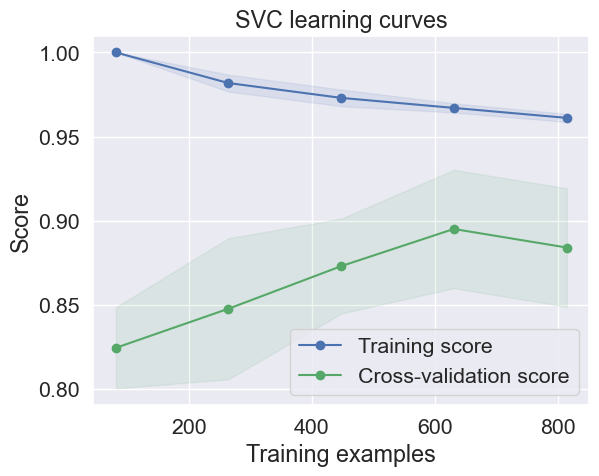

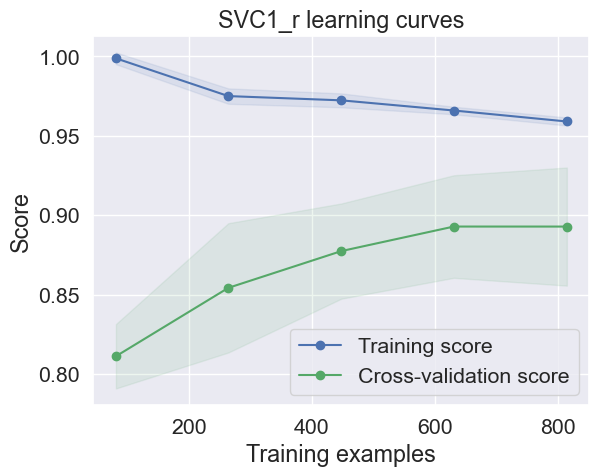

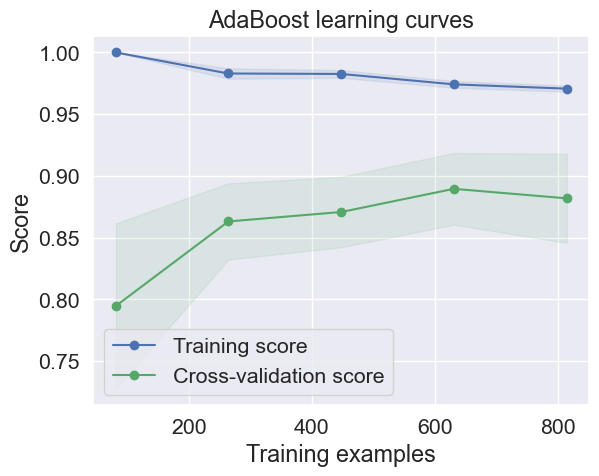

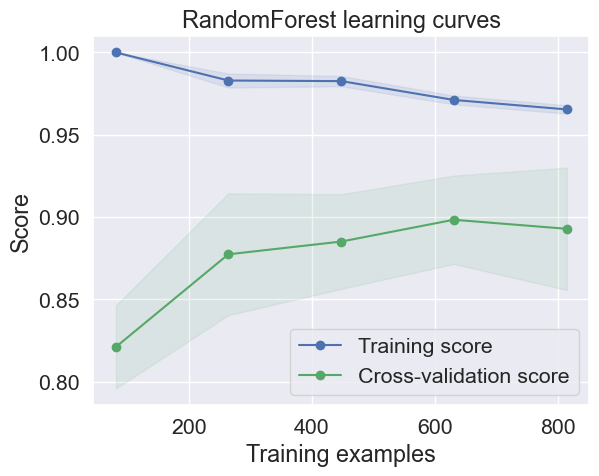

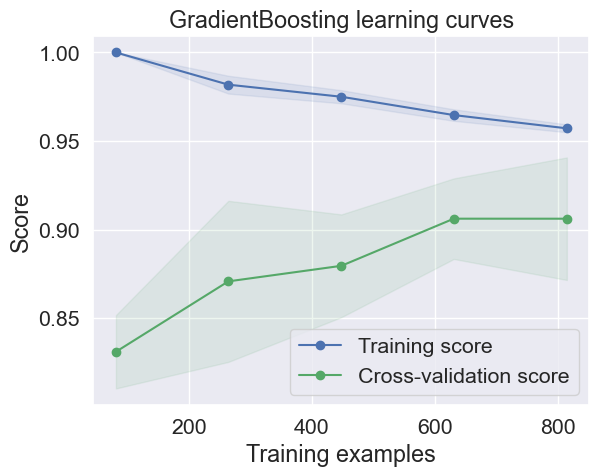

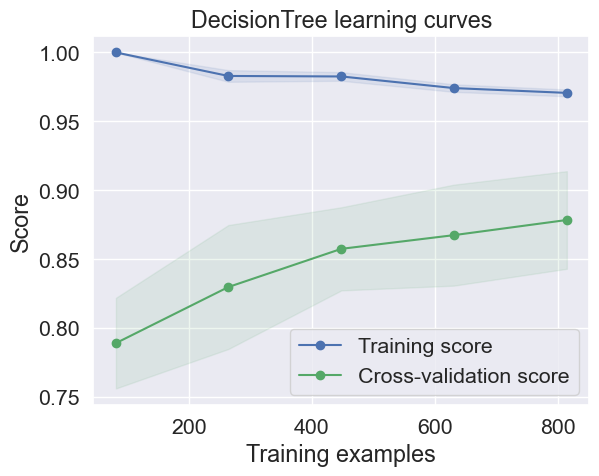

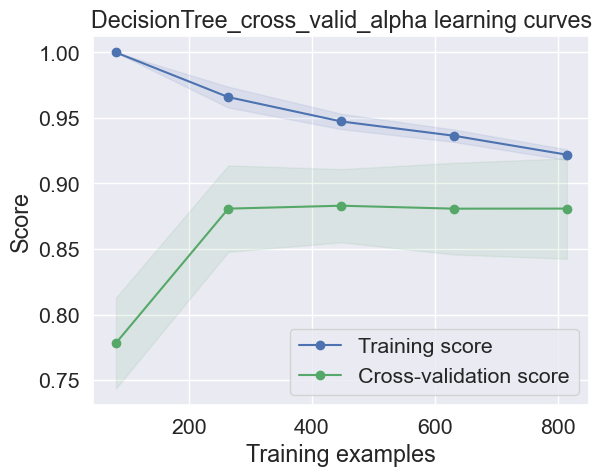

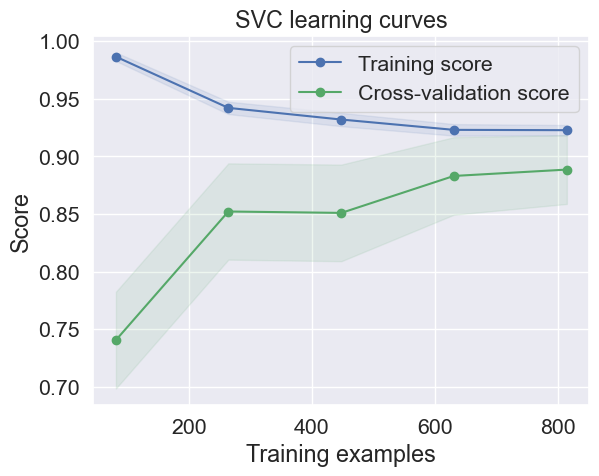

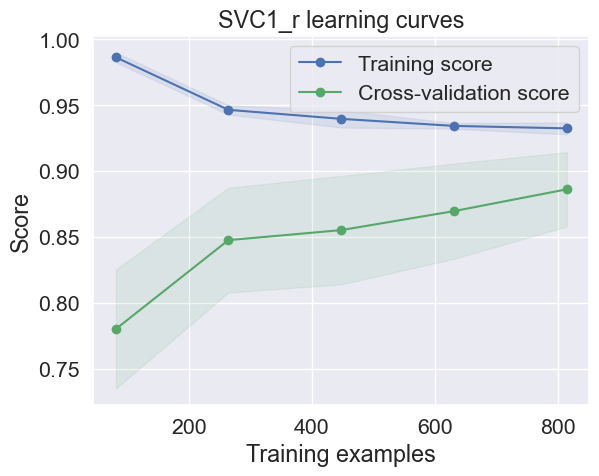

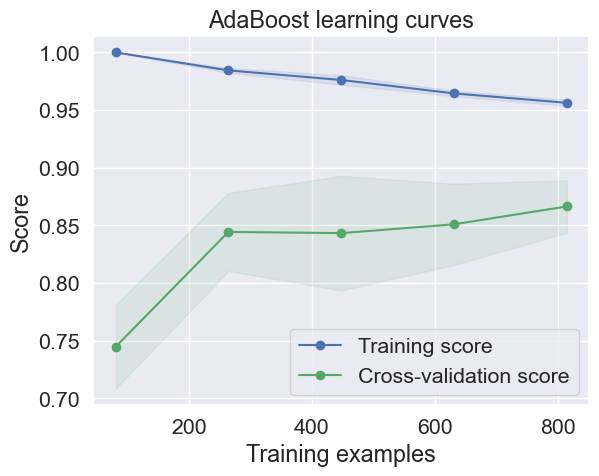

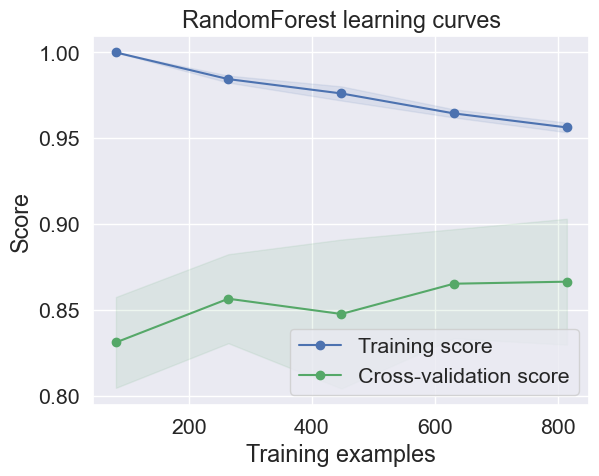

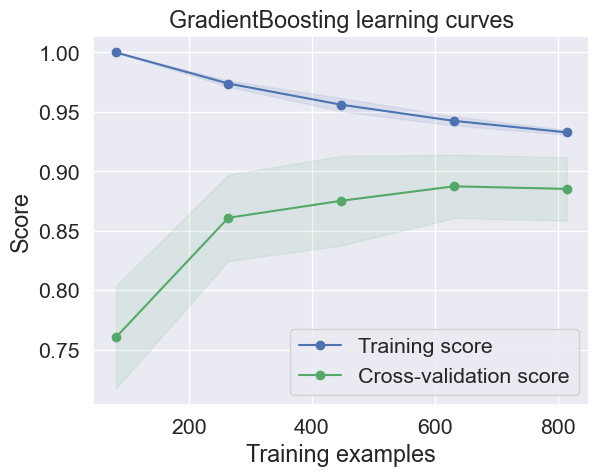

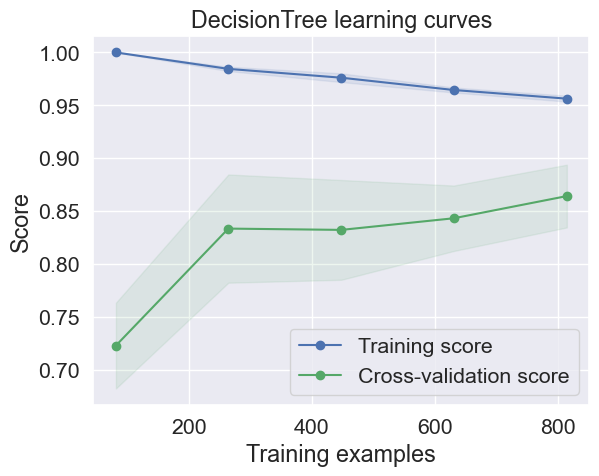

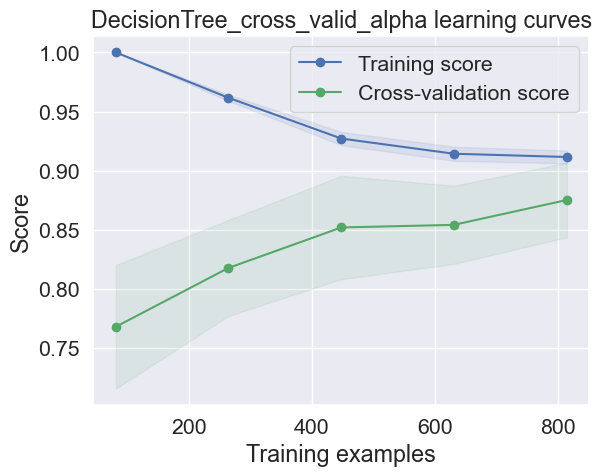

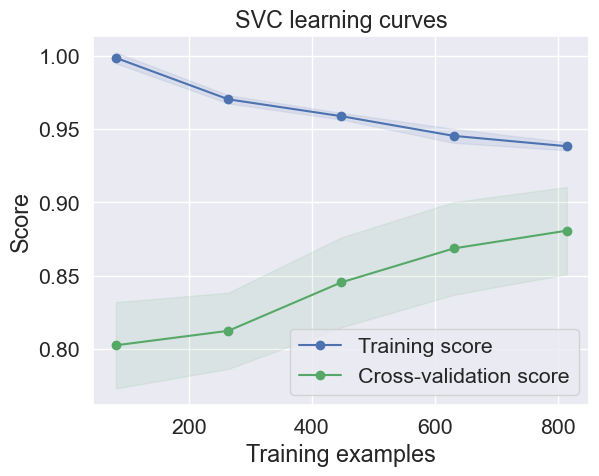

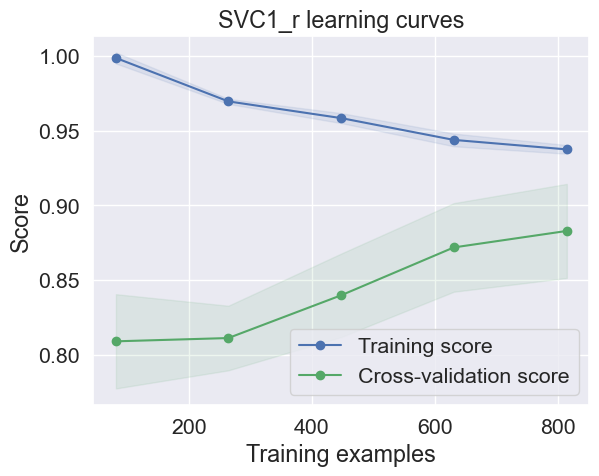

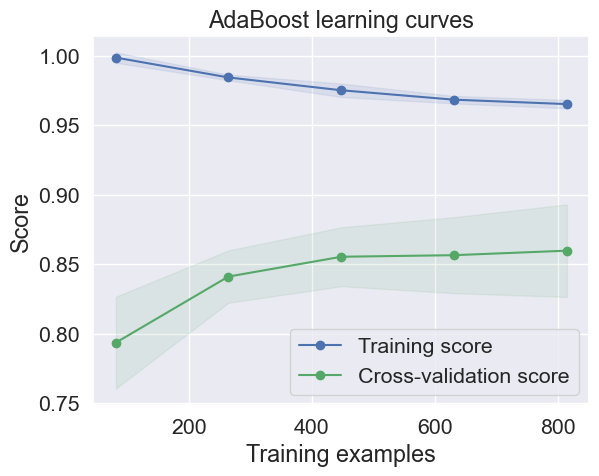

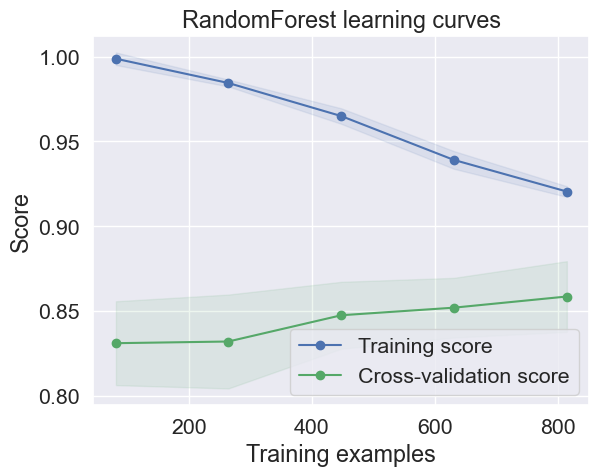

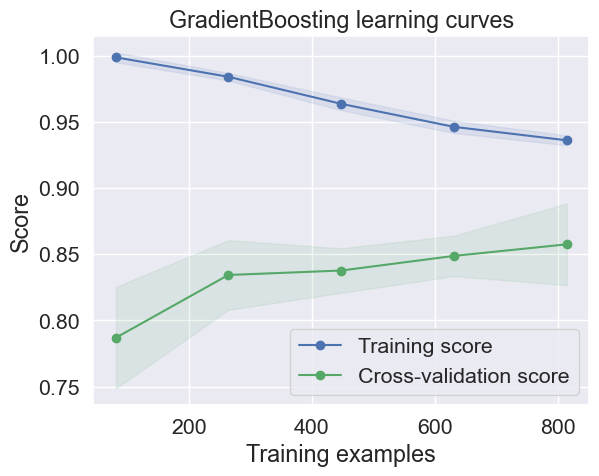

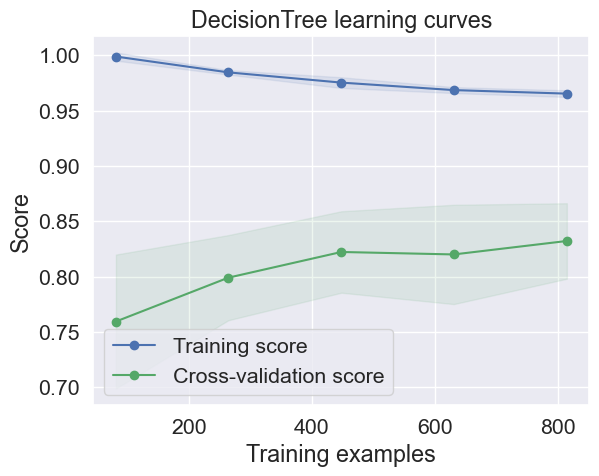

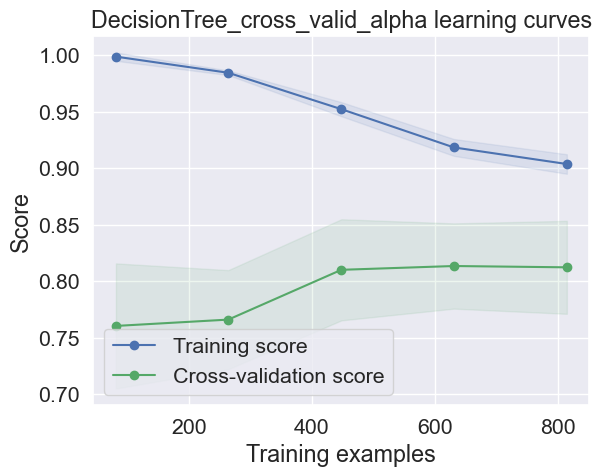

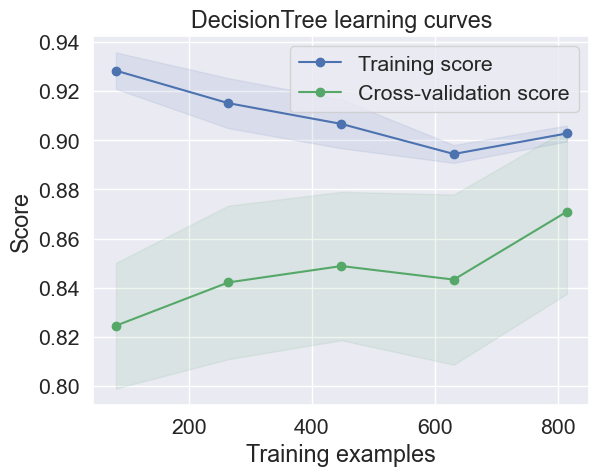

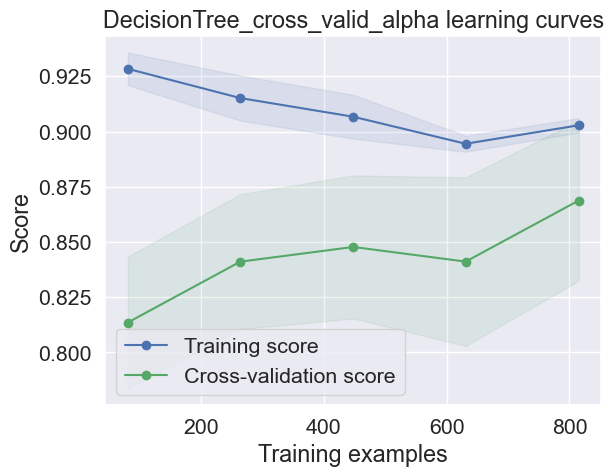

In [47]:
def plot_learning_curve(estimator, title, X, y, save, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig(save, dpi=300, bbox_inches='tight')
    return plt
def plot_l(c,X_train, X_test, y_train, y_test):
    
    for k in c.keys():
             g = plot_learning_curve(c[k][0],k+" learning curves",X_train,y_train,cv=kfold, save = k+'LearningPlot')
             g.show();

                
                
plot_l(c,X_train_for_corr, X_test_for_corr, y_train_for_corr, y_test_for_corr)
plot_l(cc,X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr)
plot_l(ccc,X_train_pca, X_test_pca, y_train_pca, y_test_pca)
plot_l(cccc,X_train_SFM, X_test_SFM, y_train_SFM, y_test_SFM)

In [48]:
def confusion_matrix_(y_t, y_p):
    data = confusion_matrix(y_t, y_p)#,normalize='pred')#true
    df_cm = pd.DataFrame(data, columns=np.unique(y_t), index = np.unique(y_t))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
    plt.title("Confusion Matrix Heat Map\n")
    plt.savefig('ConfusionMatrix', dpi=300, bbox_inches='tight')
    return plt

df dataset
SVC SVC(C=100, coef0=-2, kernel='sigmoid')
Train


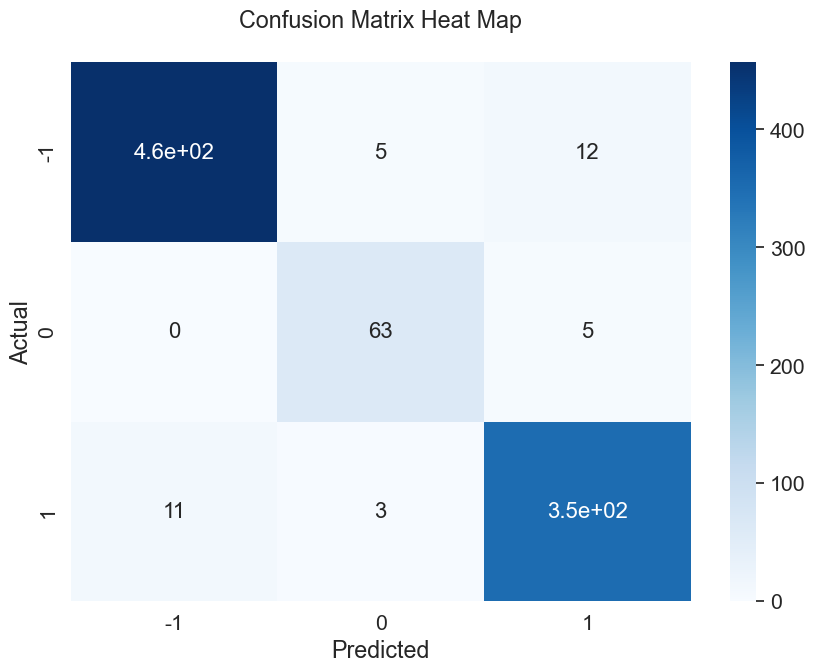

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       474
           0       0.89      0.93      0.91        68
           1       0.95      0.96      0.96       364

    accuracy                           0.96       906
   macro avg       0.94      0.95      0.94       906
weighted avg       0.96      0.96      0.96       906

Test


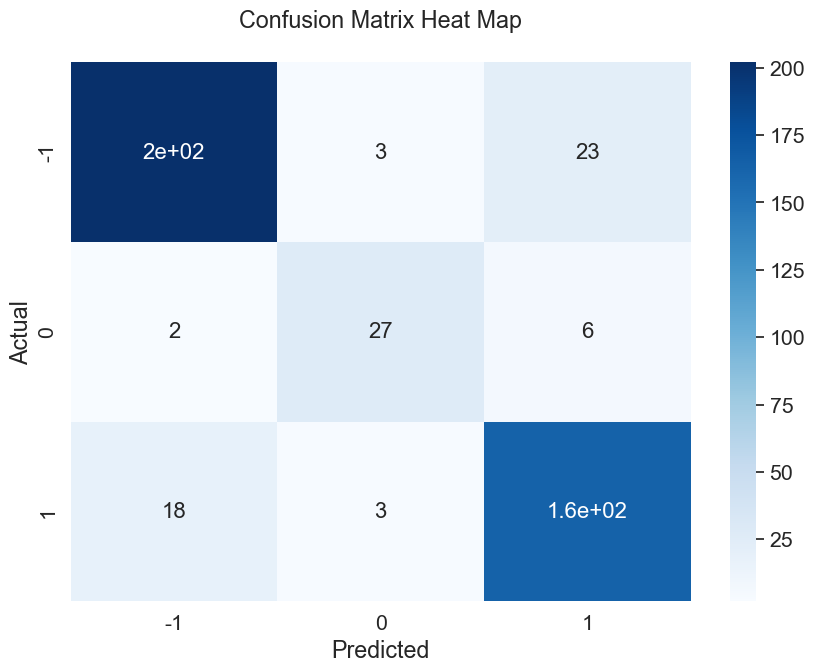

              precision    recall  f1-score   support

          -1       0.91      0.89      0.90       228
           0       0.82      0.77      0.79        35
           1       0.85      0.89      0.87       184

    accuracy                           0.88       447
   macro avg       0.86      0.85      0.85       447
weighted avg       0.88      0.88      0.88       447

SVC1_r OneVsRestClassifier(estimator=SVC(C=100, coef0=-2, kernel='sigmoid'))
Train


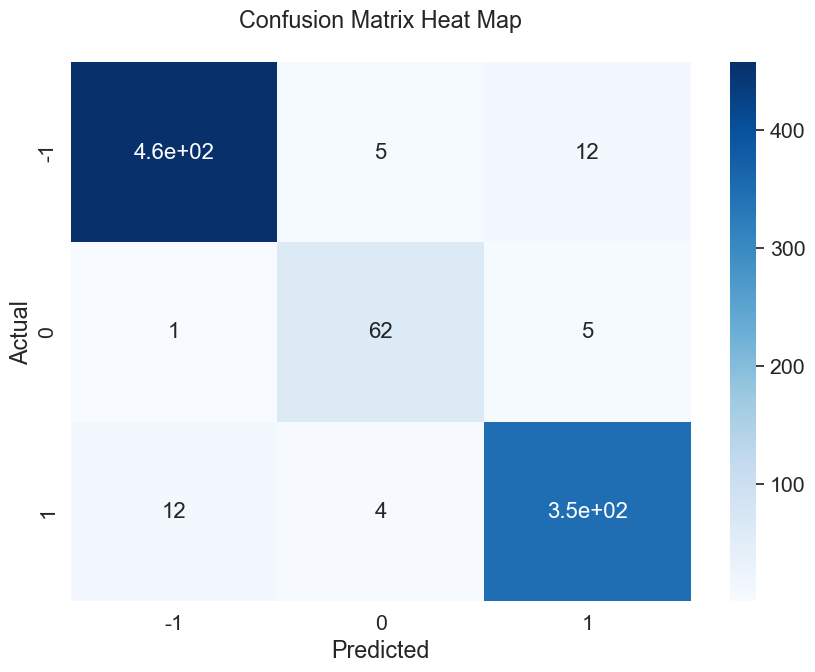

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       474
           0       0.87      0.91      0.89        68
           1       0.95      0.96      0.95       364

    accuracy                           0.96       906
   macro avg       0.93      0.94      0.94       906
weighted avg       0.96      0.96      0.96       906

Test


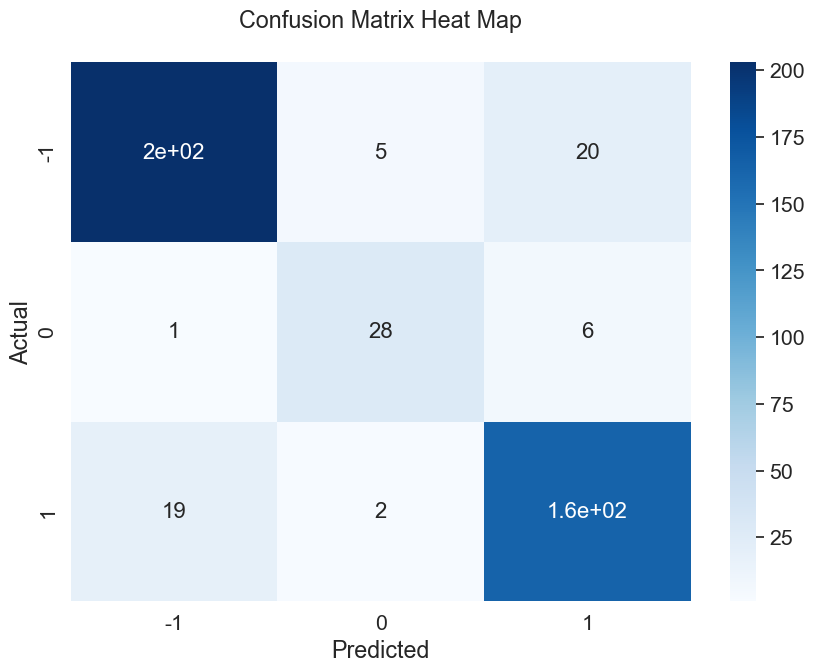

              precision    recall  f1-score   support

          -1       0.91      0.89      0.90       228
           0       0.80      0.80      0.80        35
           1       0.86      0.89      0.87       184

    accuracy                           0.88       447
   macro avg       0.86      0.86      0.86       447
weighted avg       0.88      0.88      0.88       447

AdaBoost AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    splitter='random'),
                   learning_rate=0.3, n_estimators=10)
Train


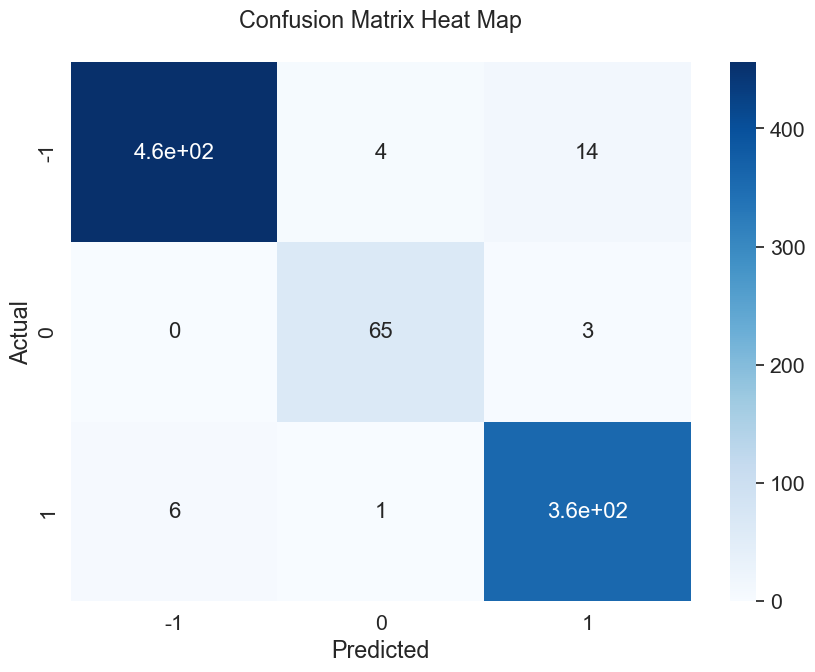

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       474
           0       0.93      0.96      0.94        68
           1       0.95      0.98      0.97       364

    accuracy                           0.97       906
   macro avg       0.96      0.97      0.96       906
weighted avg       0.97      0.97      0.97       906

Test


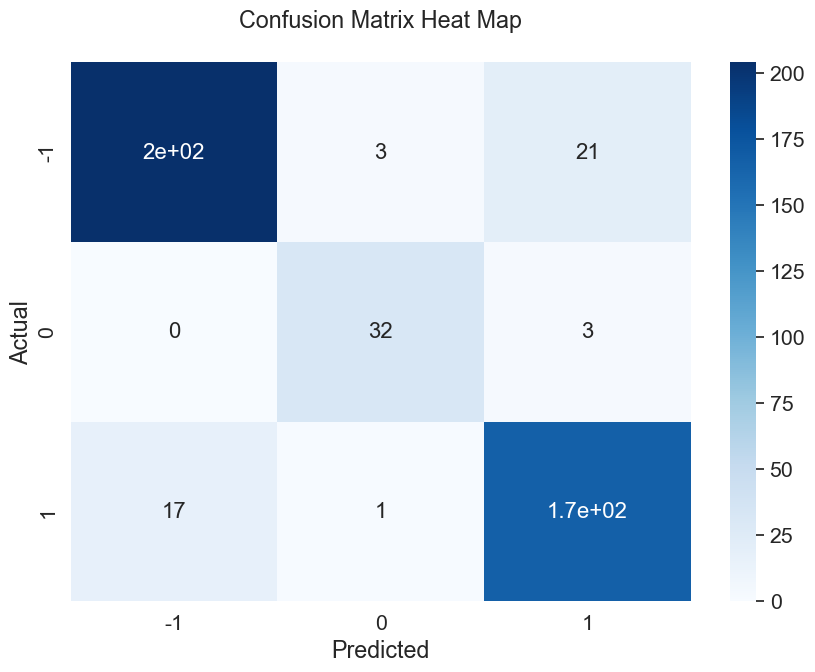

              precision    recall  f1-score   support

          -1       0.92      0.89      0.91       228
           0       0.89      0.91      0.90        35
           1       0.87      0.90      0.89       184

    accuracy                           0.90       447
   macro avg       0.90      0.90      0.90       447
weighted avg       0.90      0.90      0.90       447

RandomForest RandomForestClassifier(ccp_alpha=0.001, n_estimators=500)
Train


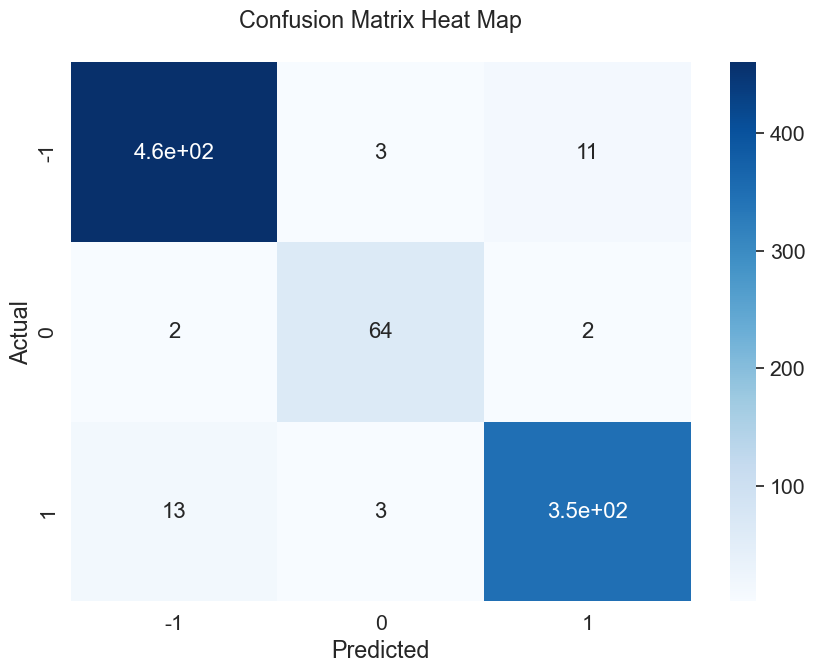

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       474
           0       0.91      0.94      0.93        68
           1       0.96      0.96      0.96       364

    accuracy                           0.96       906
   macro avg       0.95      0.96      0.95       906
weighted avg       0.96      0.96      0.96       906

Test


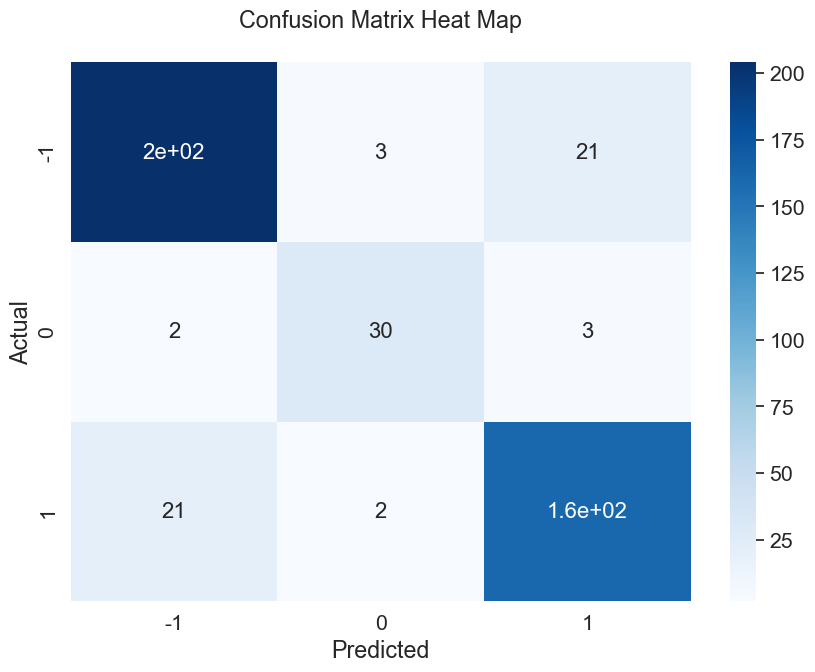

              precision    recall  f1-score   support

          -1       0.90      0.89      0.90       228
           0       0.86      0.86      0.86        35
           1       0.87      0.88      0.87       184

    accuracy                           0.88       447
   macro avg       0.88      0.88      0.88       447
weighted avg       0.88      0.88      0.88       447

GradientBoosting GradientBoostingClassifier(n_estimators=150)
Train


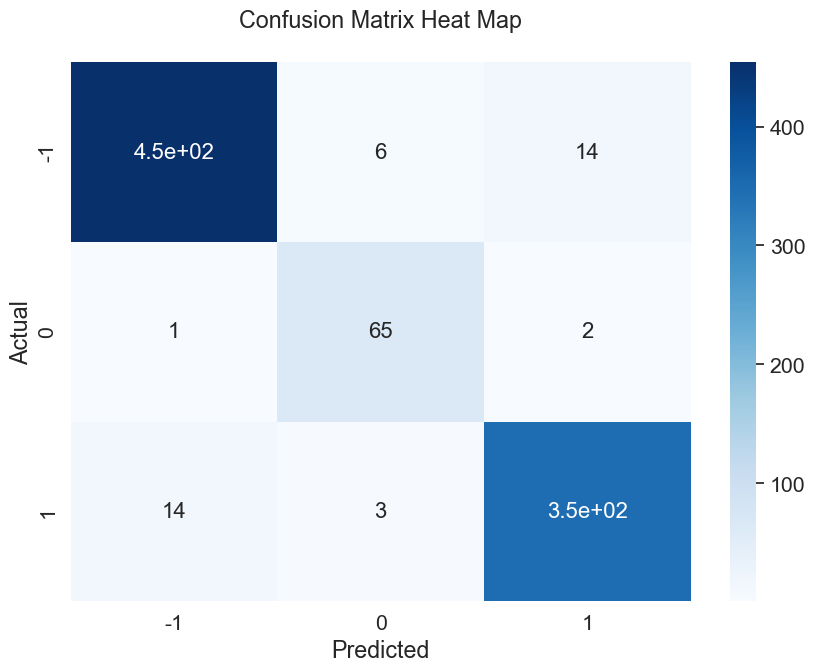

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       474
           0       0.88      0.96      0.92        68
           1       0.96      0.95      0.95       364

    accuracy                           0.96       906
   macro avg       0.93      0.96      0.94       906
weighted avg       0.96      0.96      0.96       906

Test


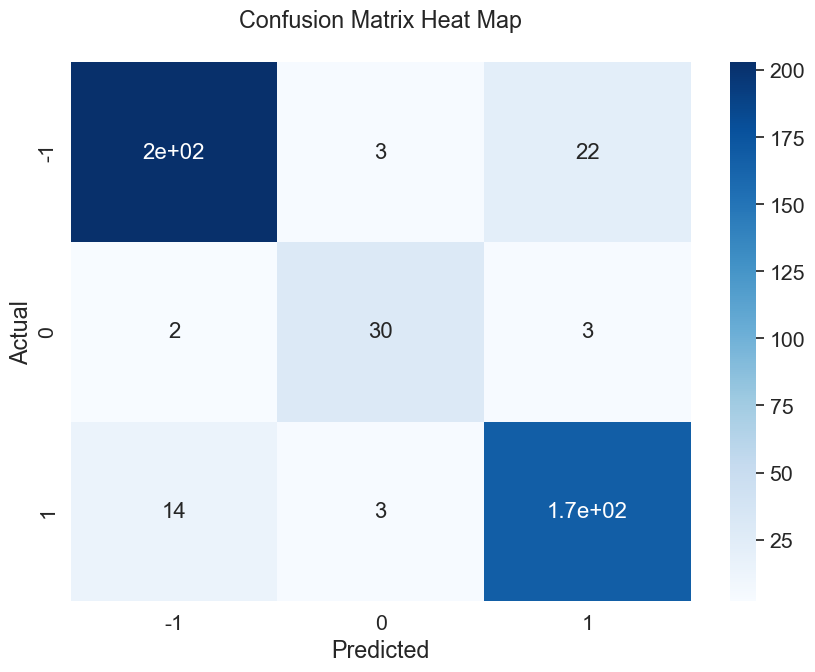

              precision    recall  f1-score   support

          -1       0.93      0.89      0.91       228
           0       0.83      0.86      0.85        35
           1       0.87      0.91      0.89       184

    accuracy                           0.89       447
   macro avg       0.88      0.89      0.88       447
weighted avg       0.90      0.89      0.90       447

DecisionTree DecisionTreeClassifier(criterion='entropy')
Train


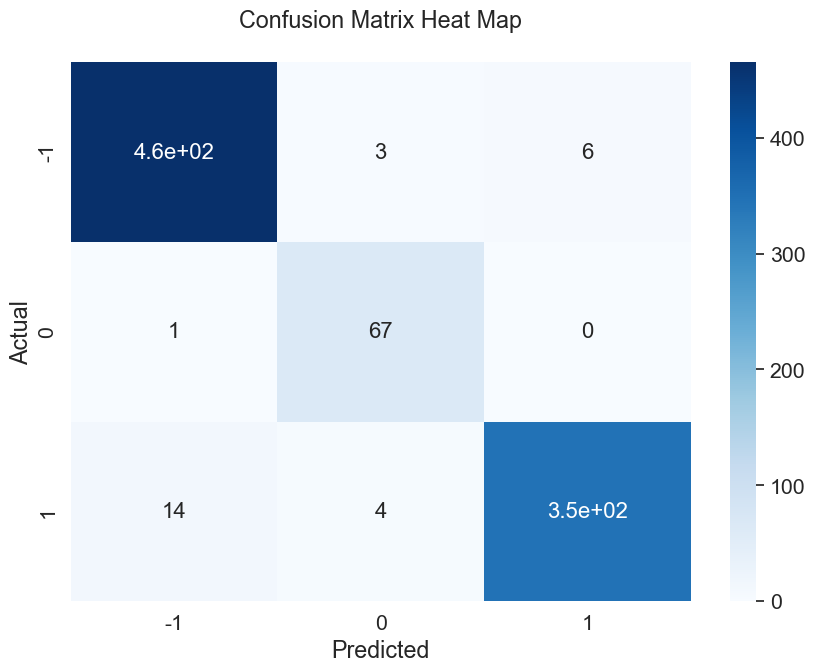

              precision    recall  f1-score   support

          -1       0.97      0.98      0.97       474
           0       0.91      0.99      0.94        68
           1       0.98      0.95      0.97       364

    accuracy                           0.97       906
   macro avg       0.95      0.97      0.96       906
weighted avg       0.97      0.97      0.97       906

Test


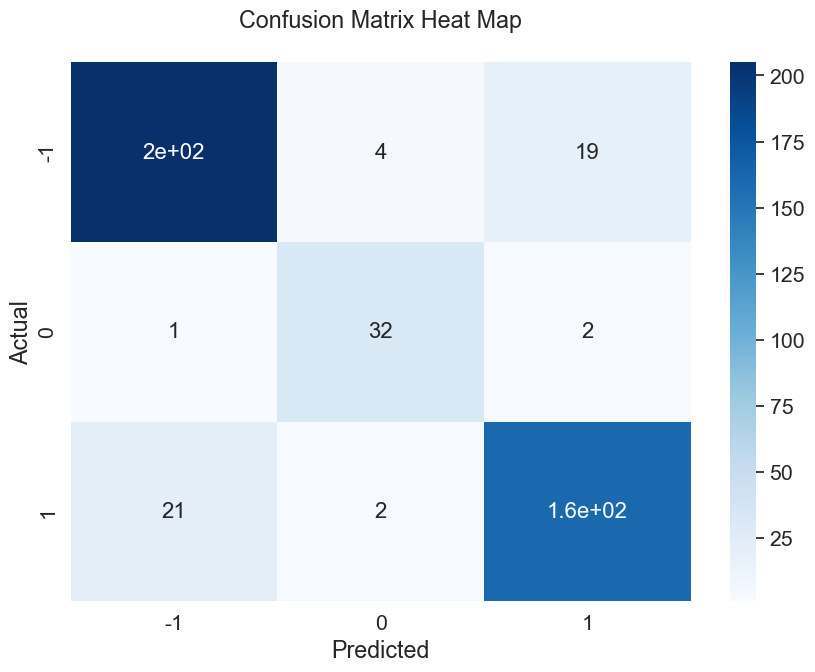

              precision    recall  f1-score   support

          -1       0.90      0.90      0.90       228
           0       0.84      0.91      0.88        35
           1       0.88      0.88      0.88       184

    accuracy                           0.89       447
   macro avg       0.88      0.90      0.89       447
weighted avg       0.89      0.89      0.89       447

DecisionTree_cross_valid_alpha DecisionTreeClassifier(ccp_alpha=0.003)
Train


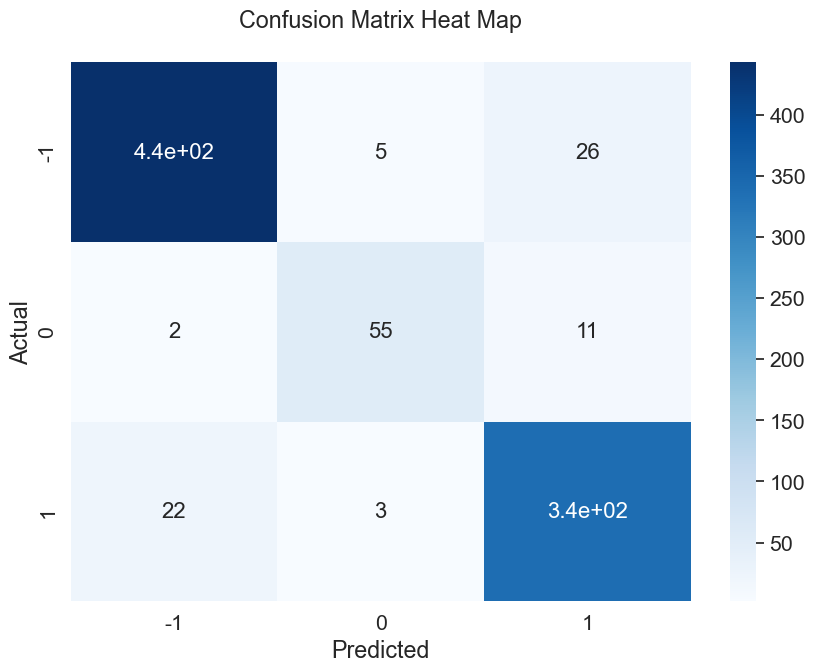

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       474
           0       0.87      0.81      0.84        68
           1       0.90      0.93      0.92       364

    accuracy                           0.92       906
   macro avg       0.91      0.89      0.90       906
weighted avg       0.92      0.92      0.92       906

Test


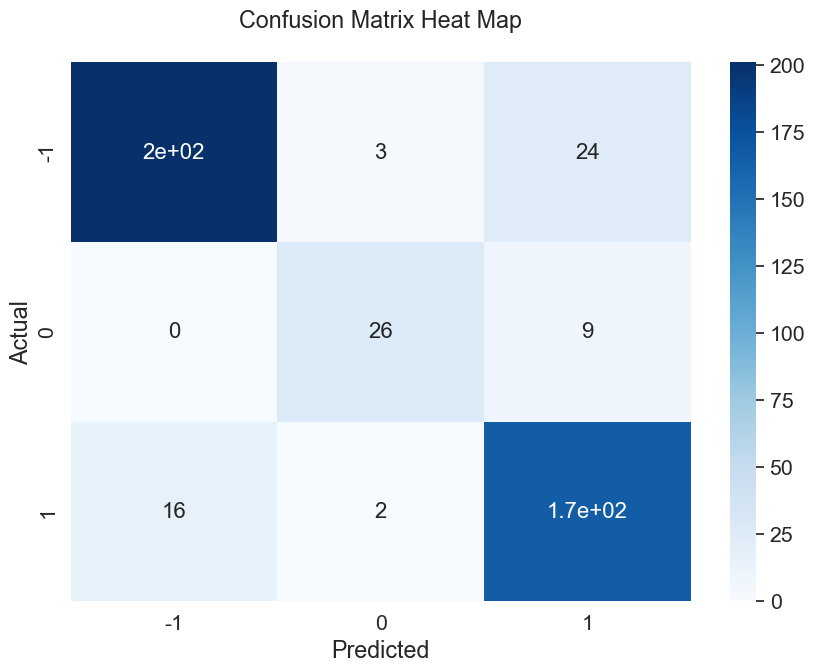

              precision    recall  f1-score   support

          -1       0.93      0.88      0.90       228
           0       0.84      0.74      0.79        35
           1       0.83      0.90      0.87       184

    accuracy                           0.88       447
   macro avg       0.87      0.84      0.85       447
weighted avg       0.88      0.88      0.88       447

df_no_strong_corr dataset
SVC SVC(C=100, coef0=-1, gamma=0.1, kernel='sigmoid')
Train


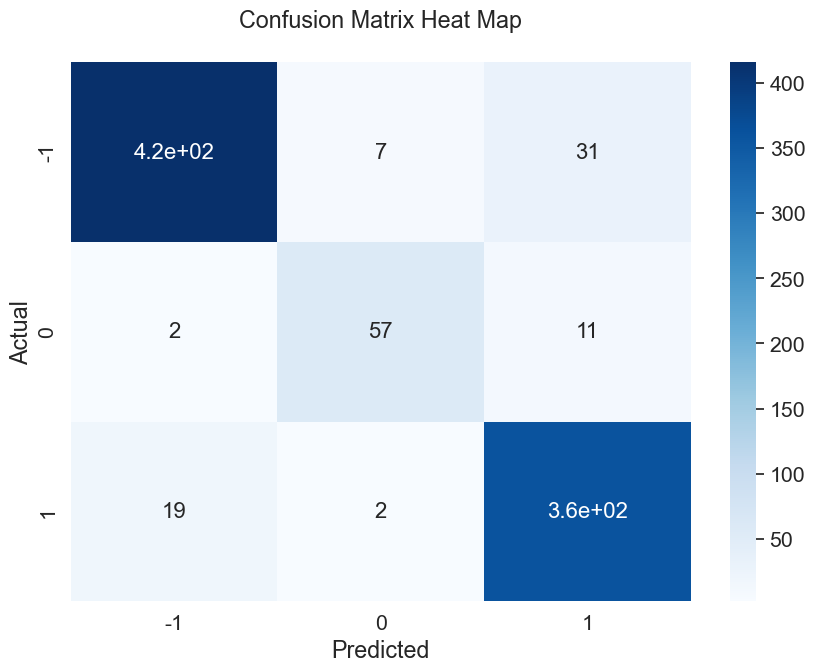

              precision    recall  f1-score   support

          -1       0.95      0.92      0.93       454
           0       0.86      0.81      0.84        70
           1       0.90      0.95      0.92       382

    accuracy                           0.92       906
   macro avg       0.90      0.89      0.90       906
weighted avg       0.92      0.92      0.92       906

Test


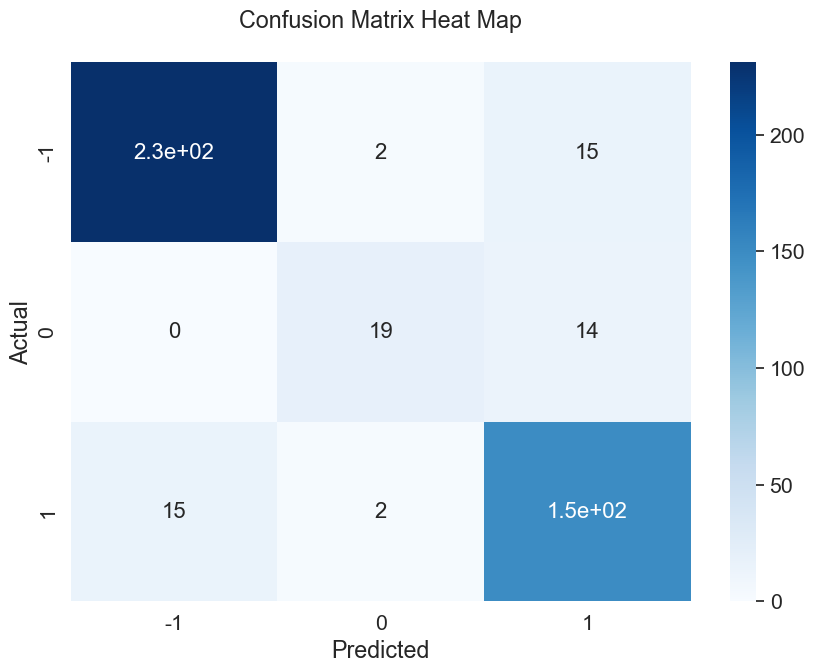

              precision    recall  f1-score   support

          -1       0.94      0.93      0.94       248
           0       0.83      0.58      0.68        33
           1       0.84      0.90      0.87       166

    accuracy                           0.89       447
   macro avg       0.87      0.80      0.83       447
weighted avg       0.89      0.89      0.89       447

SVC1_r OneVsRestClassifier(estimator=SVC(C=10.0, coef0=-2, gamma='auto'))
Train


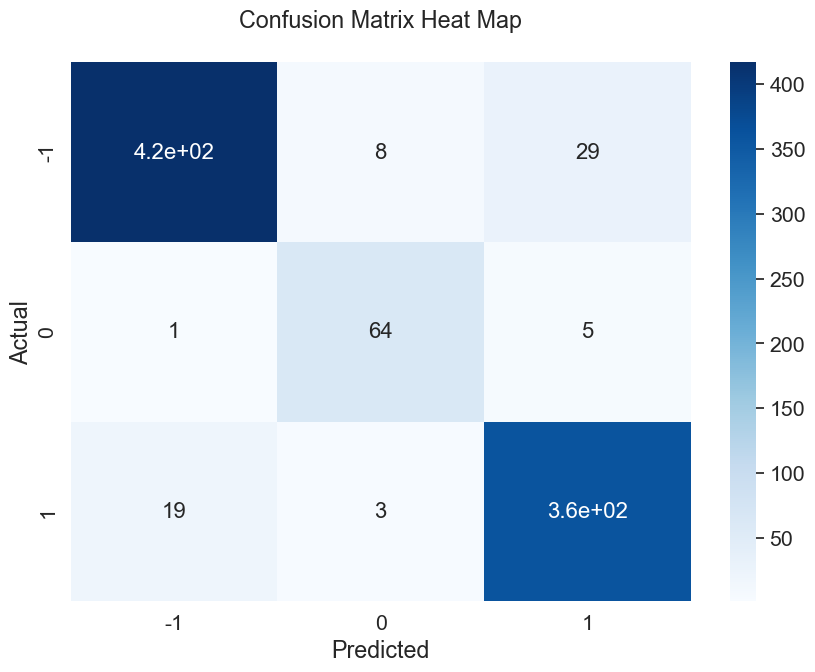

              precision    recall  f1-score   support

          -1       0.95      0.92      0.94       454
           0       0.85      0.91      0.88        70
           1       0.91      0.94      0.93       382

    accuracy                           0.93       906
   macro avg       0.91      0.93      0.92       906
weighted avg       0.93      0.93      0.93       906

Test


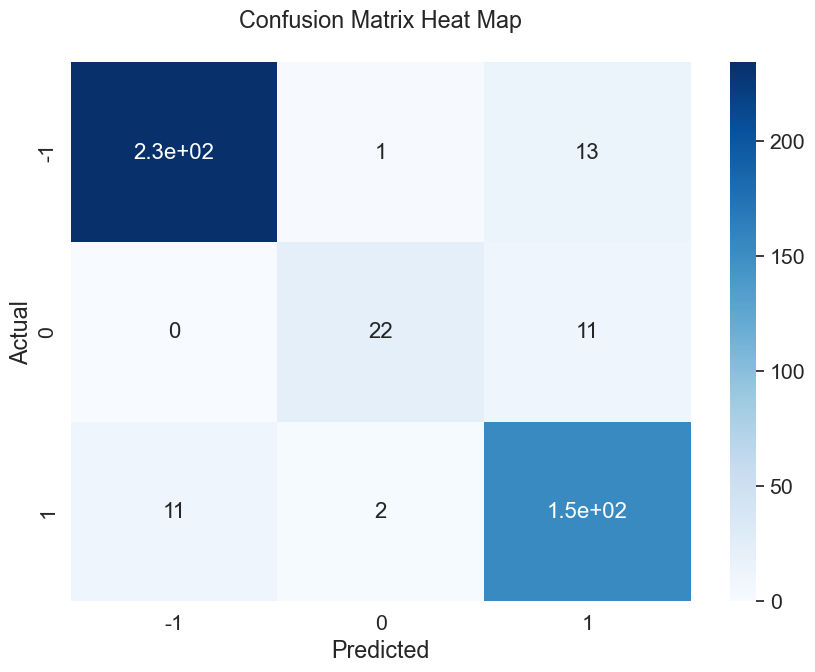

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       248
           0       0.88      0.67      0.76        33
           1       0.86      0.92      0.89       166

    accuracy                           0.91       447
   macro avg       0.90      0.84      0.87       447
weighted avg       0.92      0.91      0.91       447

AdaBoost AdaBoostClassifier(estimator=DecisionTreeClassifier(splitter='random'),
                   learning_rate=1.5, n_estimators=10)
Train


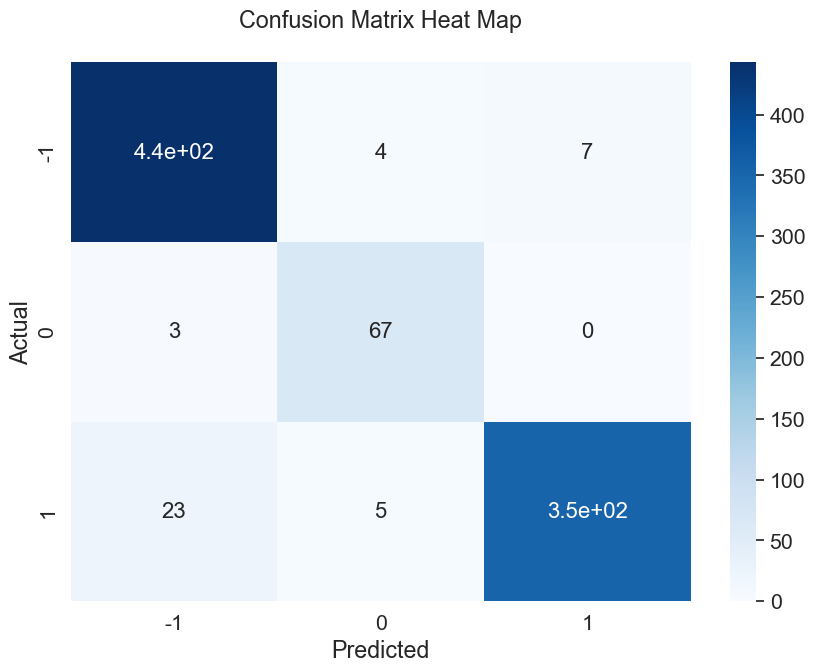

              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       454
           0       0.88      0.96      0.92        70
           1       0.98      0.93      0.95       382

    accuracy                           0.95       906
   macro avg       0.94      0.95      0.94       906
weighted avg       0.95      0.95      0.95       906

Test


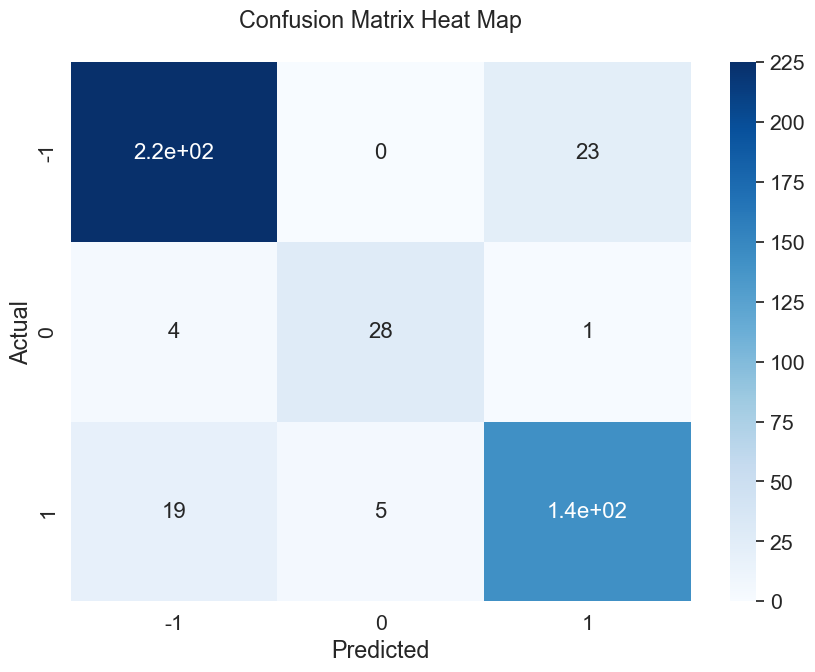

              precision    recall  f1-score   support

          -1       0.91      0.91      0.91       248
           0       0.85      0.85      0.85        33
           1       0.86      0.86      0.86       166

    accuracy                           0.88       447
   macro avg       0.87      0.87      0.87       447
weighted avg       0.88      0.88      0.88       447

RandomForest RandomForestClassifier(ccp_alpha=0)
Train


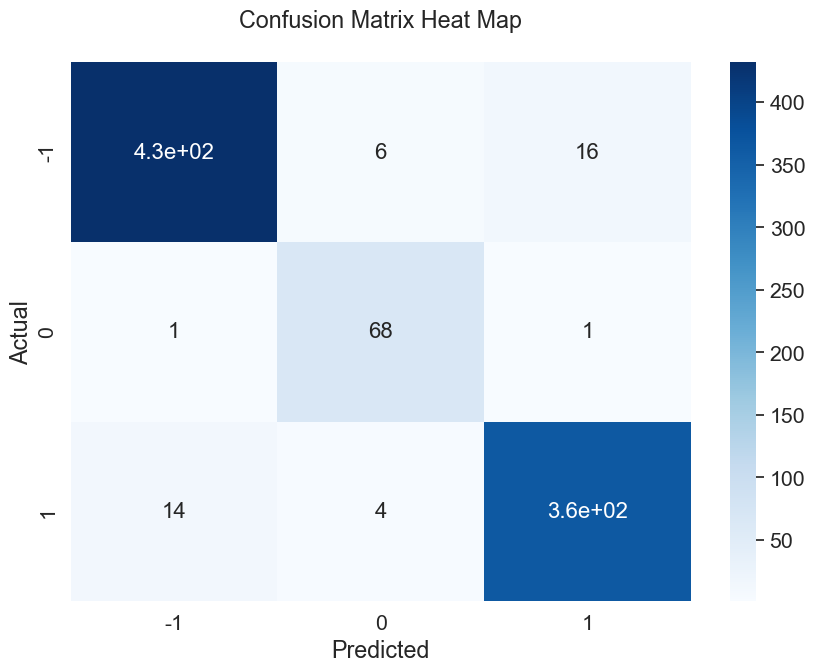

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       454
           0       0.87      0.97      0.92        70
           1       0.96      0.95      0.95       382

    accuracy                           0.95       906
   macro avg       0.93      0.96      0.94       906
weighted avg       0.95      0.95      0.95       906

Test


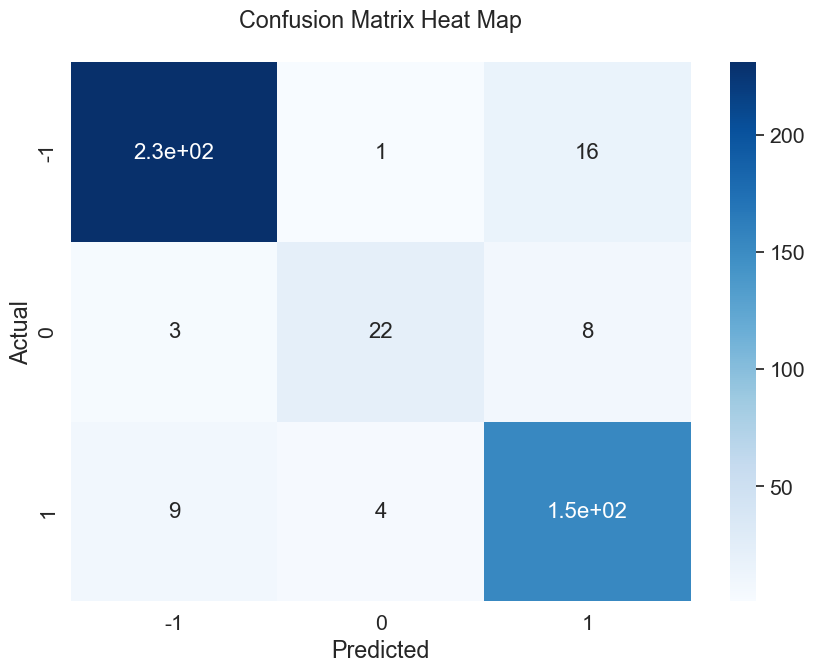

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       248
           0       0.81      0.67      0.73        33
           1       0.86      0.92      0.89       166

    accuracy                           0.91       447
   macro avg       0.88      0.84      0.86       447
weighted avg       0.91      0.91      0.91       447

GradientBoosting GradientBoostingClassifier(learning_rate=0.2, n_estimators=50)
Train


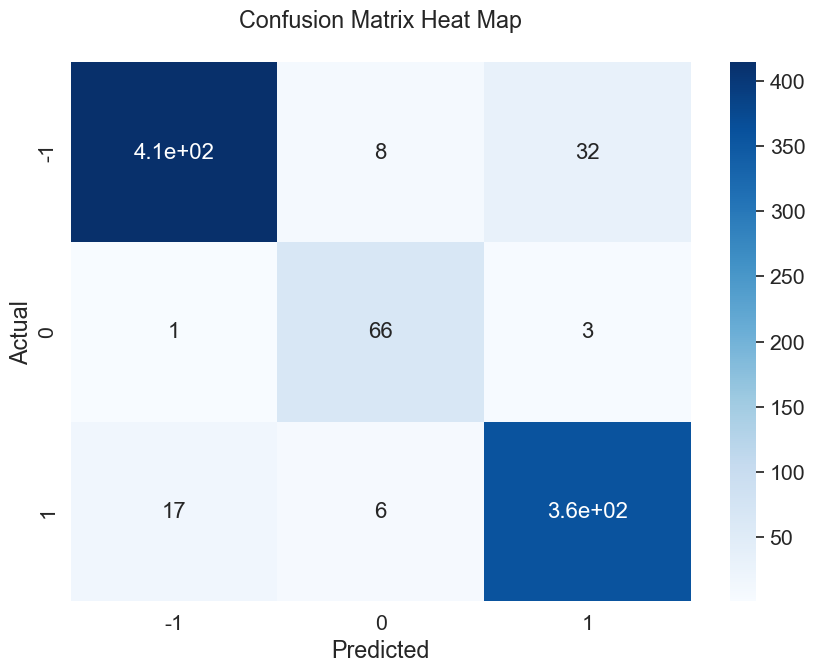

              precision    recall  f1-score   support

          -1       0.96      0.91      0.93       454
           0       0.82      0.94      0.88        70
           1       0.91      0.94      0.93       382

    accuracy                           0.93       906
   macro avg       0.90      0.93      0.91       906
weighted avg       0.93      0.93      0.93       906

Test


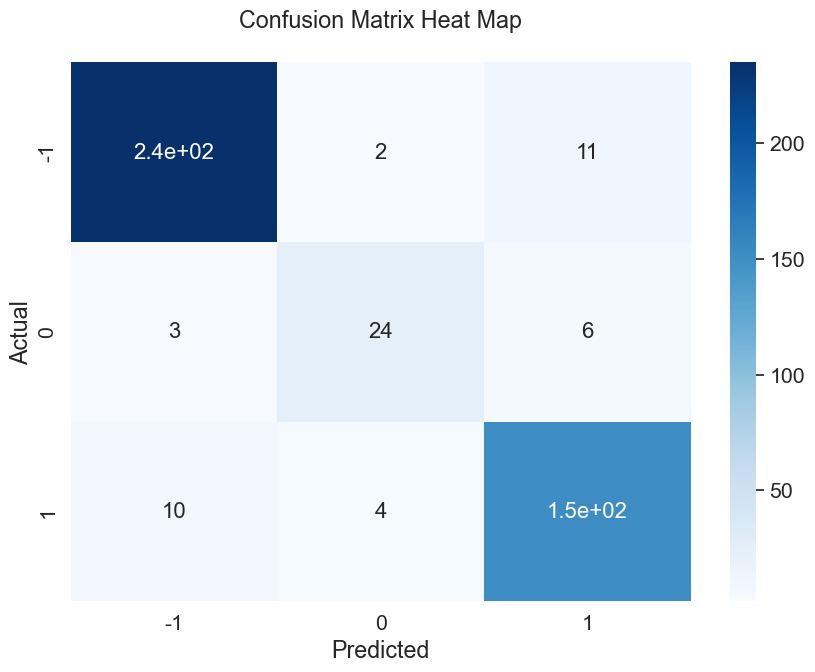

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       248
           0       0.80      0.73      0.76        33
           1       0.90      0.92      0.91       166

    accuracy                           0.92       447
   macro avg       0.88      0.86      0.87       447
weighted avg       0.92      0.92      0.92       447

DecisionTree DecisionTreeClassifier(criterion='entropy')
Train


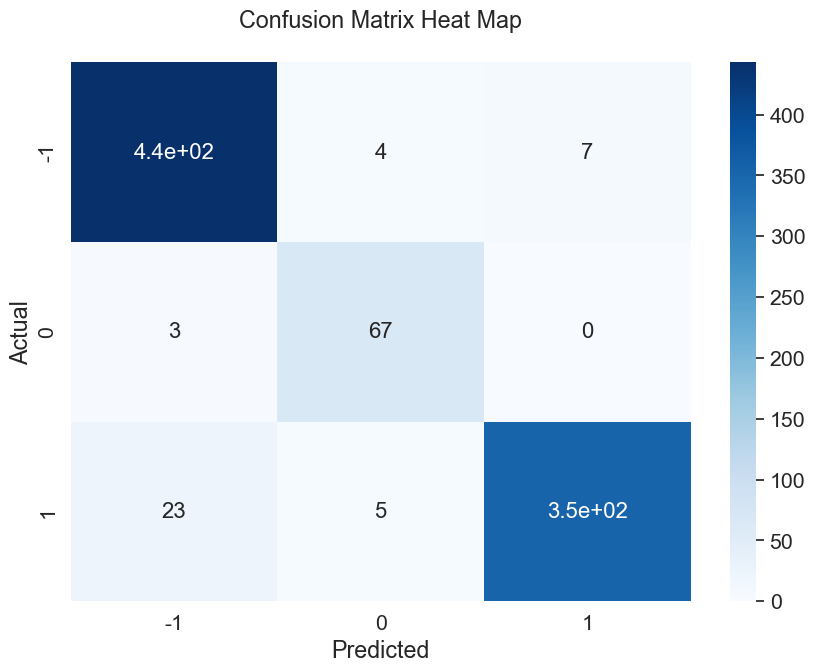

              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       454
           0       0.88      0.96      0.92        70
           1       0.98      0.93      0.95       382

    accuracy                           0.95       906
   macro avg       0.94      0.95      0.94       906
weighted avg       0.95      0.95      0.95       906

Test


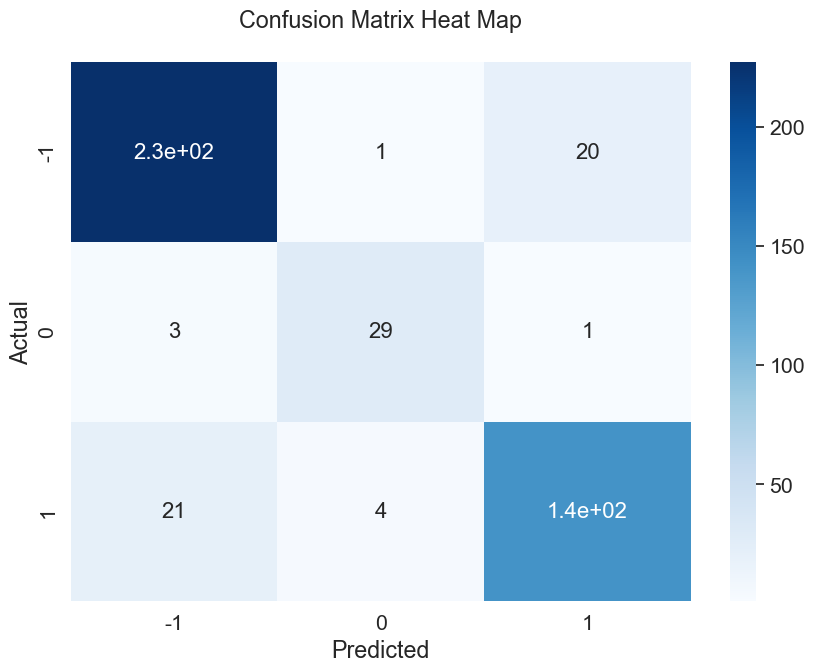

              precision    recall  f1-score   support

          -1       0.90      0.92      0.91       248
           0       0.85      0.88      0.87        33
           1       0.87      0.85      0.86       166

    accuracy                           0.89       447
   macro avg       0.88      0.88      0.88       447
weighted avg       0.89      0.89      0.89       447

DecisionTree_cross_valid_alpha DecisionTreeClassifier(ccp_alpha=0.003)
Train


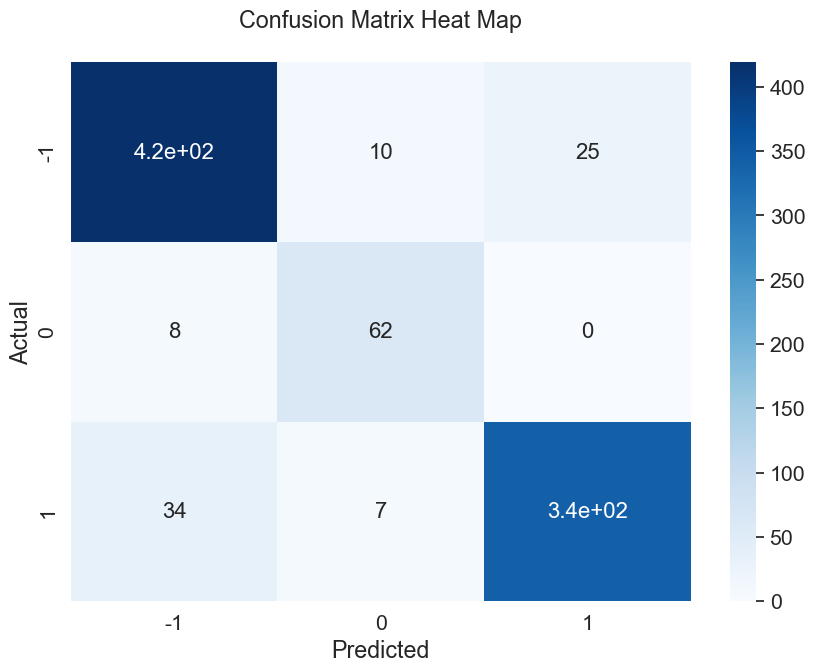

              precision    recall  f1-score   support

          -1       0.91      0.92      0.92       454
           0       0.78      0.89      0.83        70
           1       0.93      0.89      0.91       382

    accuracy                           0.91       906
   macro avg       0.88      0.90      0.89       906
weighted avg       0.91      0.91      0.91       906

Test


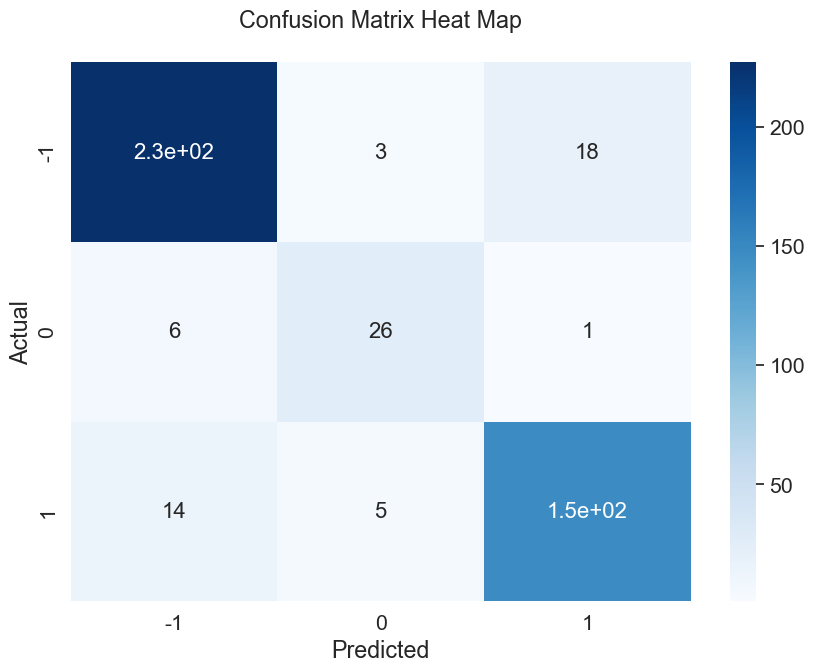

              precision    recall  f1-score   support

          -1       0.92      0.92      0.92       248
           0       0.76      0.79      0.78        33
           1       0.89      0.89      0.89       166

    accuracy                           0.89       447
   macro avg       0.86      0.86      0.86       447
weighted avg       0.90      0.89      0.90       447

df_pca dataset
SVC SVC(C=100, coef0=-2)
Train


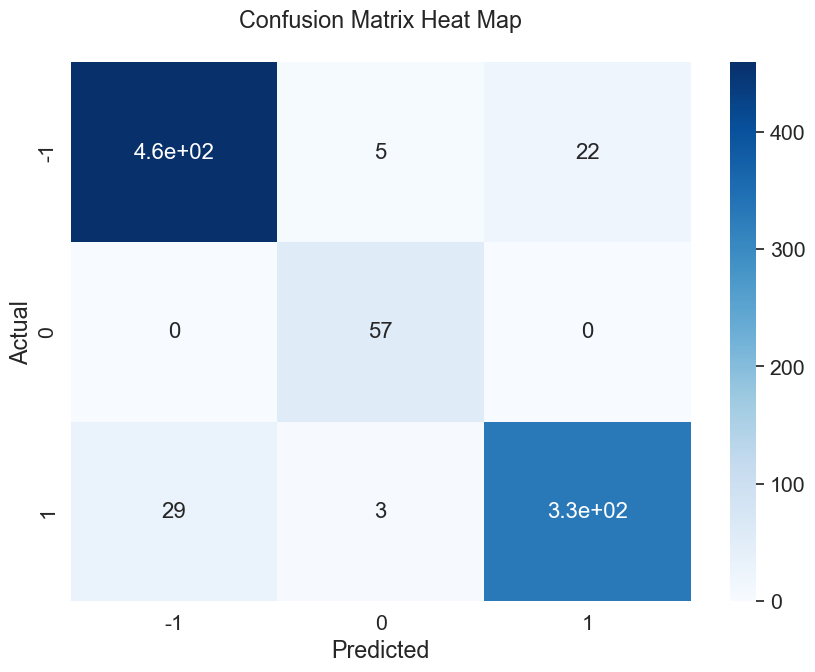

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       486
           0       0.88      1.00      0.93        57
           1       0.94      0.91      0.92       363

    accuracy                           0.93       906
   macro avg       0.92      0.95      0.93       906
weighted avg       0.94      0.93      0.93       906

Test


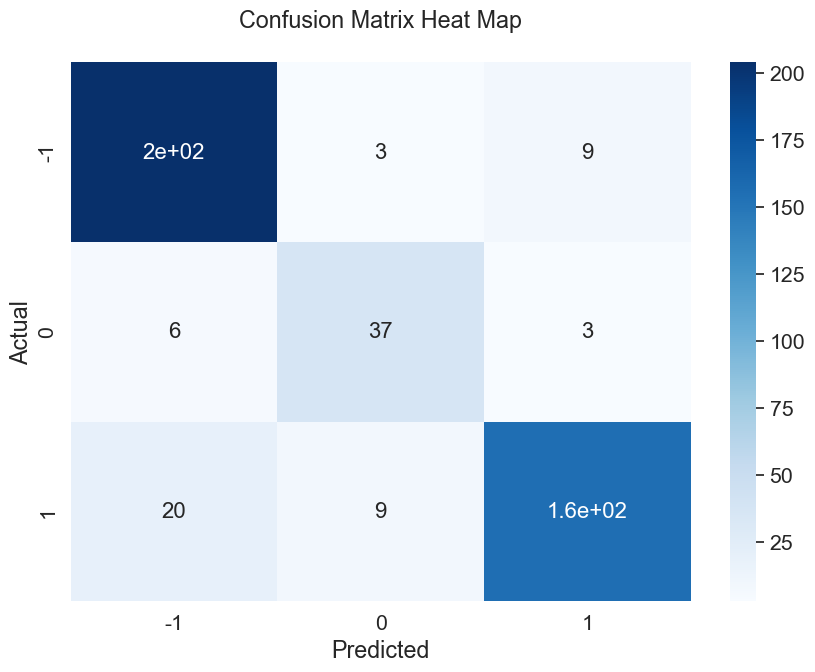

              precision    recall  f1-score   support

          -1       0.89      0.94      0.91       216
           0       0.76      0.80      0.78        46
           1       0.93      0.84      0.88       185

    accuracy                           0.89       447
   macro avg       0.86      0.86      0.86       447
weighted avg       0.89      0.89      0.89       447

SVC1_r OneVsRestClassifier(estimator=SVC(C=100, coef0=-2))
Train


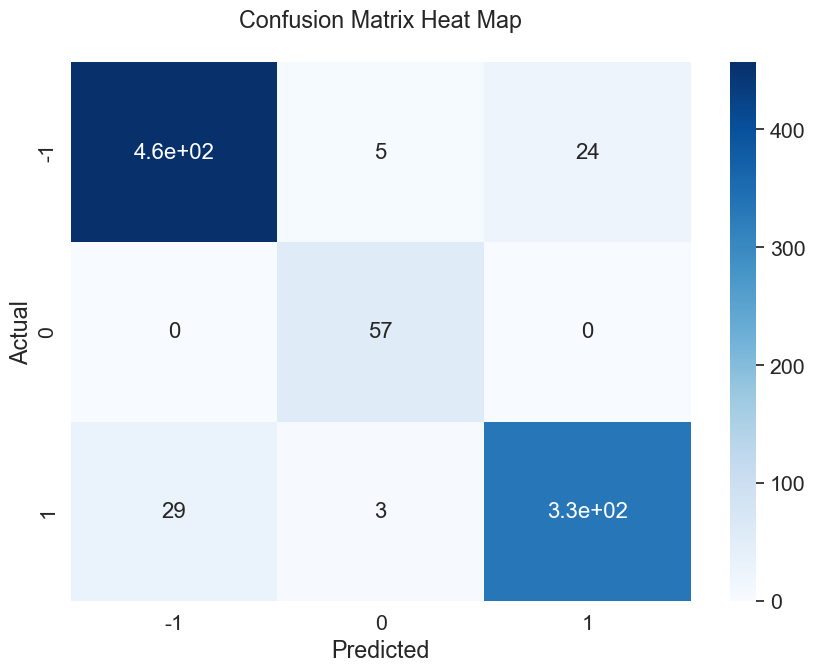

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       486
           0       0.88      1.00      0.93        57
           1       0.93      0.91      0.92       363

    accuracy                           0.93       906
   macro avg       0.92      0.95      0.93       906
weighted avg       0.93      0.93      0.93       906

Test


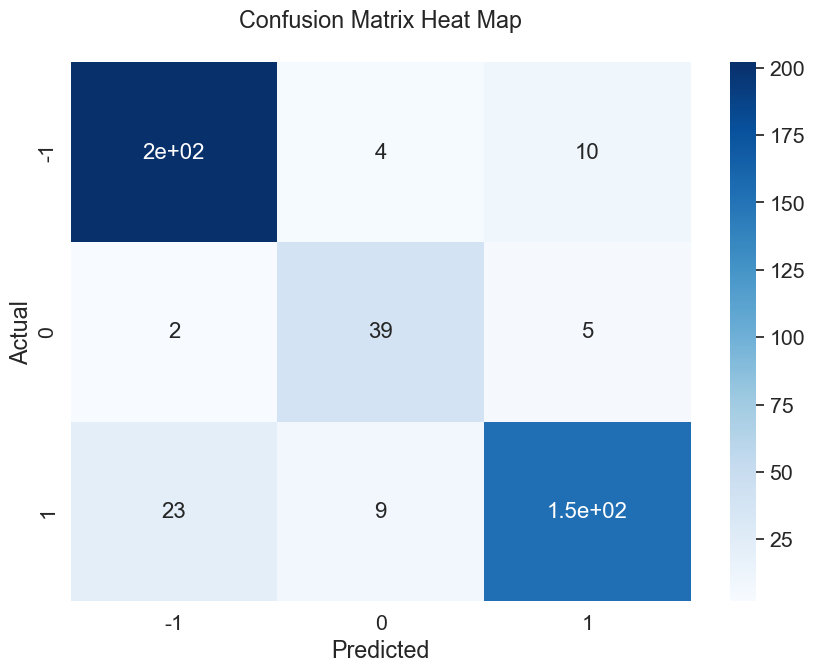

              precision    recall  f1-score   support

          -1       0.89      0.94      0.91       216
           0       0.75      0.85      0.80        46
           1       0.91      0.83      0.87       185

    accuracy                           0.88       447
   macro avg       0.85      0.87      0.86       447
weighted avg       0.88      0.88      0.88       447

AdaBoost AdaBoostClassifier(estimator=DecisionTreeClassifier(splitter='random'),
                   learning_rate=0.01, n_estimators=150)
Train


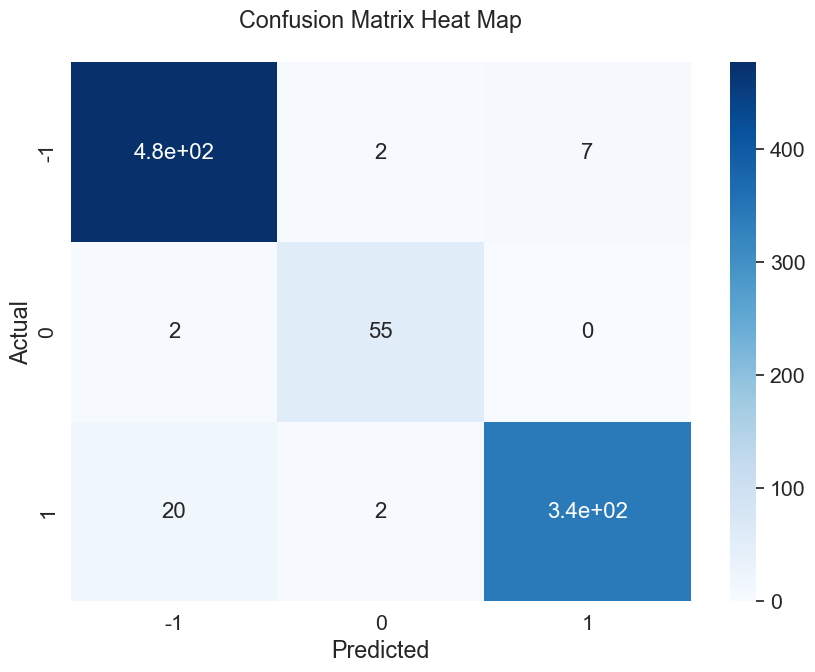

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       486
           0       0.93      0.96      0.95        57
           1       0.98      0.94      0.96       363

    accuracy                           0.96       906
   macro avg       0.96      0.96      0.96       906
weighted avg       0.96      0.96      0.96       906

Test


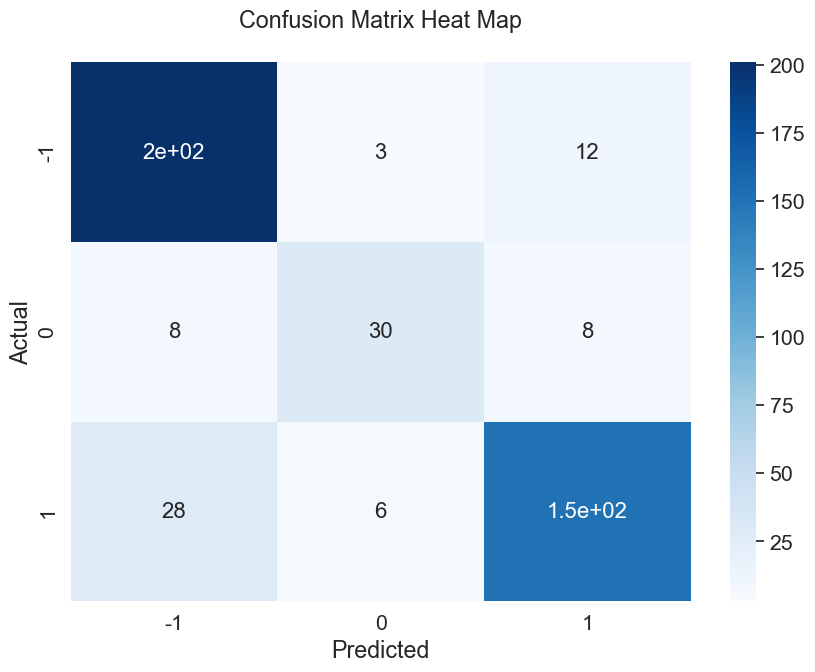

              precision    recall  f1-score   support

          -1       0.85      0.93      0.89       216
           0       0.77      0.65      0.71        46
           1       0.88      0.82      0.85       185

    accuracy                           0.85       447
   macro avg       0.83      0.80      0.81       447
weighted avg       0.85      0.85      0.85       447

RandomForest RandomForestClassifier(ccp_alpha=0.01, criterion='entropy', n_estimators=600)
Train


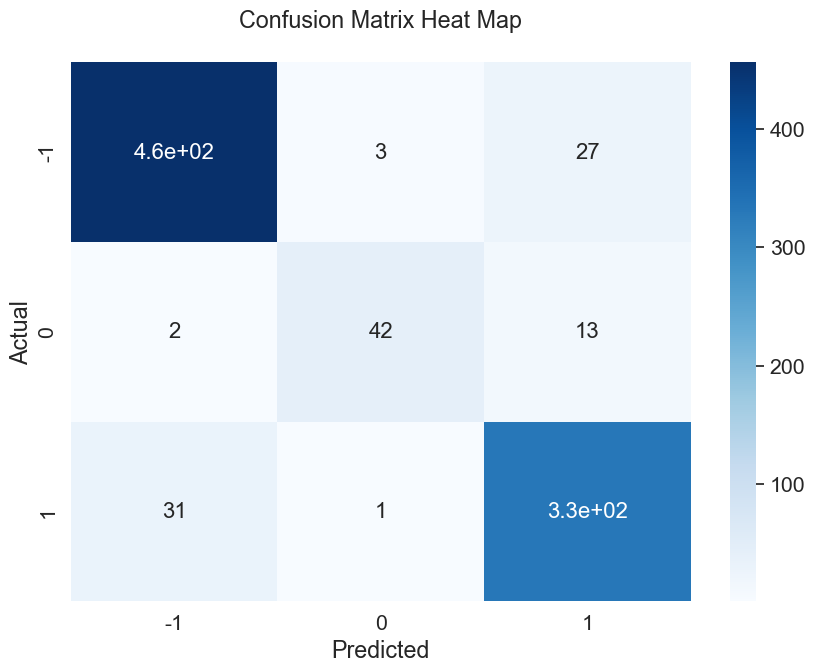

              precision    recall  f1-score   support

          -1       0.93      0.94      0.94       486
           0       0.91      0.74      0.82        57
           1       0.89      0.91      0.90       363

    accuracy                           0.92       906
   macro avg       0.91      0.86      0.88       906
weighted avg       0.92      0.92      0.91       906

Test


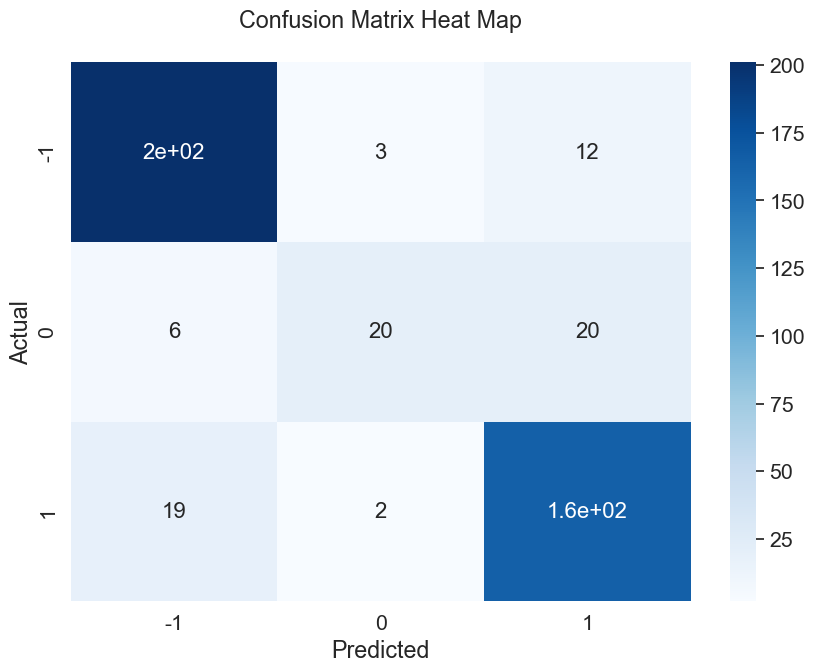

              precision    recall  f1-score   support

          -1       0.89      0.93      0.91       216
           0       0.80      0.43      0.56        46
           1       0.84      0.89      0.86       185

    accuracy                           0.86       447
   macro avg       0.84      0.75      0.78       447
weighted avg       0.86      0.86      0.85       447

GradientBoosting GradientBoostingClassifier(n_estimators=50)
Train


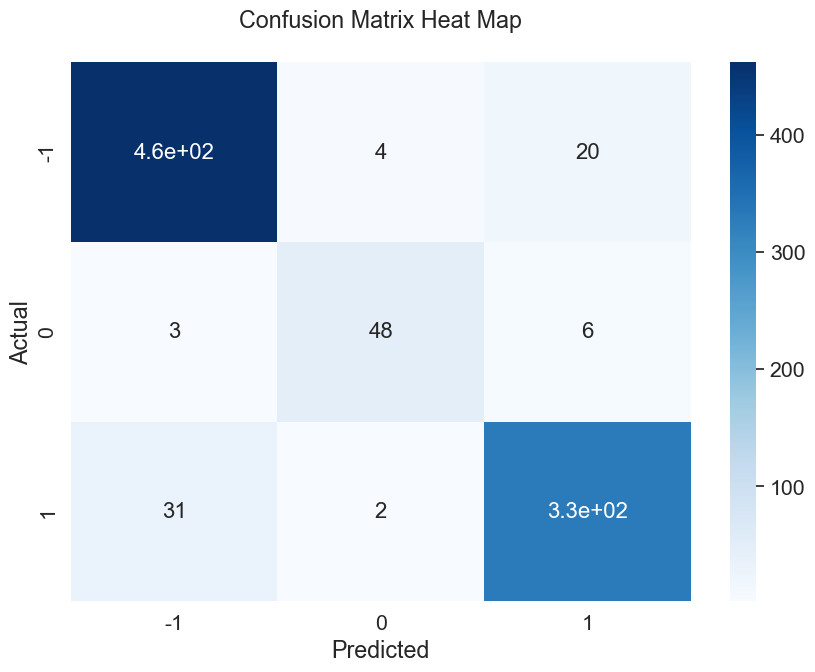

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94       486
           0       0.89      0.84      0.86        57
           1       0.93      0.91      0.92       363

    accuracy                           0.93       906
   macro avg       0.92      0.90      0.91       906
weighted avg       0.93      0.93      0.93       906

Test


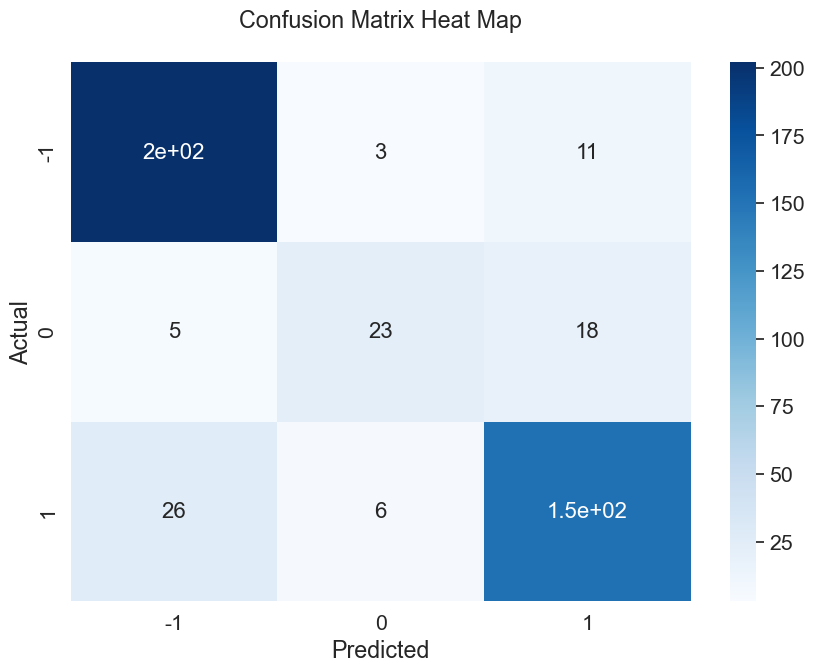

              precision    recall  f1-score   support

          -1       0.87      0.94      0.90       216
           0       0.72      0.50      0.59        46
           1       0.84      0.83      0.83       185

    accuracy                           0.85       447
   macro avg       0.81      0.75      0.77       447
weighted avg       0.84      0.85      0.84       447

DecisionTree DecisionTreeClassifier(criterion='entropy')
Train


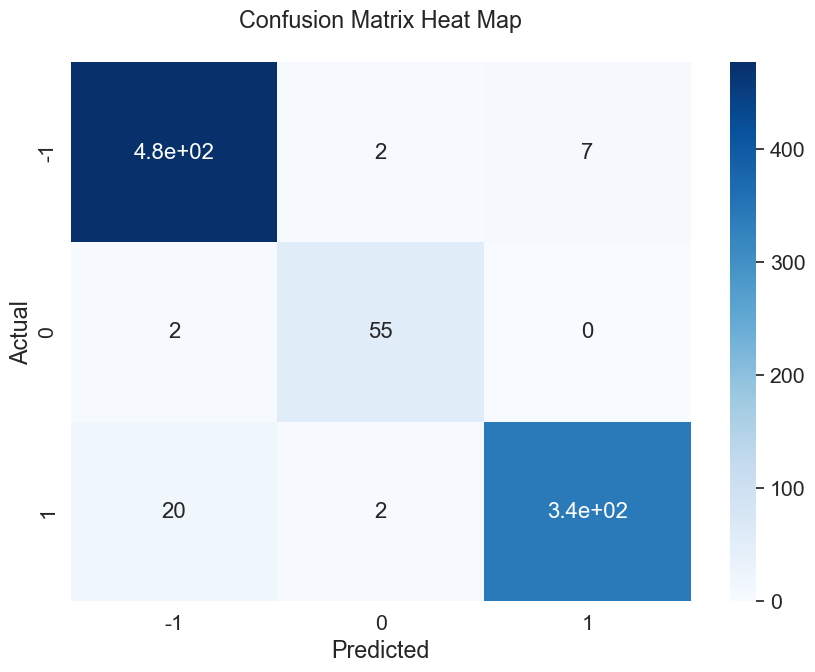

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       486
           0       0.93      0.96      0.95        57
           1       0.98      0.94      0.96       363

    accuracy                           0.96       906
   macro avg       0.96      0.96      0.96       906
weighted avg       0.96      0.96      0.96       906

Test


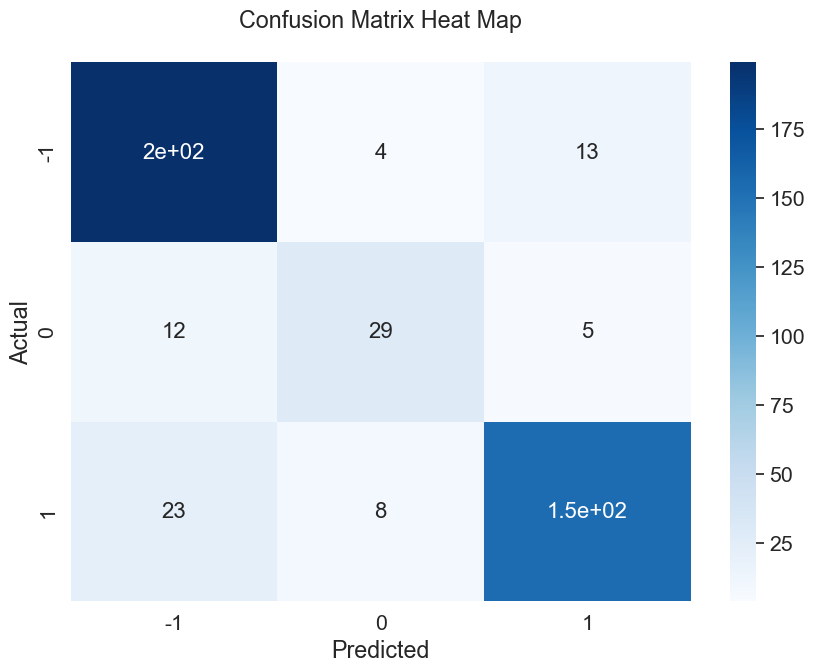

              precision    recall  f1-score   support

          -1       0.85      0.92      0.88       216
           0       0.71      0.63      0.67        46
           1       0.90      0.83      0.86       185

    accuracy                           0.85       447
   macro avg       0.82      0.79      0.80       447
weighted avg       0.85      0.85      0.85       447

DecisionTree_cross_valid_alpha DecisionTreeClassifier(ccp_alpha=0.003)
Train


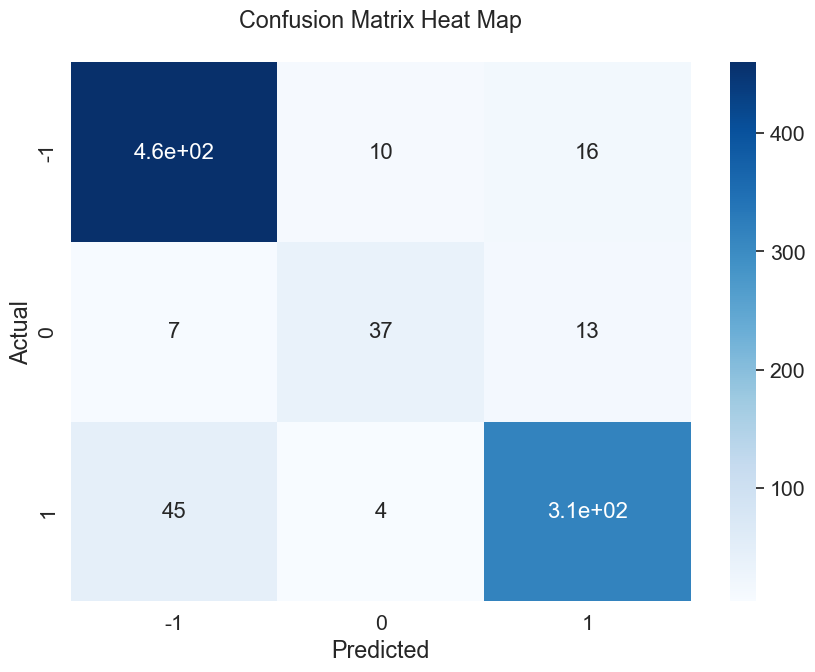

              precision    recall  f1-score   support

          -1       0.90      0.95      0.92       486
           0       0.73      0.65      0.69        57
           1       0.92      0.87      0.89       363

    accuracy                           0.90       906
   macro avg       0.85      0.82      0.83       906
weighted avg       0.89      0.90      0.89       906

Test


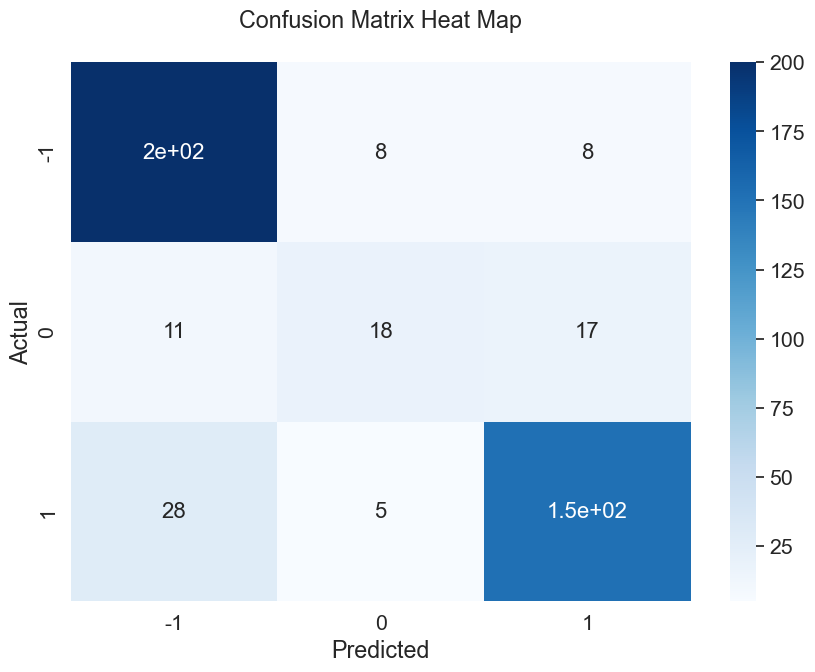

              precision    recall  f1-score   support

          -1       0.84      0.93      0.88       216
           0       0.58      0.39      0.47        46
           1       0.86      0.82      0.84       185

    accuracy                           0.83       447
   macro avg       0.76      0.71      0.73       447
weighted avg       0.82      0.83      0.82       447

df_SFM dataset
DecisionTree DecisionTreeClassifier(criterion='entropy')
Train


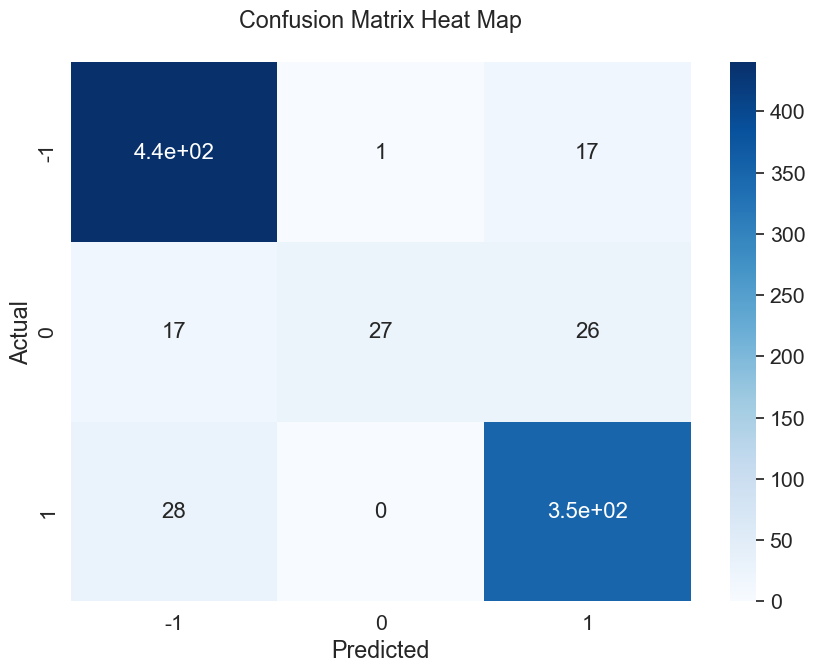

              precision    recall  f1-score   support

          -1       0.91      0.96      0.93       458
           0       0.96      0.39      0.55        70
           1       0.89      0.93      0.91       378

    accuracy                           0.90       906
   macro avg       0.92      0.76      0.80       906
weighted avg       0.90      0.90      0.89       906

Test


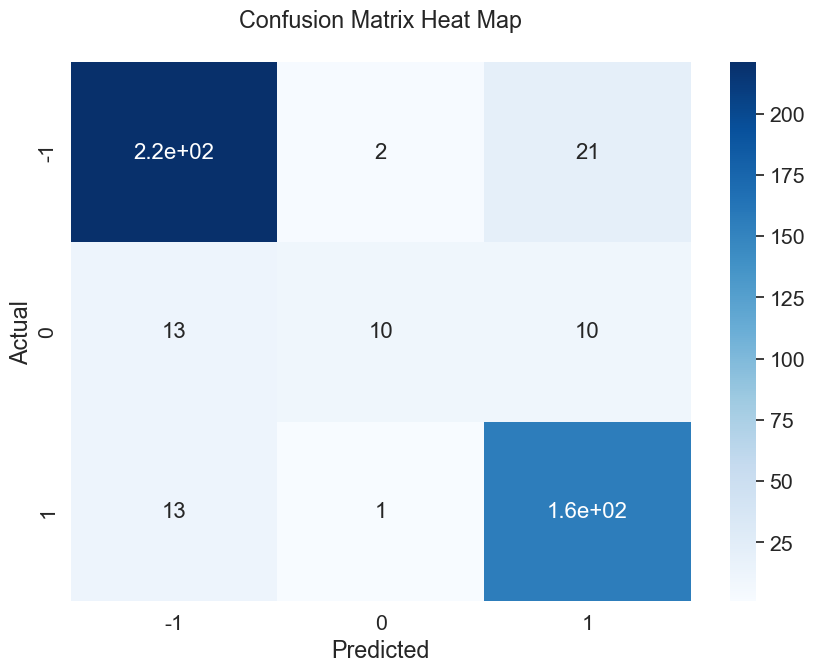

              precision    recall  f1-score   support

          -1       0.89      0.91      0.90       244
           0       0.77      0.30      0.43        33
           1       0.83      0.92      0.87       170

    accuracy                           0.87       447
   macro avg       0.83      0.71      0.74       447
weighted avg       0.86      0.87      0.86       447

DecisionTree_cross_valid_alpha DecisionTreeClassifier(ccp_alpha=0)
Train


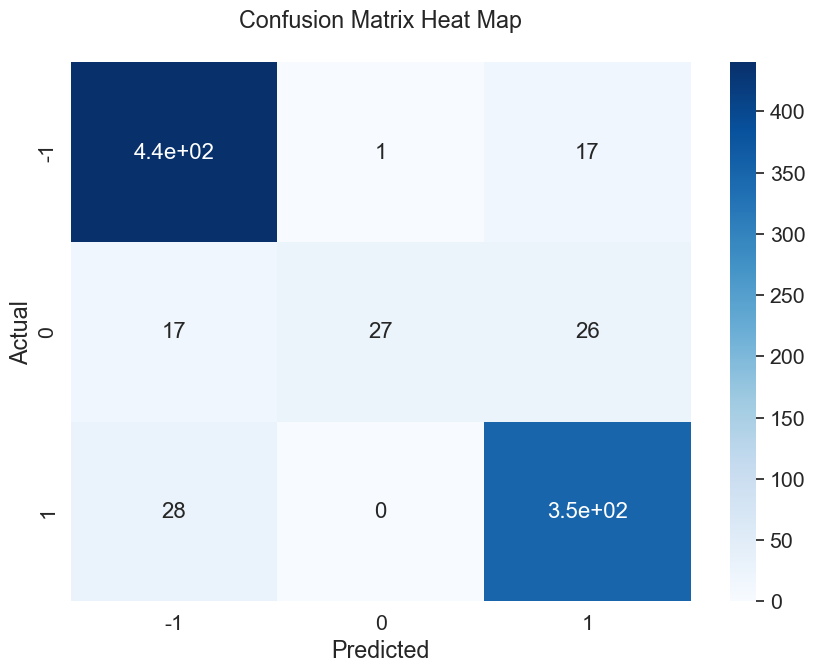

              precision    recall  f1-score   support

          -1       0.91      0.96      0.93       458
           0       0.96      0.39      0.55        70
           1       0.89      0.93      0.91       378

    accuracy                           0.90       906
   macro avg       0.92      0.76      0.80       906
weighted avg       0.90      0.90      0.89       906

Test


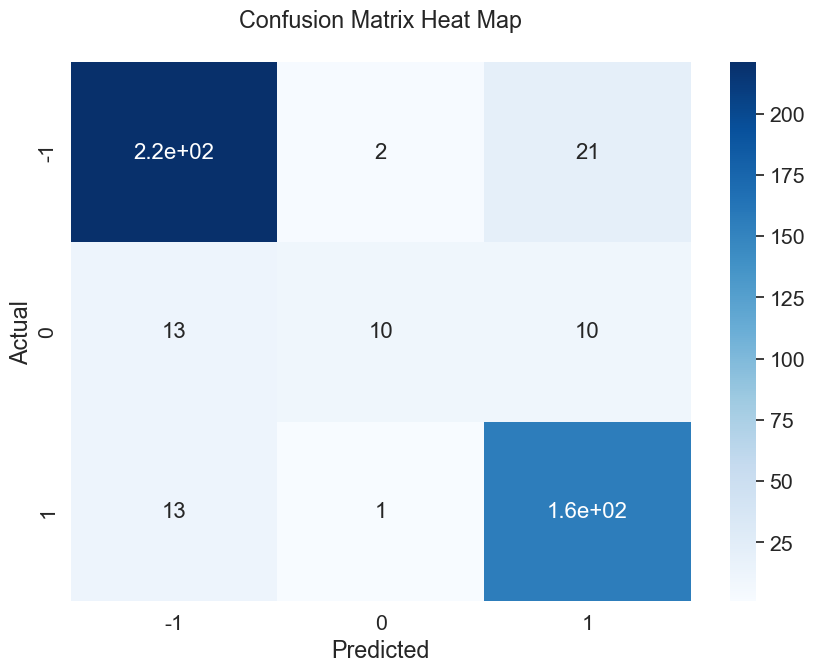

              precision    recall  f1-score   support

          -1       0.89      0.91      0.90       244
           0       0.77      0.30      0.43        33
           1       0.83      0.92      0.87       170

    accuracy                           0.87       447
   macro avg       0.83      0.71      0.74       447
weighted avg       0.86      0.87      0.86       447



Acc_Train  Acc_Test  Acc_Train  Acc_Test  \
SVC                              0.960265  0.876957   0.920530  0.892617   
SVC1_r                           0.956954  0.881432   0.928256  0.914989   
AdaBoost                         0.969095  0.899329   0.953642  0.883669   
RandomForest                     0.962472  0.883669   0.953642  0.908277   
GradientBoosting                 0.955850  0.894855   0.926049  0.919463   
DecisionTree                     0.969095  0.890380   0.953642  0.888143   
DecisionTree_cross_valid_alpha   0.923841  0.879195   0.907285  0.894855   

                                Acc_Train  Acc_Test  Acc_Train  Acc_Test  
SVC                              0.934879  0.888143        NaN       NaN  
SVC1_r                           0.932671  0.881432        NaN       NaN  
AdaBoost                         0.963576  0.854586        NaN       NaN  
RandomForest                     0.915011  0.861298        NaN       NaN  
GradientBoosting                 0.927152  0.845638        NaN       NaN  
DecisionTree                     0.963576  0.854586   0.901766  0.865772  
DecisionTree_cross_valid_alpha   0.895143  0.827740   0.901766  0.865772

In [52]:
c['DecisionTree'][0].fit(X_train_for_corr,y_train_for_corr)
cc['DecisionTree'][0].fit(X_train_no_corr,y_train_no_corr)
ccc['DecisionTree'][0].fit(X_train_pca,y_train_pca)
cccc['DecisionTree'][0].fit(X_train_SFM,y_train_SFM)

def report(c,X_train, X_test, y_train, y_test):
    s={}
    for k in c.keys():
        
            y_pred_train = c[k][0].predict(X_train)
            y_pred_test = c[k][0].predict(X_test)
            acc_1=accuracy_score(y_train,y_pred_train)
            acc_2=accuracy_score(y_test,y_pred_test)
            s.update({k:[acc_1,acc_2]})
            print(k,c[k][0])
            print("Train")
            confusion_matrix_(y_train,y_pred_train).show()
            print(classification_report(y_train,y_pred_train))
    
            print("Test")
            confusion_matrix_(y_test, y_pred_test).show()
            print(classification_report(y_test, y_pred_test))
            
            
    return s
print("df dataset")
s=report(c,X_train_for_corr, X_test_for_corr, y_train_for_corr, y_test_for_corr)
s1=pd.DataFrame(data=s.values(),columns=['Acc_Train','Acc_Test'],index=s.keys())

print("df_no_strong_corr dataset")
ss=report(cc,X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr)
s2=pd.DataFrame(data=ss.values(),columns=['Acc_Train','Acc_Test'],index=ss.keys())

print("df_pca dataset")
sss=report(ccc,X_train_pca, X_test_pca, y_train_pca, y_test_pca)
s3=pd.DataFrame(data=sss.values(),columns=['Acc_Train','Acc_Test'],index=sss.keys())

print("df_SFM dataset")
ssss=report(cccc,X_train_SFM, X_test_SFM, y_train_SFM, y_test_SFM)
s4=pd.DataFrame(data=ssss.values(),columns=['Acc_Train','Acc_Test'],index=ssss.keys())



s5= pd.concat([s1,s2,s3,s4],axis=1)
s5
    